In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [3]:
df=pd.read_csv('../data/survey_results_public.csv')

In [4]:
print('df has {} rows and {} columns'.format(*df.shape))

df has 64461 rows and 61 columns


In [4]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
df.head()

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0   European Euro  ...  Neither easy nor difficult  Appropriate in length   
1  Pound sterling  ...                         NaN                    NaN   
2             NaN  ...  Neither easy nor difficult  Appropriate in length   
3    Albanian lek  ...                         NaN                    NaN   
4             NaN  ...                        Easy              Too short   

  Trans                                     UndergradMajor  \
0    No  Computer science, computer engineering, or sof...   
1   NaN  Computer science, computer engineering, or sof...   
2   NaN                                                NaN   
3    No  Computer science, computer engineering, or sof...   
4    No  Computer science, computer engineering, or sof...   

  WebframeDesireNextYear    WebframeWorkedWith  \
0           ASP.NET Core  ASP.NET;ASP.NET Core   
1                    NaN                   NaN   
2                    NaN                   NaN   
3                    NaN                   NaN   
4   Django;Ruby on Rails         Ruby on Rails   

                              WelcomeChange WorkWeekHrs YearsCode YearsCodePro  
0   Just as welcome now as I felt last year        50.0        36           27  
1  Somewhat more welcome now than last year         NaN         7            4  
2  Somewhat more welcome now than last year         NaN         4          NaN  
3  Somewhat less welcome now than last year        40.0         7            4  
4   Just as welcome now as I felt last year         NaN        15            8  

[5 rows x 61 columns]

In [6]:
all_categoricals=[]
all_multi_options=[]
all_numericals=[]

In [7]:
all_categoricals.append('MainBranch')
# df['MainBranch'].unique()
# df['MainBranch'].hist(xrot=90)
# df[['MainBranch', 'ConvertedComp']].boxplot(by='MainBranch', showfliers=False, rot=90)

In [8]:
all_numericals.append('Age')
# pd.to_numeric(df['Age'], errors='coerce').hist(bins=100, xrot=90)

In [9]:
all_numericals.append('Age1stCode')
# pd.to_numeric(df['Age1stCode'], errors='coerce').hist(bins=100, xrot=90)

In [10]:
all_categoricals.append('Country')
# df['Country'].unique()
# df['Country'].hist(xrot=90, figsize=(20, 5))

In [11]:
all_multi_options.append('DatabaseWorkedWith')
# df['DatabaseWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['DatabaseWorkedWithCnt']=df['DatabaseWorkedWith'].str.split(';').str.len()
# df[['DatabaseWorkedWithCnt', 'ConvertedComp']].boxplot(by='DatabaseWorkedWithCnt', showfliers=False)
all_numericals.append('DatabaseWorkedWithCnt')

In [12]:
all_multi_options.append('DevType')
# df['DevType'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['DevTypeCnt']=df['DevType'].str.split(';').str.len()
# df[['DevTypeCnt', 'ConvertedComp']].boxplot(by='DevTypeCnt', showfliers=False, rot=90)
all_numericals.append('DevTypeCnt')

In [60]:
all_categoricals.append('EdLevel')
# # df['EdLevel'].hist(xrot=90)
degree_mapping={'I never completed any formal education': 1, 
                'Primary/elementary school': 2, 
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 3, 
                'Some college/university study without earning a degree': 4, #3
                'Associate degree (A.A., A.S., etc.)': 5, #4
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 6, 
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 7, 
                'Other doctoral degree (Ph.D., Ed.D., etc.)': 8}
all_numericals.append('EdLevelOrd')
df['EdLevelOrd']=df['EdLevel'].map(degree_mapping)
fig, ax=plt.subplots(1, 2, figsize=(20, 5))
df[['EdLevelOrd', 'ConvertedComp']].boxplot(by='EdLevelOrd', showfliers=False, ax=ax[0])
df[['EdLevelOrd', 'ConvertedComp']].plot(kind='scatter', x='EdLevelOrd', y='ConvertedComp', ax=ax[1])
# df['EdLevelOrd'].value_counts().sort_index()

NameError: name 'all_categoricals' is not defined

In [14]:
all_categoricals.append('Employment')
# df['Employment'].hist(xrot=90)

In [15]:
# multi_options.append('Ethnicity')
# df['Ethnicity'].str.get_dummies(sep=';')

In [16]:
all_multi_options.append('Gender')
# dummies=df['Gender'].str.get_dummies(sep=';')
# gender_list=dummies.columns
# melt_df=pd.melt(pd.concat([df['ConvertedComp'], dummies], axis=1), id_vars=['ConvertedComp'], value_vars=gender_list)
# melt_df[melt_df['value']==1].boxplot(by='variable', column='ConvertedComp', showfliers=False, vert=False)
df['GenderCnt']=df['Gender'].str.split(';').str.len()
# df[['GenderCnt', 'ConvertedComp']].boxplot(by='GenderCnt', showfliers=False, rot=90)
all_numericals.append('GenderCnt')

In [17]:
all_multi_options.append('LanguageWorkedWith')
# df['LanguageWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['LanguageWorkedWithCnt']=df['LanguageWorkedWith'].str.split(';').str.len()
# df[['LanguageWorkedWithCnt', 'ConvertedComp']].boxplot(by='LanguageWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('LanguageWorkedWithCnt')

In [18]:
all_multi_options.append('MiscTechWorkedWith')
# df['MiscTechWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['MiscTechWorkedWithCnt']=df['MiscTechWorkedWith'].str.split(';').str.len()
# df[['MiscTechWorkedWithCnt', 'ConvertedComp']].boxplot(by='MiscTechWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('MiscTechWorkedWithCnt')

In [19]:
all_multi_options.append('NEWCollabToolsWorkedWith')
# df['NEWCollabToolsWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['NEWCollabToolsWorkedWithCnt']=df['NEWCollabToolsWorkedWith'].str.split(';').str.len()
# df[['NEWCollabToolsWorkedWithCnt', 'ConvertedComp']].boxplot(by='NEWCollabToolsWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('NEWCollabToolsWorkedWithCnt')

In [20]:
all_categoricals.append('OpSys')
# df['OpSys'].hist(xrot=90)

In [21]:
all_multi_options.append('PlatformWorkedWith')
# df['PlatformWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)
df['PlatformWorkedWithCnt']=df['PlatformWorkedWith'].str.split(';').str.len()
# df[['PlatformWorkedWithCnt', 'ConvertedComp']].boxplot(by='PlatformWorkedWithCnt', showfliers=False, rot=90)
all_numericals.append('PlatformWorkedWithCnt')

In [22]:
all_categoricals.append('UndergradMajor')
# df['UndergradMajor'].hist(xrot=90)

In [23]:
all_multi_options.append('WebframeWorkedWith')
# df['WebframeWorkedWith'].str.get_dummies(sep=';').sum().plot(kind='bar', rot=90)

In [24]:
all_numericals.append('YearsCode')
# pd.to_numeric(df['YearsCode'], errors='coerce').hist(bins=100, xrot=90)

In [25]:
all_numericals.append('YearsCodePro')
# df['YearsCodeProNEW']=pd.to_numeric(df['YearsCodePro'], errors='coerce').map(lambda x: min(x, 10))
# pd.to_numeric(df['YearsCodePro'], errors='coerce').hist(bins=100, xrot=90)

In [26]:
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
# # numericals=['YearsCodePro']
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
# # categoricals=['EdLevel']
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
# # multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

In [27]:
# us=df[(df['Country']=='United States') & 
#      (df['Employment']=='Employed full-time') &
#      (df['ConvertedComp']<=200000) & 
#      (df['ConvertedComp']>=40000)]
# us['YearsCodePro']=pd.to_numeric(us['YearsCodePro'], errors='coerce')
# us=us.dropna()
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test=train_test_split(us['YearsCodePro'], us['ConvertedComp'])
# lr=LinearRegression()
# lr.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
# lr.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

# Pipeline

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

columns=2

def run_model(X): 
    print(f'{X.shape} before trim')
    y=X.dropna()['ConvertedComp']
    input_ary=X.dropna().drop('ConvertedComp', axis=1)
#     y=X.dropna()['ConvertedComp']
    print(f'{input_ary.shape} after trim')        
#     mmscaler=MinMaxScaler()
#     print(input_ary.isnull().sum().sum())
#     print(y.isnull().sum().sum())
#     X_train, X_test, y_train_scaled, y_test_scaled=train_test_split(input_ary, y.reshape(-1))
    X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
    yscaler=StandardScaler()
#     y=mmscaler.fit_transform(y.values.reshape(-1, 1))
    yscaler.fit(y_train.values.reshape(-1, 1))
    y_train_scaled=yscaler.transform(y_train.values.reshape(-1, 1))
    y_test_scaled=yscaler.transform(y_test.values.reshape(-1, 1))
    xcaler=StandardScaler()
    xcaler.fit(X_train)
    X_train_scaled=xcaler.transform(X_train)
    X_test_scaled=xcaler.transform(X_test)
#     mmscaler.fit(pd.DataFrame(y_train))
#     y_train_scaled=mmscaler.transform(y_train.values.reshape(1, -1))
#     y_test_scaled=mmscaler.transform(y_test.values.reshape(1, -1))
#     y_train_scaled=mmscaler.transform(pd.DataFrame(y_train))
#     y_test_scaled=mmscaler.transform(pd.DataFrame(y_test))
    rfr=RandomForestRegressor()
    rfr.fit(X_train_scaled, y_train_scaled)
    print(f'RFR Train Score: {rfr.score(X_train_scaled, y_train_scaled)}')
    print(f'RFR Test Score: {rfr.score(X_test_scaled, y_test_scaled)}')
    lr=LinearRegression()
    lr.fit(X_train_scaled, y_train_scaled)
    print(f'LR Train Score: {lr.score(X_train_scaled, y_train_scaled)}')
    print(f'LR Test Score: {lr.score(X_test_scaled, y_test_scaled)}')
    print(sorted(list(zip(input_ary.columns, rfr.feature_importances_)), key=lambda x: x[1], reverse=True)[:10])
    return None

In [29]:
# X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=10000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
def transform_data(input_df, numericals=[], categoricals=[], multi_options=[]): 
    print(input_df.shape)
#     input_df=input_df[numericals+cateogoricals+multi_options].dropna()
    input_df=input_df.dropna(subset=numericals+categoricals+multi_options+['ConvertedComp'])
    X=input_df[['ConvertedComp']]
    columns=2
    fig, ax=plt.subplots(math.ceil(len(numericals)/columns), columns*2, figsize=(20, 20))
    for idx, each_col in enumerate(numericals): 
        if len(numericals)>2: 
            plt_ax_1=ax[int(idx/columns)][(idx%columns)*2]
            plt_ax_2=ax[int(idx/columns)][(idx%columns)*2+1]
        else: 
            plt_ax_1=ax[(idx%columns)*2]
            plt_ax_2=ax[(idx%columns)*2+1]
        X=pd.concat([X, pd.to_numeric(input_df[each_col], errors='coerce')], axis=1)                                                             # idx = 2 & 3
        X[['ConvertedComp', each_col]].boxplot(by=each_col, showfliers=False, rot=90, ax=plt_ax_1) # wants 0 & 2 when idx = 0 & 1 which means + 0 and + 1
                                                                                                                                                      # idx = 2 & 3
        X[['ConvertedComp', each_col]].plot(x=each_col, y='ConvertedComp', kind='scatter', ax=plt_ax_2) # wants 1 & 3 when idx = 0 & 1 which means + 1 and + 2
        plt_ax_2.set_title(each_col)
        plt_ax_1.set_title(each_col)
        plt_ax_1.grid(False)
    fig.suptitle('')
    fig.tight_layout()
    fig, ax=plt.subplots(math.ceil(len(categoricals)/columns), columns, figsize=(20, 10))
    for idx, each_col in enumerate([col for col in categoricals if col!='Country']): 
        if len(categoricals)>2: 
            plt_ax=ax[int(idx/columns)][idx%columns]
        else: 
            plt_ax=ax[idx%columns]
        X=pd.concat([X, pd.get_dummies(input_df[each_col])], axis=1)
        input_df[[each_col, 'ConvertedComp']].boxplot(by=each_col, showfliers=False, vert=False, ax=plt_ax)
        plt_ax.grid(False)
        plt_ax.set_title(each_col)
    fig.suptitle('')
    fig.tight_layout()
    fig, ax=plt.subplots(math.ceil(len(multi_options)/columns), columns, figsize=(20, 20))
    for idx, each_col in enumerate(multi_options): 
        if len(multi_options)>2: 
            plt_ax=ax[int(idx/columns)][idx%columns]
        else: 
            plt_ax=ax[idx%columns]
        dummies=input_df[each_col].str.get_dummies(sep=';')
        X=pd.concat([X, dummies], axis=1)
        options_list=dummies.columns
        melt_df=pd.melt(pd.concat([input_df['ConvertedComp'], dummies], axis=1), id_vars=['ConvertedComp'], value_vars=options_list)
        melt_df[melt_df['value']==1].boxplot(by='variable', column='ConvertedComp', showfliers=False, vert=False, ax=plt_ax)
        plt_ax.grid(False)
        plt_ax.set_title(each_col)
    fig.suptitle('')
    fig.tight_layout()
#     input_df[numericals].corr().style.background_gradient(cmap="summer")
    print(X.shape)
    return X

# Testing

In [30]:
all_numericals=list(set(all_numericals))
all_categoricals=list(set(all_categoricals))
all_multi_options=list(set(all_multi_options))
print(f'{len(all_numericals)} + {len(all_categoricals)} + {len(all_multi_options)}')

12 + 6 + 8


(64461, 69)
(14656, 165)


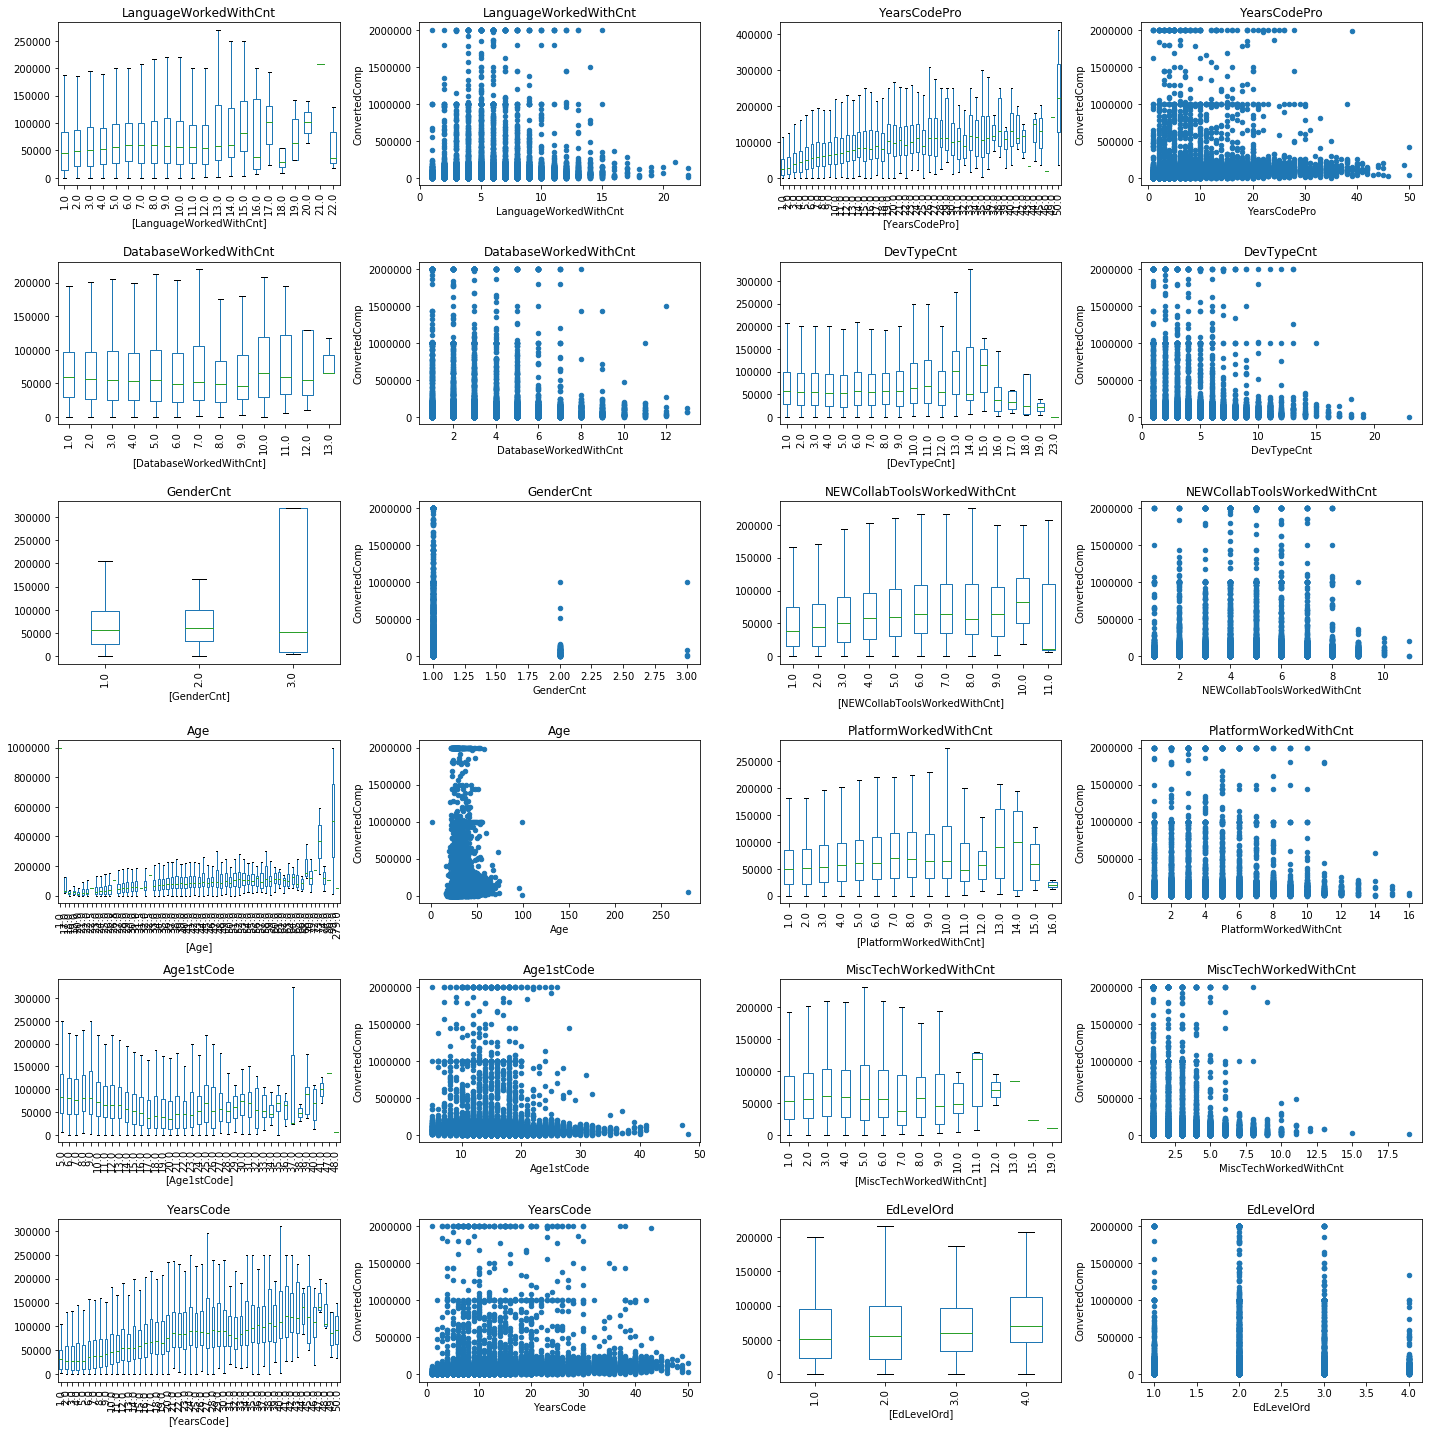

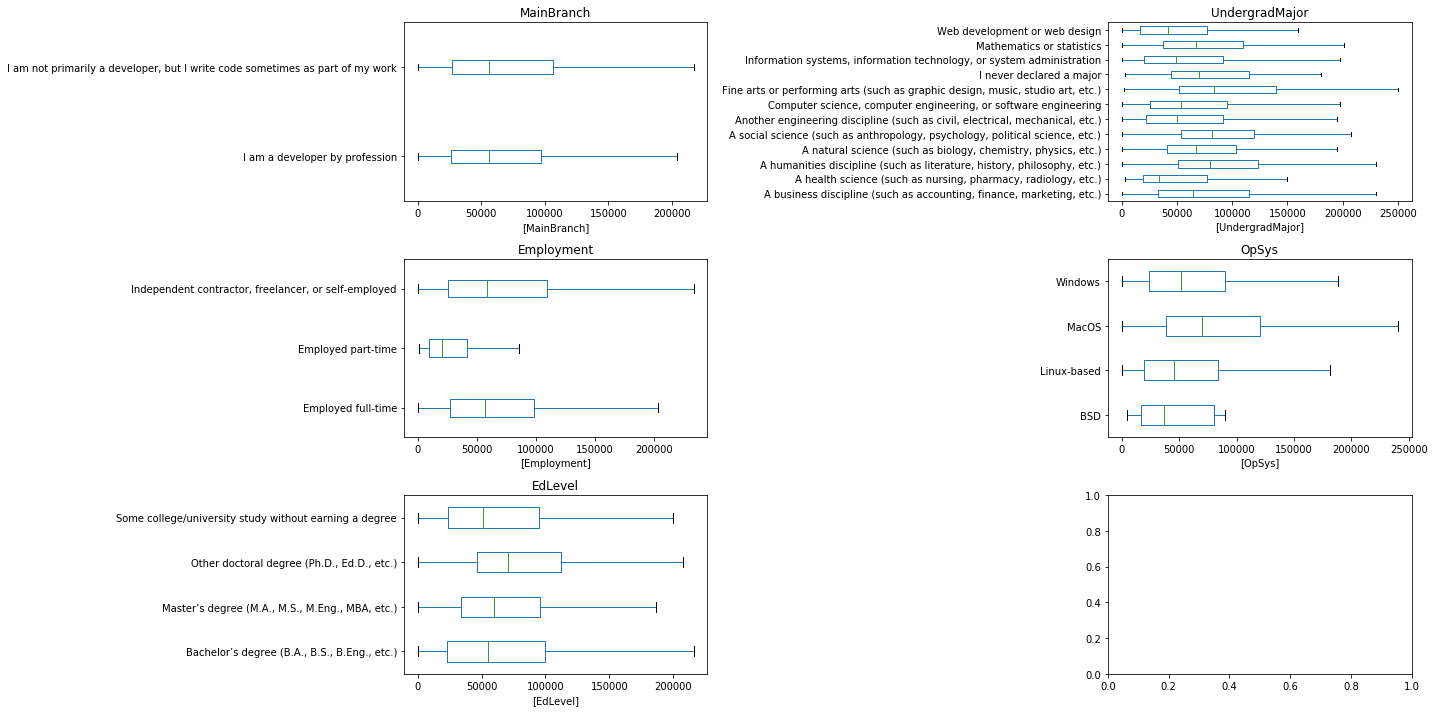

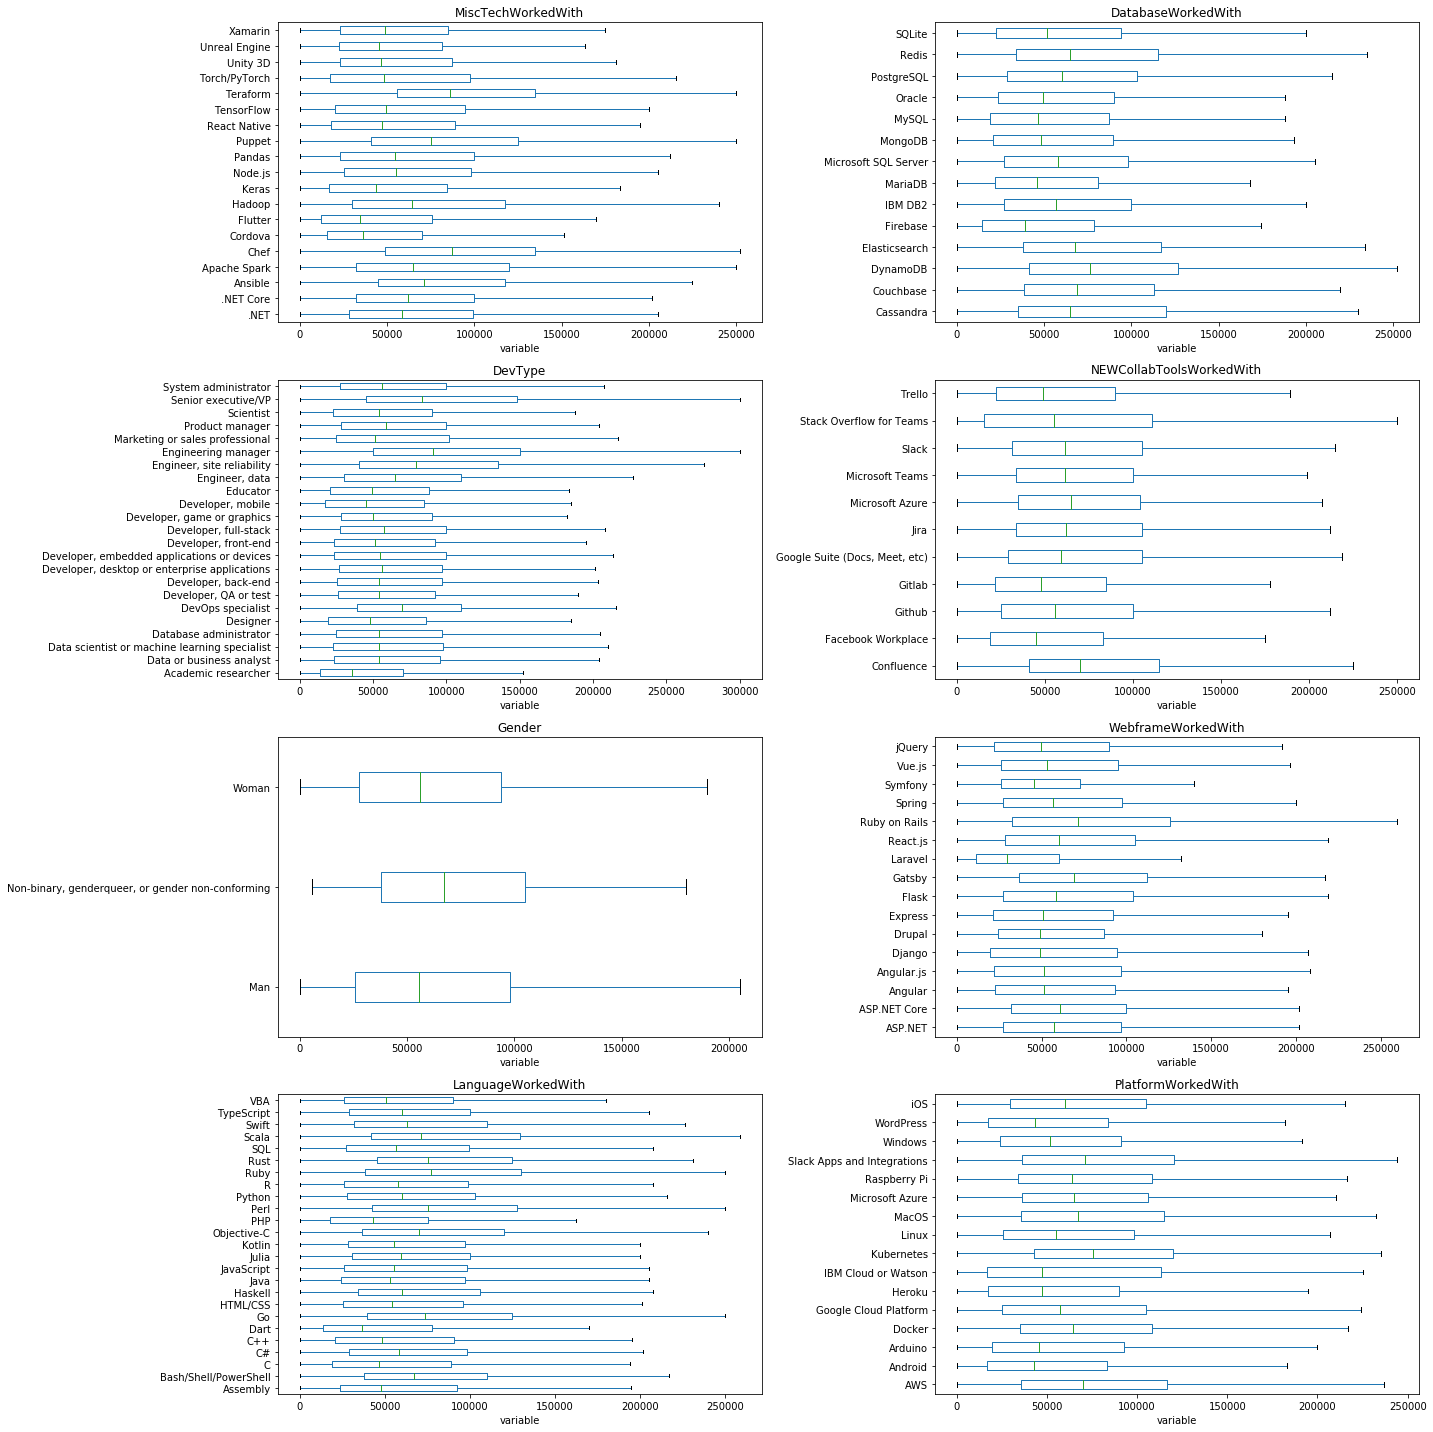

In [31]:
all_df=transform_data(df, numericals=all_numericals, categoricals=all_categoricals, multi_options=all_multi_options)

In [32]:
run_model(all_df)

(14656, 165) before trim
(14072, 164) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.8599605538412128
RFR Test Score: -0.06841799163052897
LR Train Score: 0.0549238064706461
LR Test Score: 0.019419784926133388
[('Age1stCode', 0.044101255819435144), ('YearsCodePro', 0.041936564069086746), ('Age', 0.04167600012403537), ('YearsCode', 0.04009750437411838), ('LanguageWorkedWithCnt', 0.03123948424883434), ('PlatformWorkedWithCnt', 0.030653095021231532), ('DevTypeCnt', 0.02987293027176706), ('NEWCollabToolsWorkedWithCnt', 0.0265319687920464), ('DatabaseWorkedWithCnt', 0.0251311108148607), ('MiscTechWorkedWithCnt', 0.016835246796369968)]


(6456, 69)
(2969, 163)
(2969, 163) before trim
(2847, 162) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.9101572157003759
RFR Test Score: 0.3529148455665182
LR Train Score: 0.41405959578840656
LR Test Score: 0.34114787718961714
[('YearsCodePro', 0.22135639977478186), ('Age', 0.038524707200228527), ('Windows', 0.03570535344034609), ('YearsCode', 0.031467705516651255), ('Age1stCode', 0.031248295935196332), ('LanguageWorkedWithCnt', 0.022573716121231137), ('NEWCollabToolsWorkedWithCnt', 0.020480882106119723), ('Confluence', 0.020193642390990658), ('DevTypeCnt', 0.017034941700886142), ('PlatformWorkedWithCnt', 0.016457156912089158)]


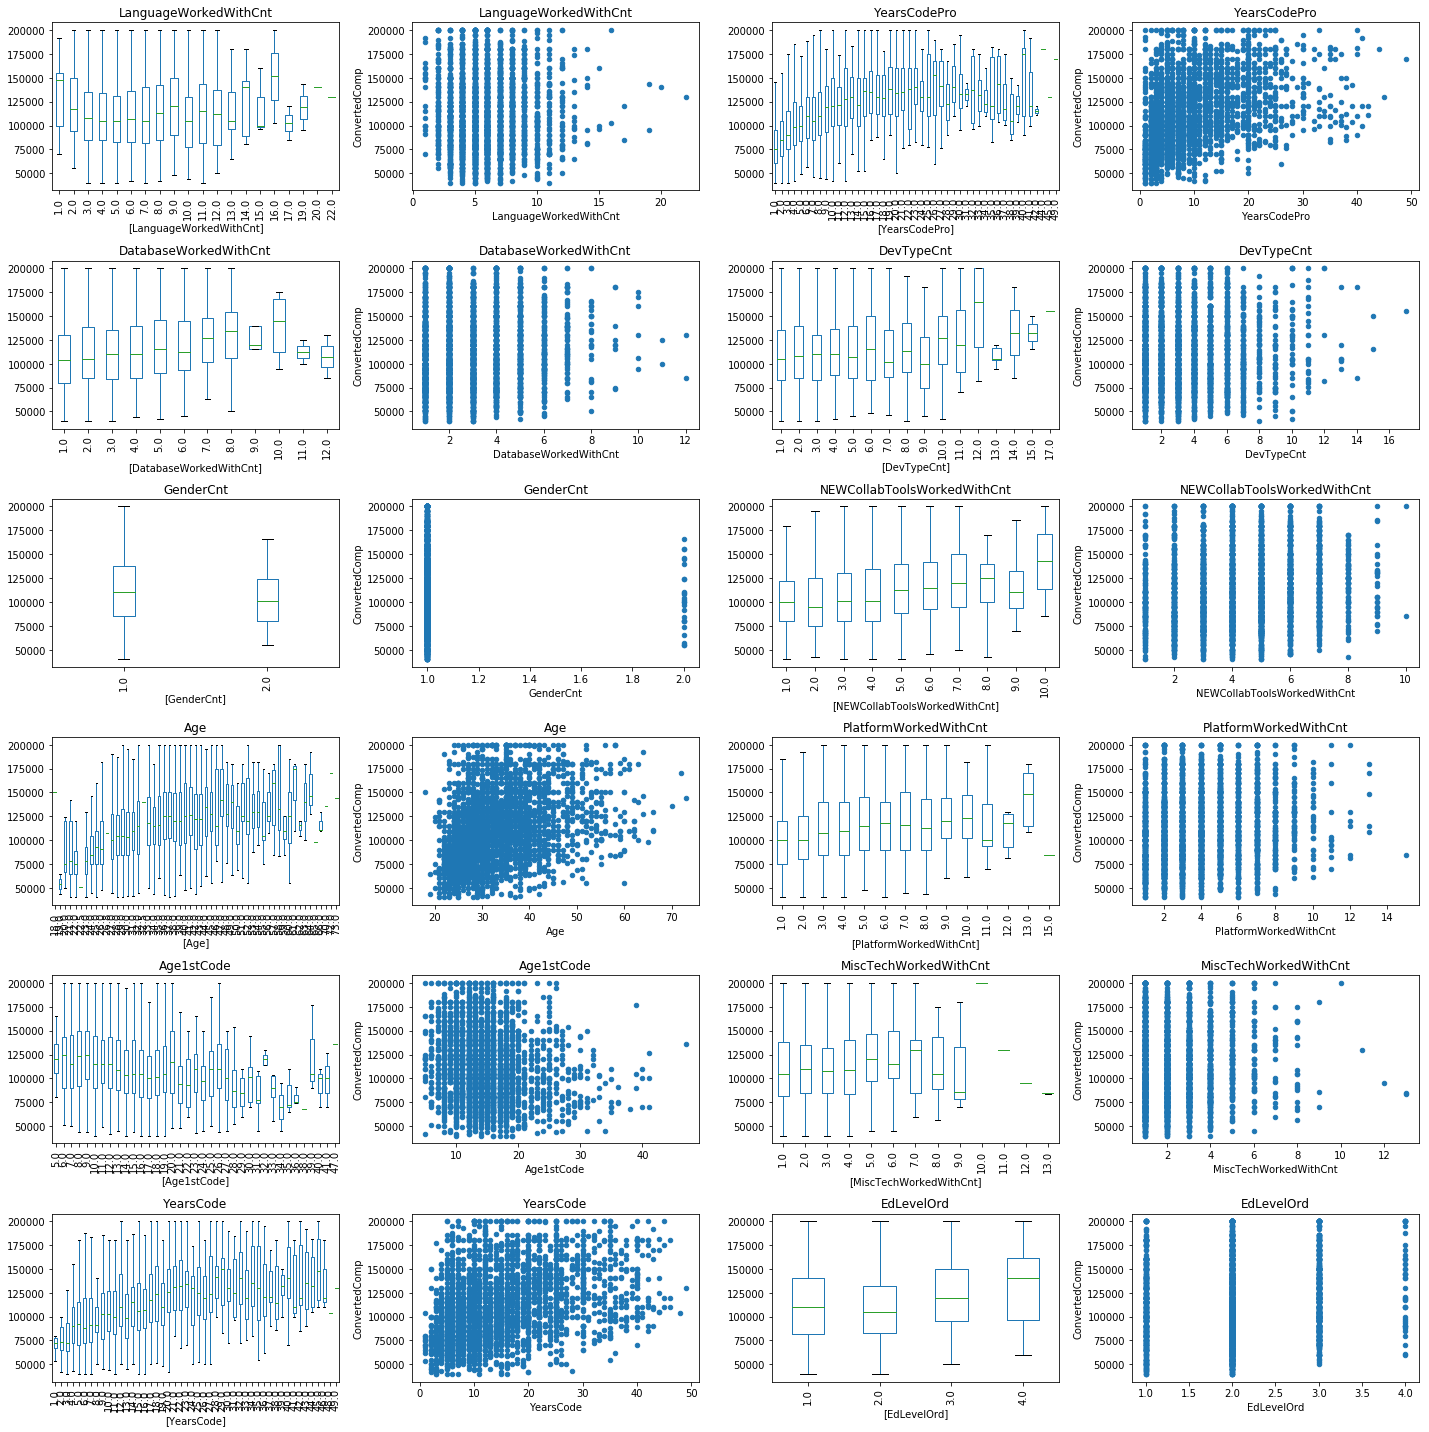

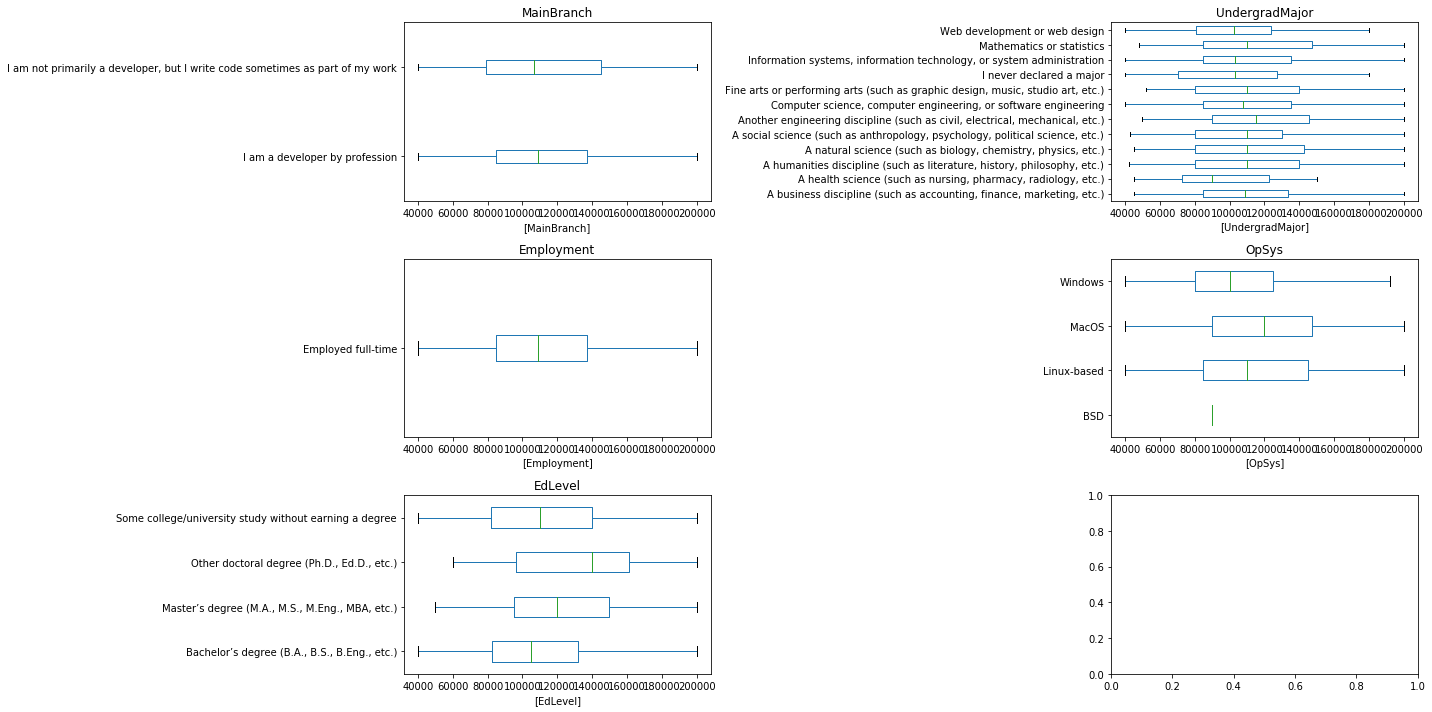

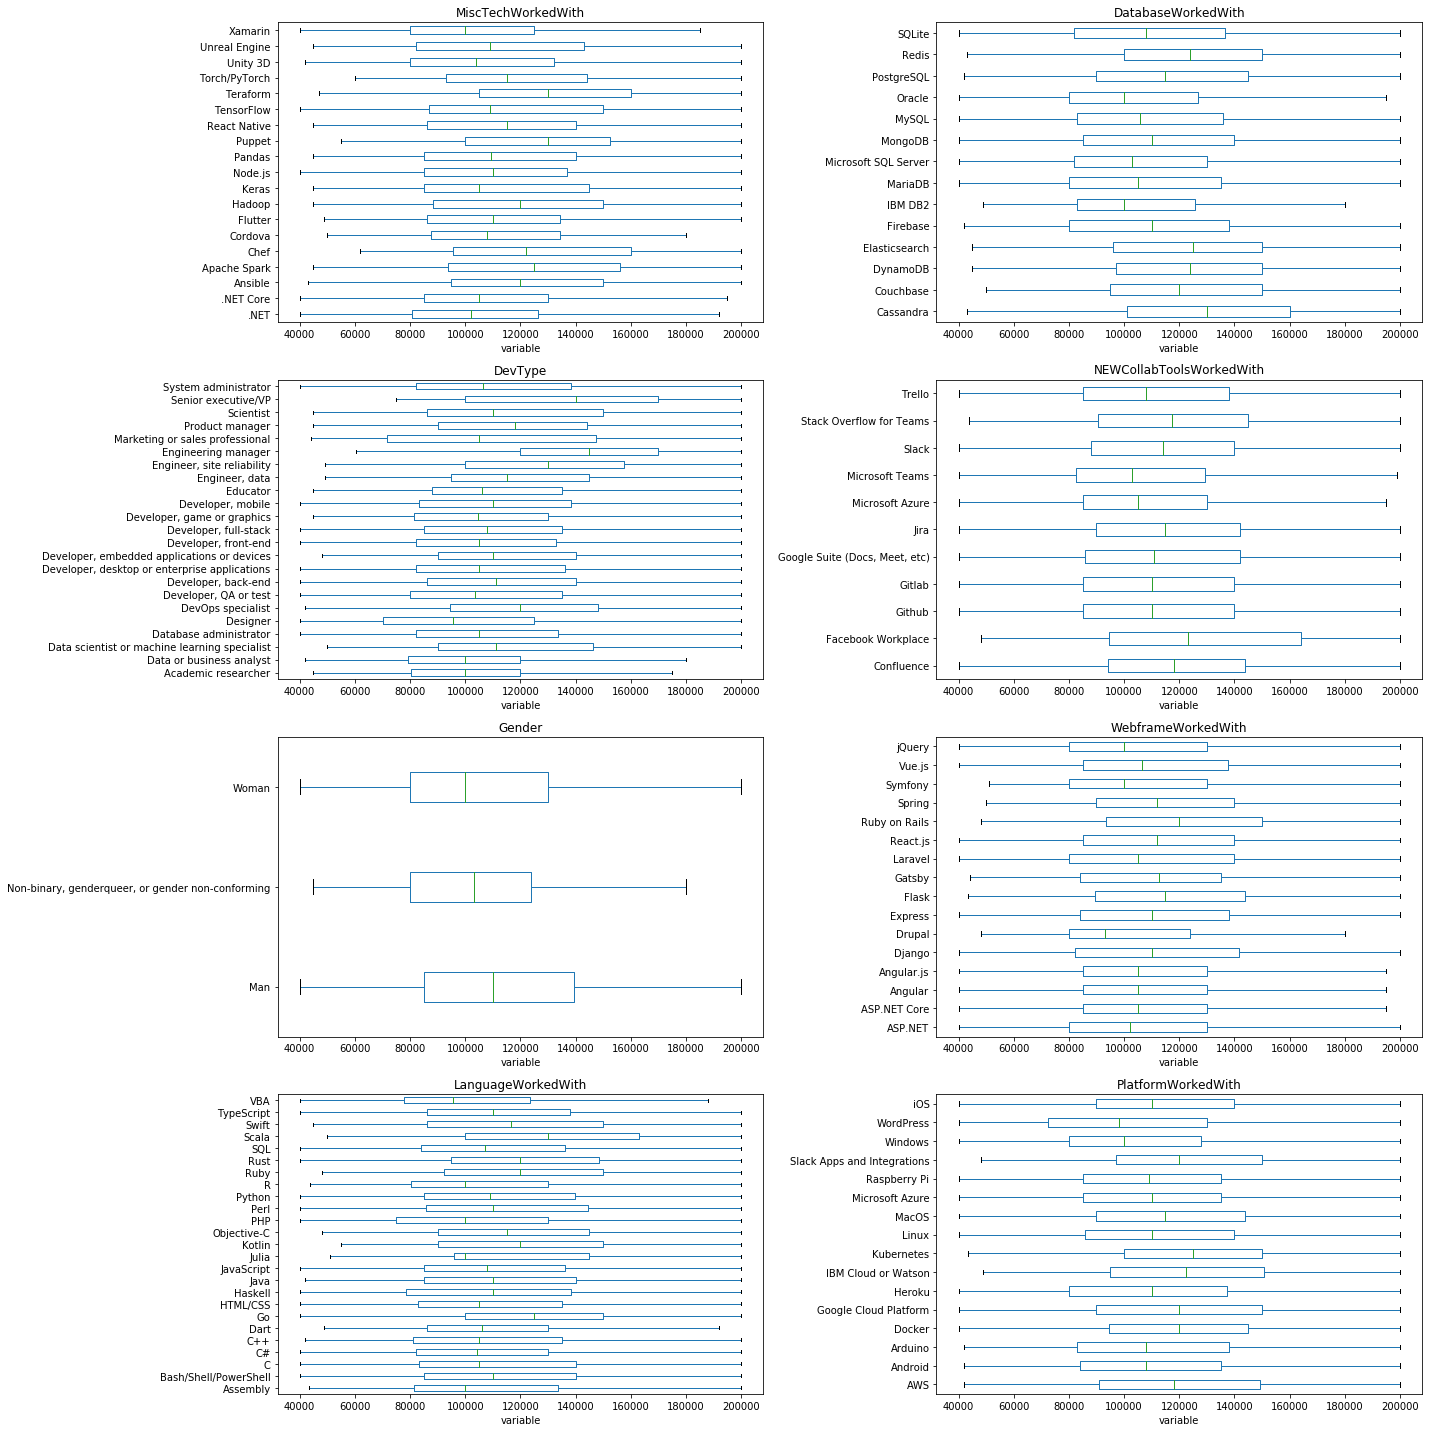

In [33]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df=transform_data(us, numericals=all_numericals, categoricals=all_categoricals, multi_options=all_multi_options)
us_df[all_numericals+['ConvertedComp']].corr().style.background_gradient(cmap="summer")
run_model(us_df)

(6456, 69)
(3149, 159)


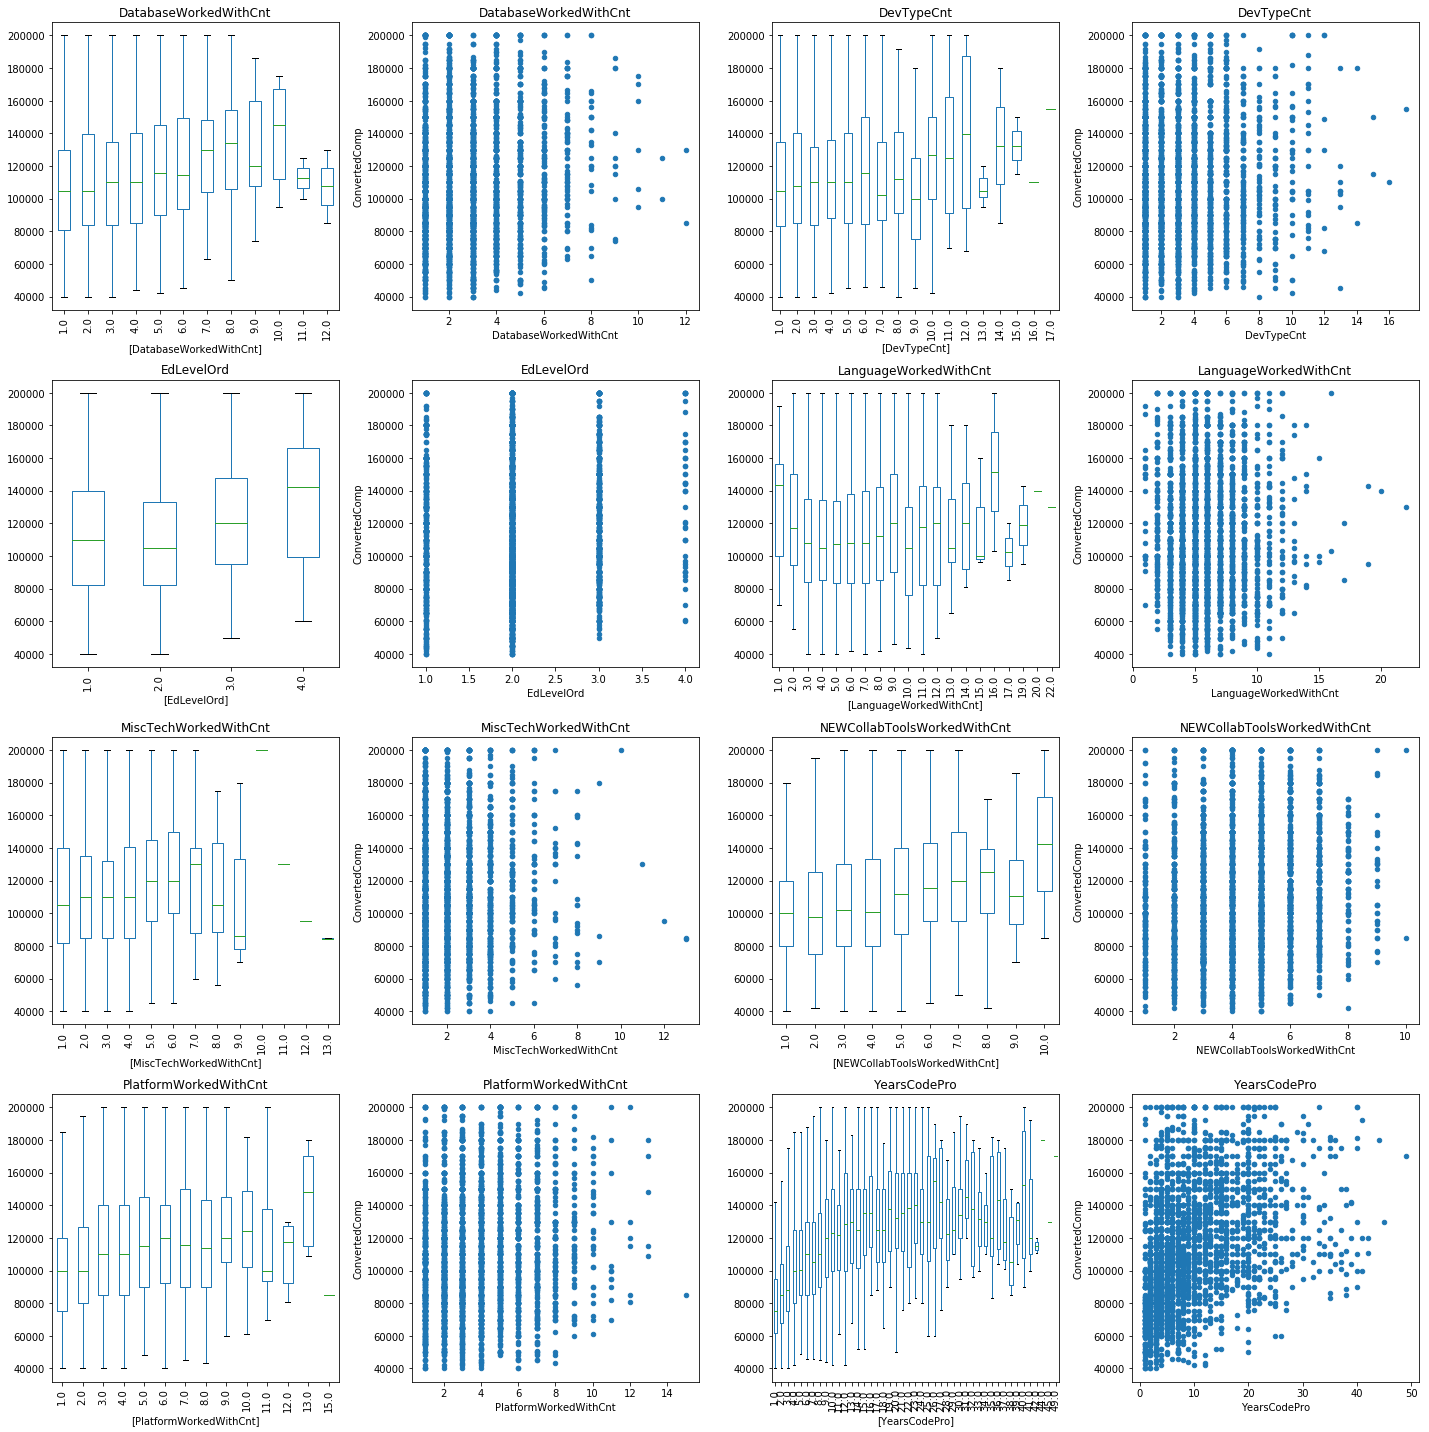

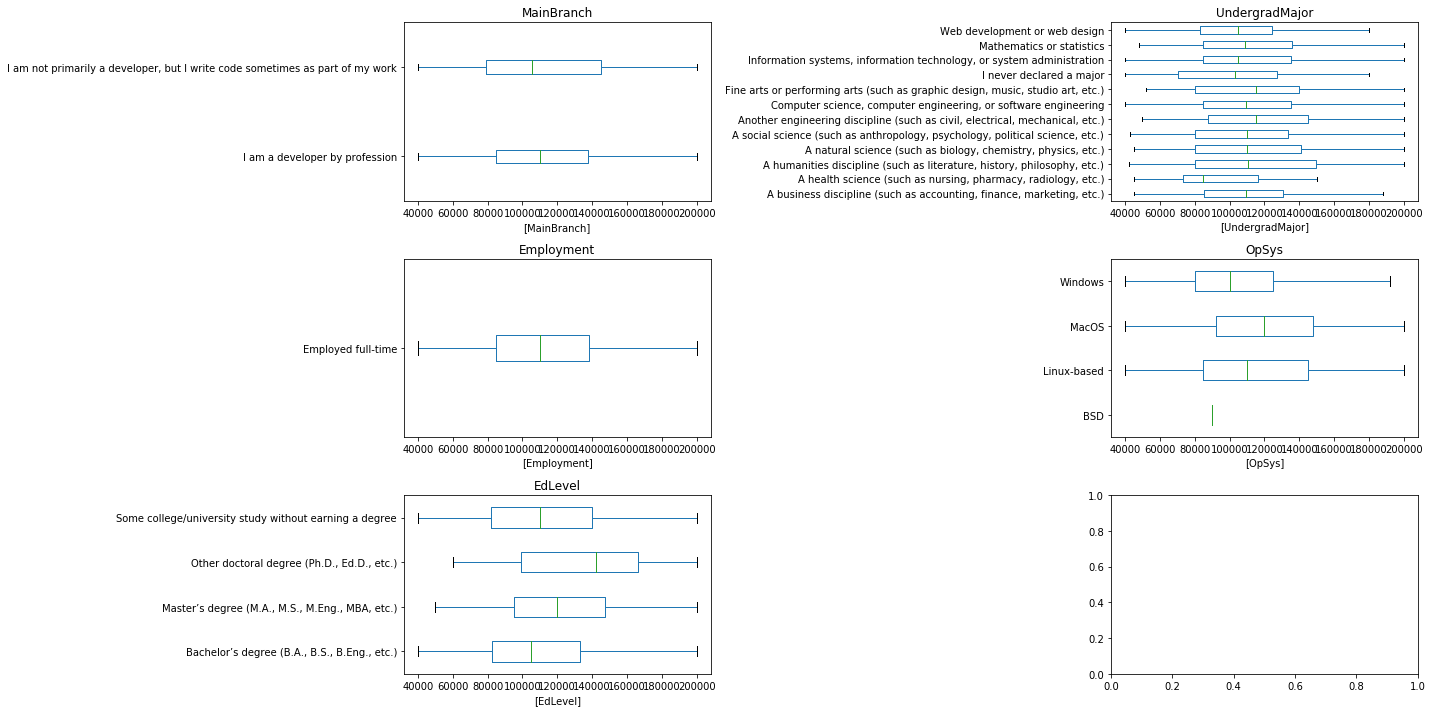

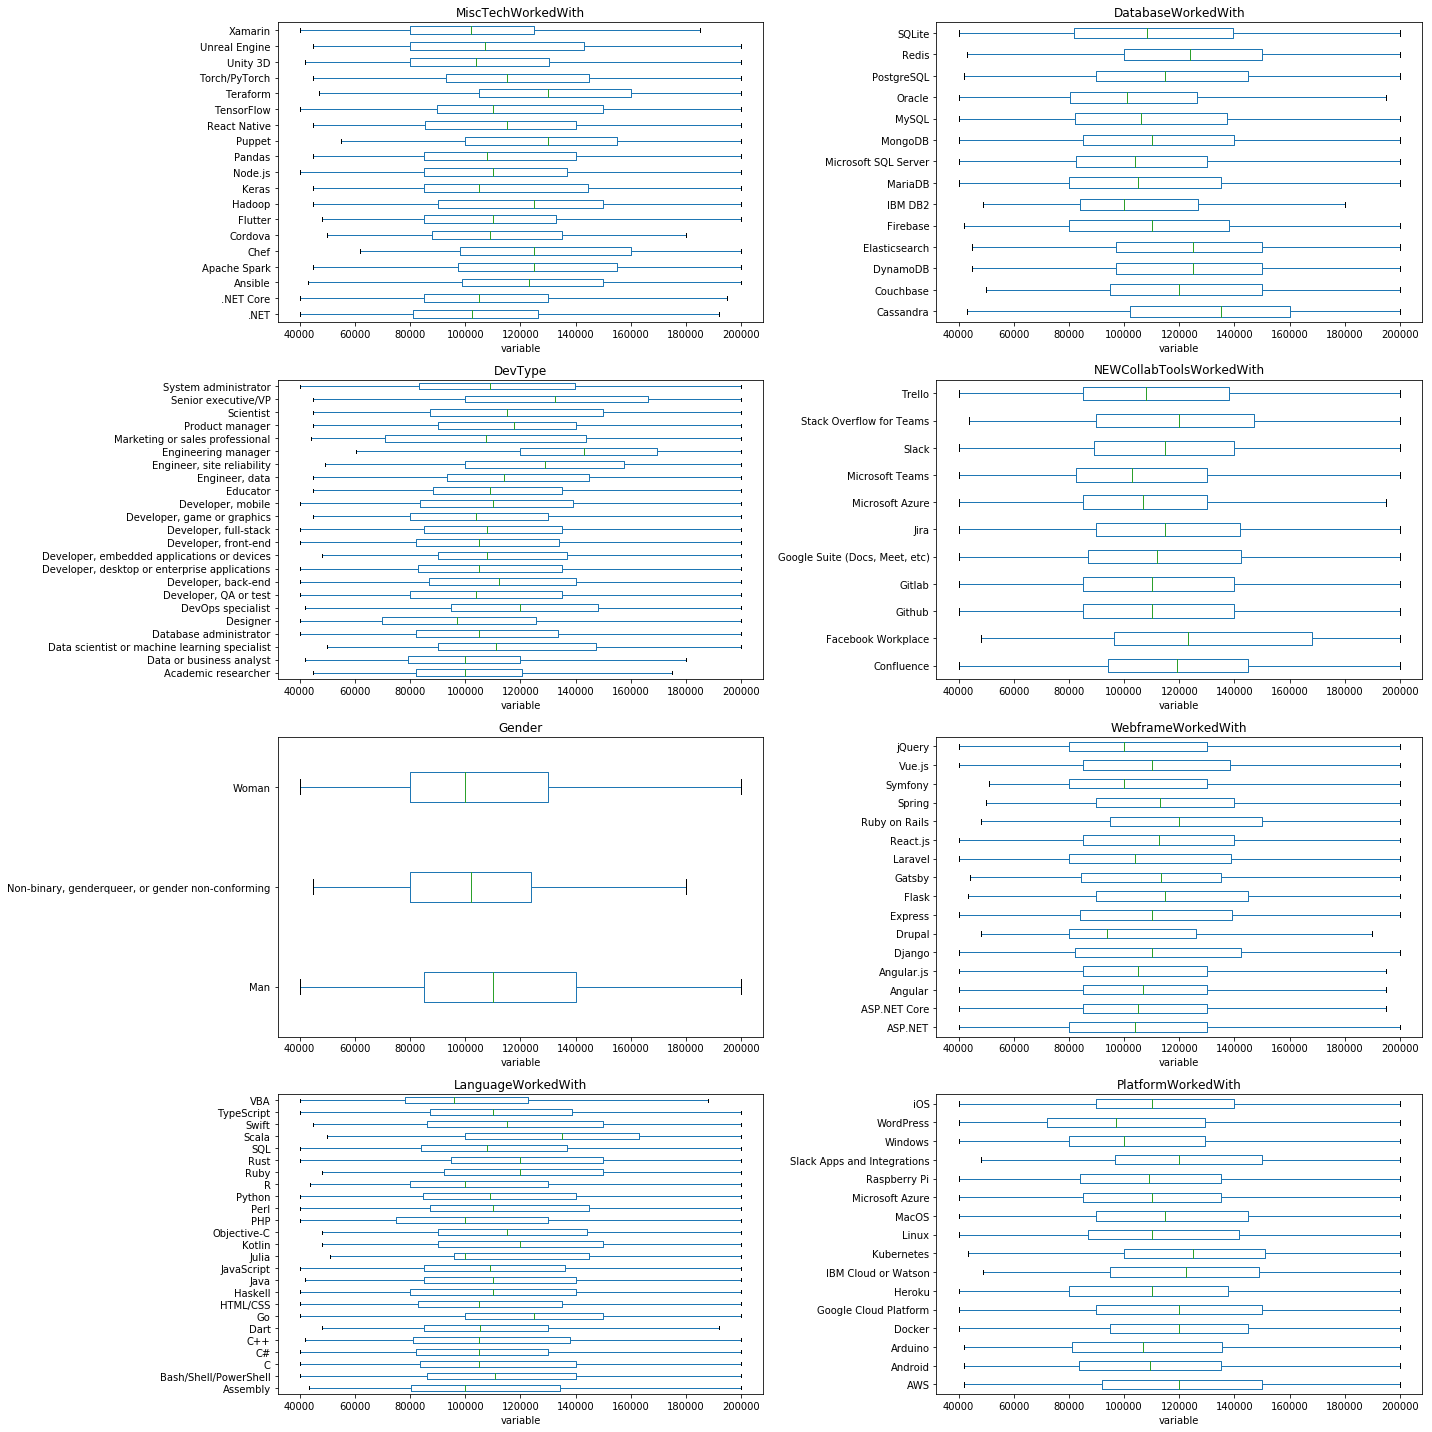

In [34]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['DatabaseWorkedWithCnt',
                                 'DevTypeCnt',
                                 'EdLevelOrd',
                                 'LanguageWorkedWithCnt',
                                 'MiscTechWorkedWithCnt',
                                 'NEWCollabToolsWorkedWithCnt',
                                 'PlatformWorkedWithCnt',
                                 'YearsCodePro'], 
                     categoricals=all_categoricals, multi_options=all_multi_options)
us_df_limited[['DatabaseWorkedWithCnt',
      'DevTypeCnt',
      'EdLevelOrd',
      'LanguageWorkedWithCnt',
      'MiscTechWorkedWithCnt',
      'NEWCollabToolsWorkedWithCnt',
      'PlatformWorkedWithCnt',
      'YearsCodePro', 
      'ConvertedComp']].corr().style.background_gradient(cmap="summer")

In [35]:
run_model(us_df_limited)

(3149, 159) before trim
(3039, 158) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.9093330318856403
RFR Test Score: 0.36291317121439326
LR Train Score: 0.4158754562518171
LR Test Score: 0.3388456778733633
[('YearsCodePro', 0.22569085625642216), ('Windows', 0.04356926312889984), ('NEWCollabToolsWorkedWithCnt', 0.023885782819839992), ('LanguageWorkedWithCnt', 0.02376311405987765), ('DevTypeCnt', 0.02082481227173616), ('PlatformWorkedWithCnt', 0.02042386808143811), ('Jira', 0.017898210082355367), ('DatabaseWorkedWithCnt', 0.017698194669489357), ('Engineering manager', 0.016857752201265862), ('Confluence', 0.015269631671672577)]


(6456, 69)
(3312, 135)


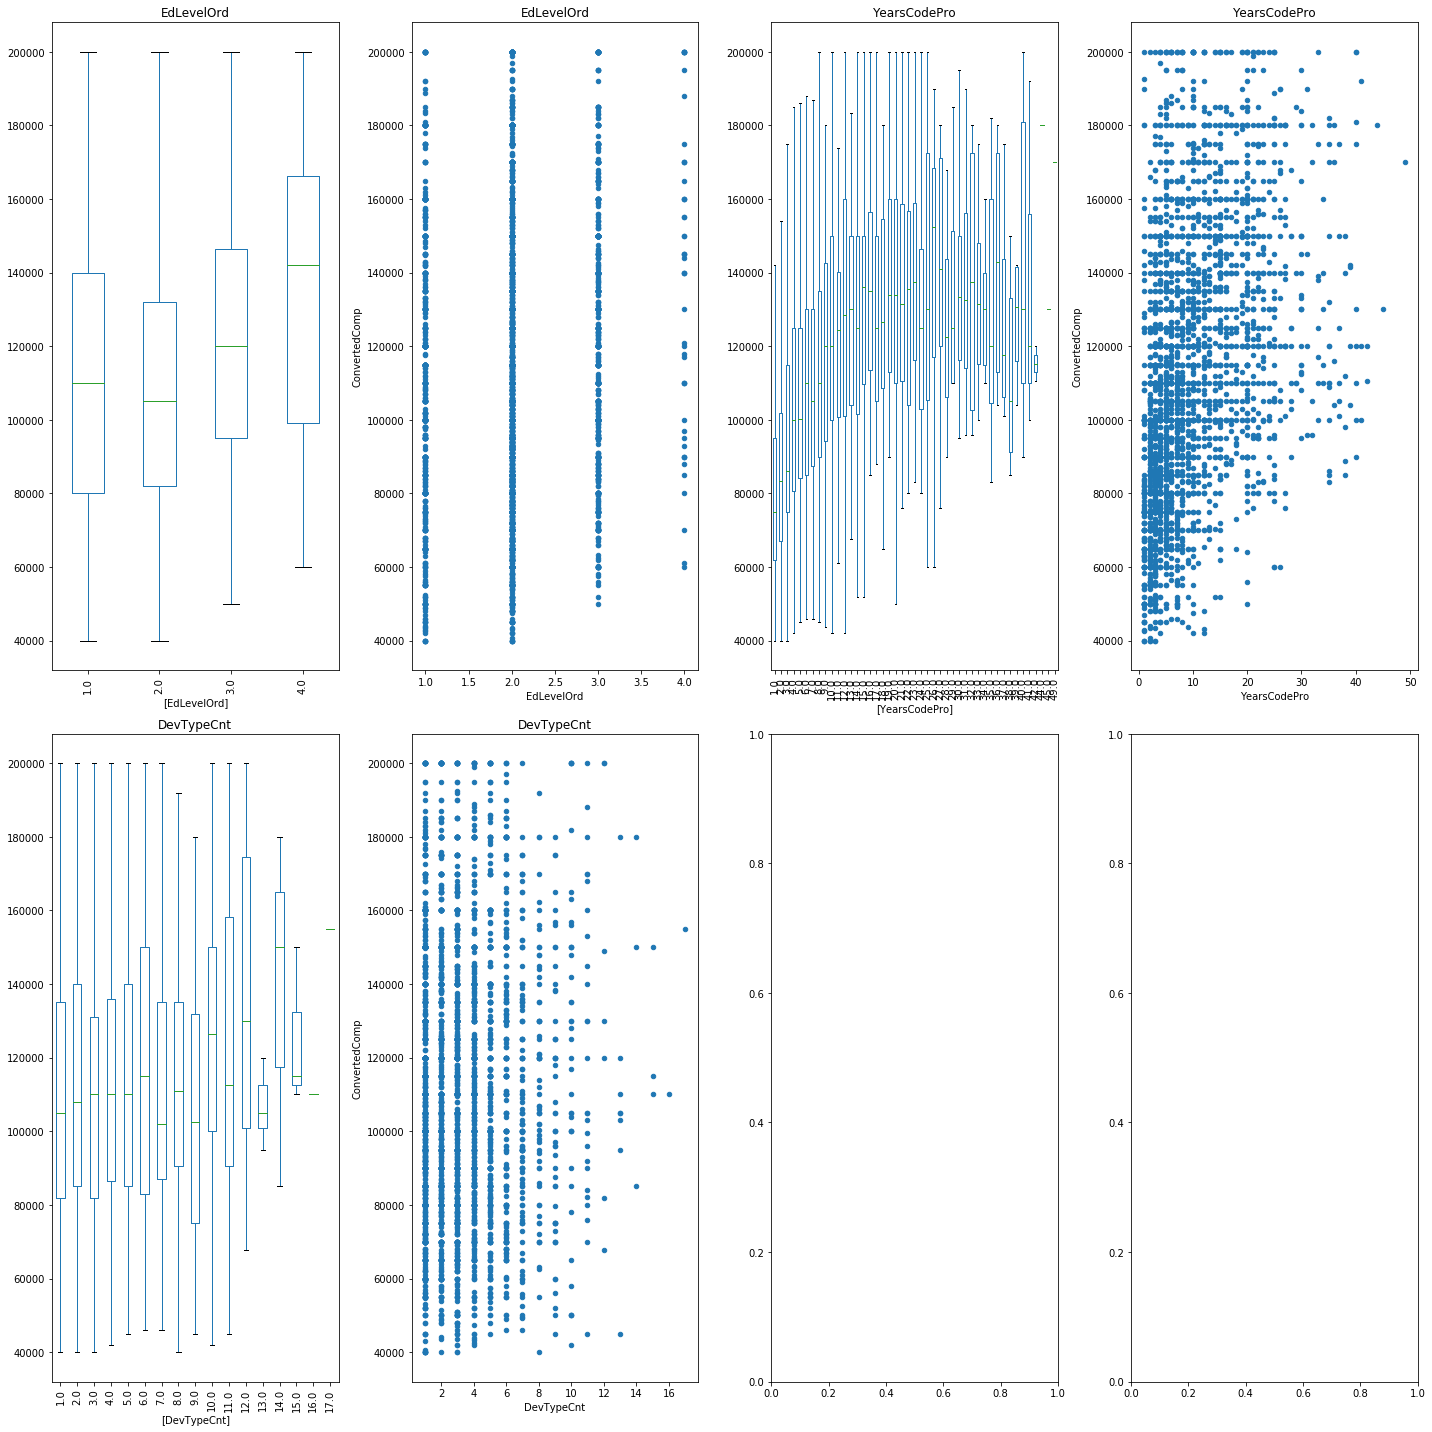

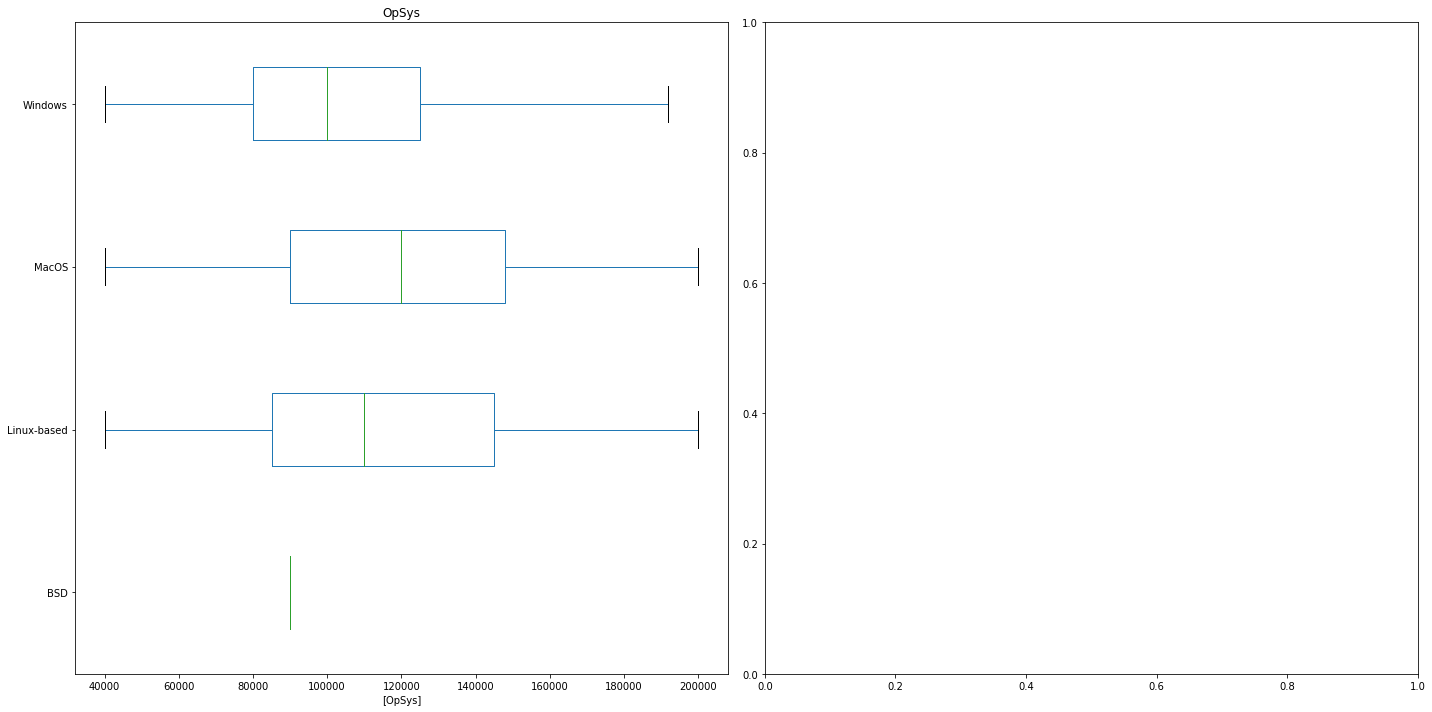

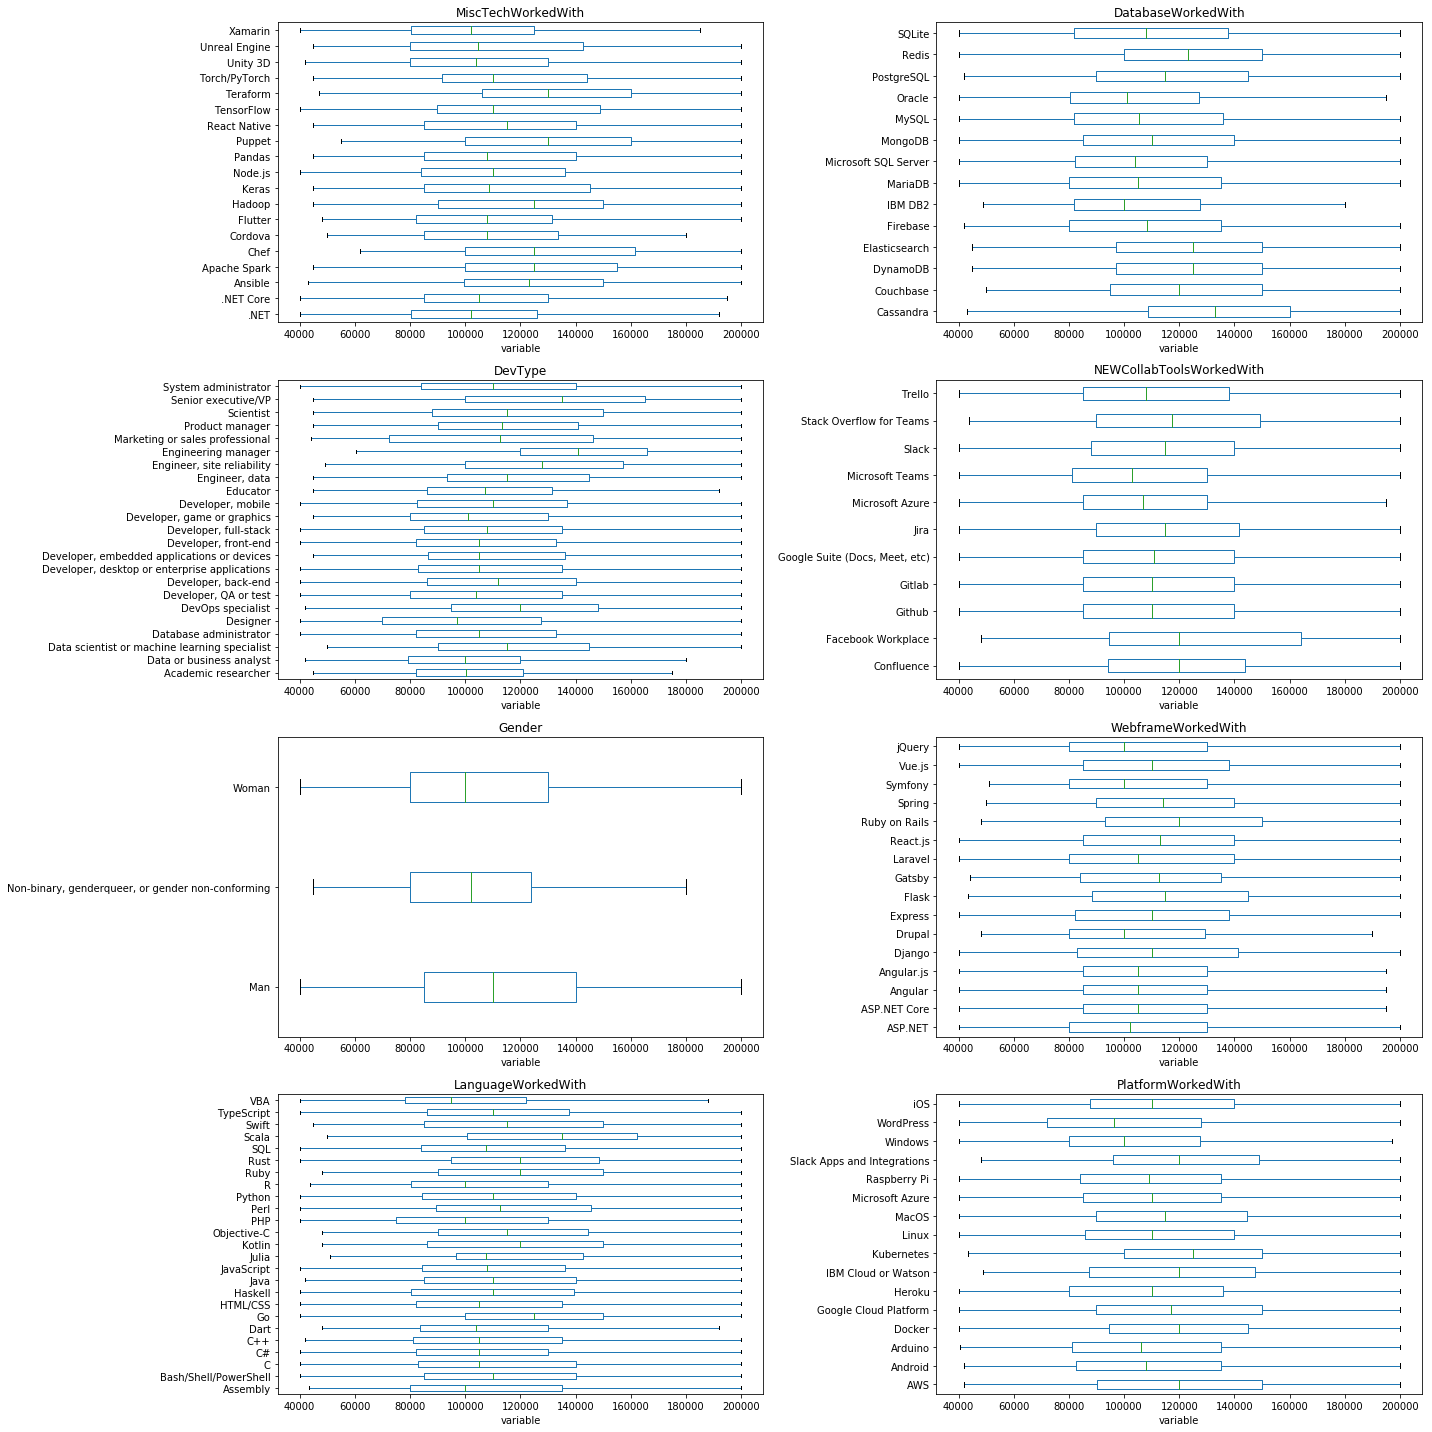

In [36]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['EdLevelOrd',
                                 'YearsCodePro', 
                                 'DevTypeCnt'], 
                     categoricals=['OpSys'], multi_options=all_multi_options)

In [37]:
run_model(us_df_limited)

(3312, 135) before trim
(3197, 134) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.9095736766087397
RFR Test Score: 0.405852015321851
LR Train Score: 0.3948156895556967
LR Test Score: 0.3771769059380108
[('YearsCodePro', 0.2390481410883901), ('Windows', 0.027151525764217133), ('DevTypeCnt', 0.026412934189541524), ('EdLevelOrd', 0.020717846436381655), ('Confluence', 0.019193540289776618), ('PHP', 0.01861508130122383), ('Windows', 0.01781592228244444), ('Jira', 0.015791047252479377), ('jQuery', 0.015130616124625447), ('Engineering manager', 0.0149907624807059)]


# Option 2
Columns: 
* numericals=['YearsCodePro']
* categoricals=['OpSys', 'EdLevel']
* multi_options=all_multi_options

(6456, 69)
(3521, 142)


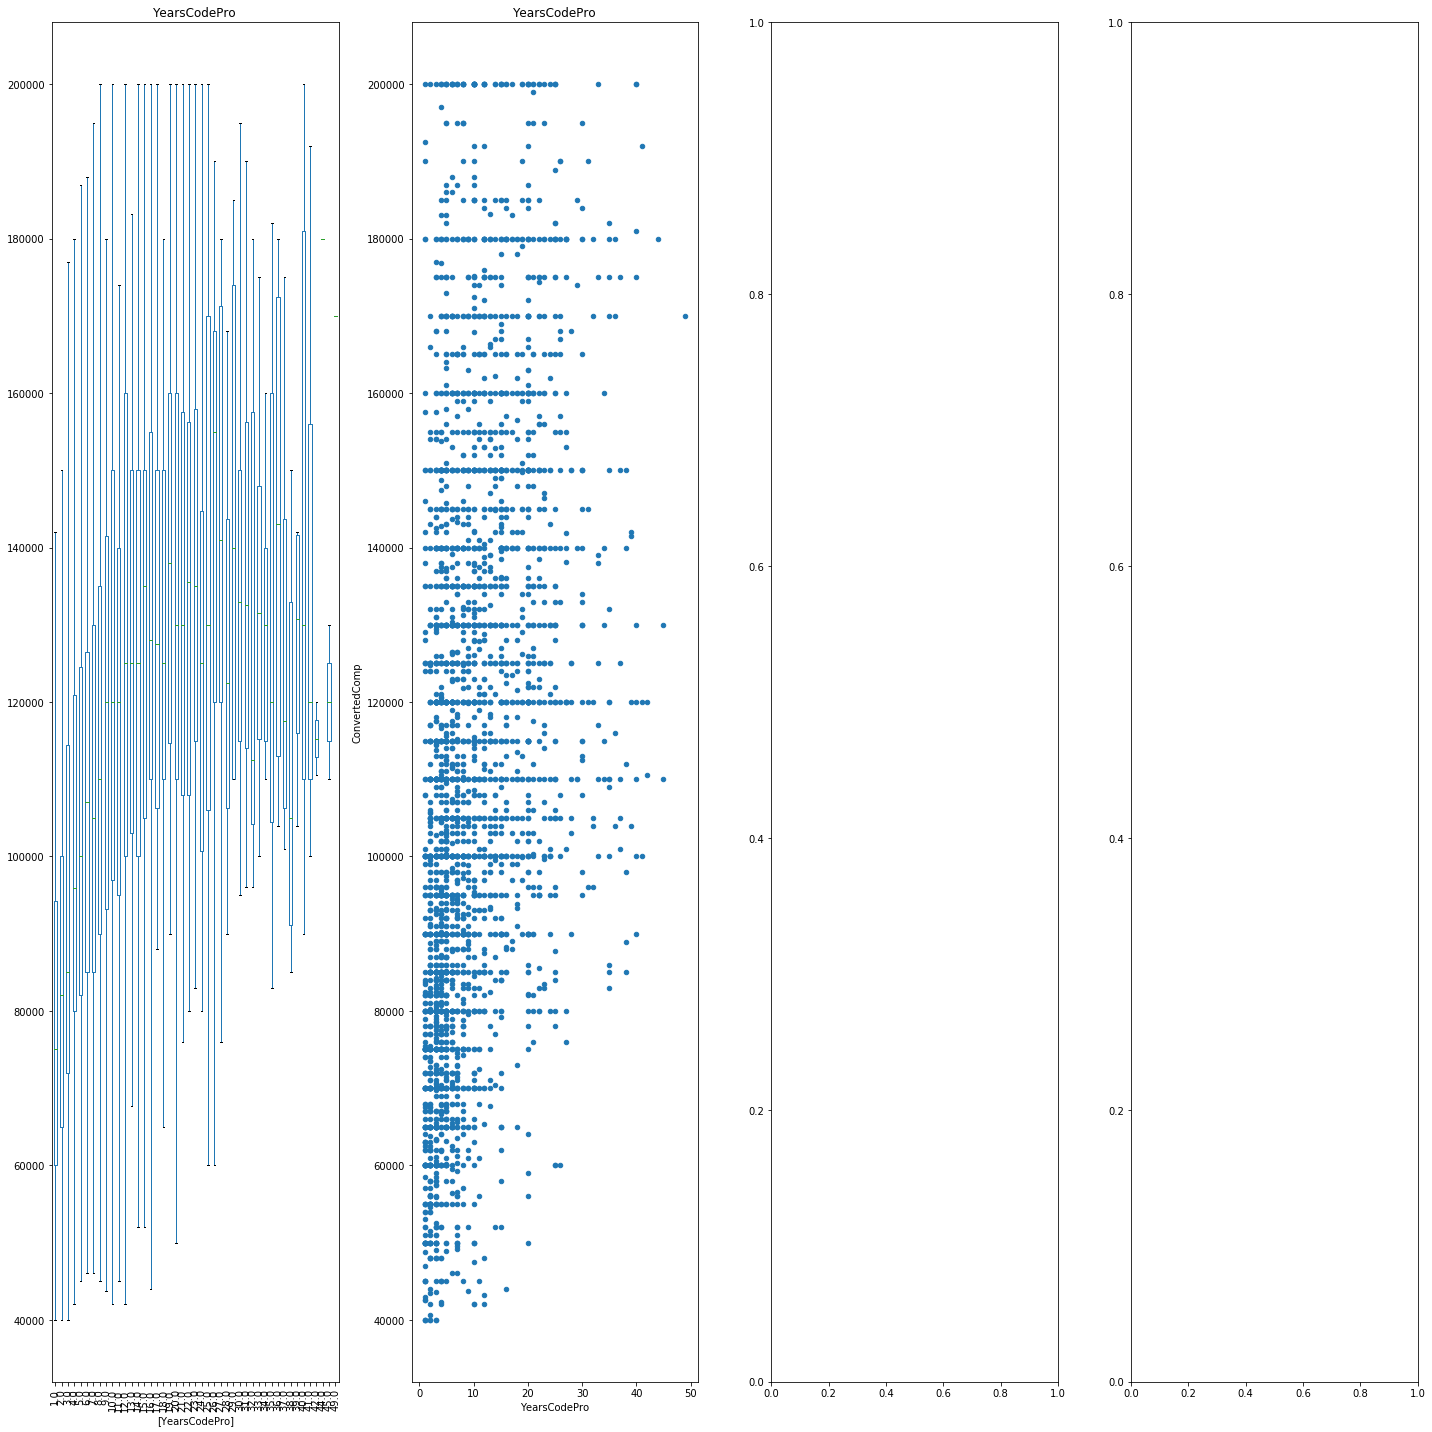

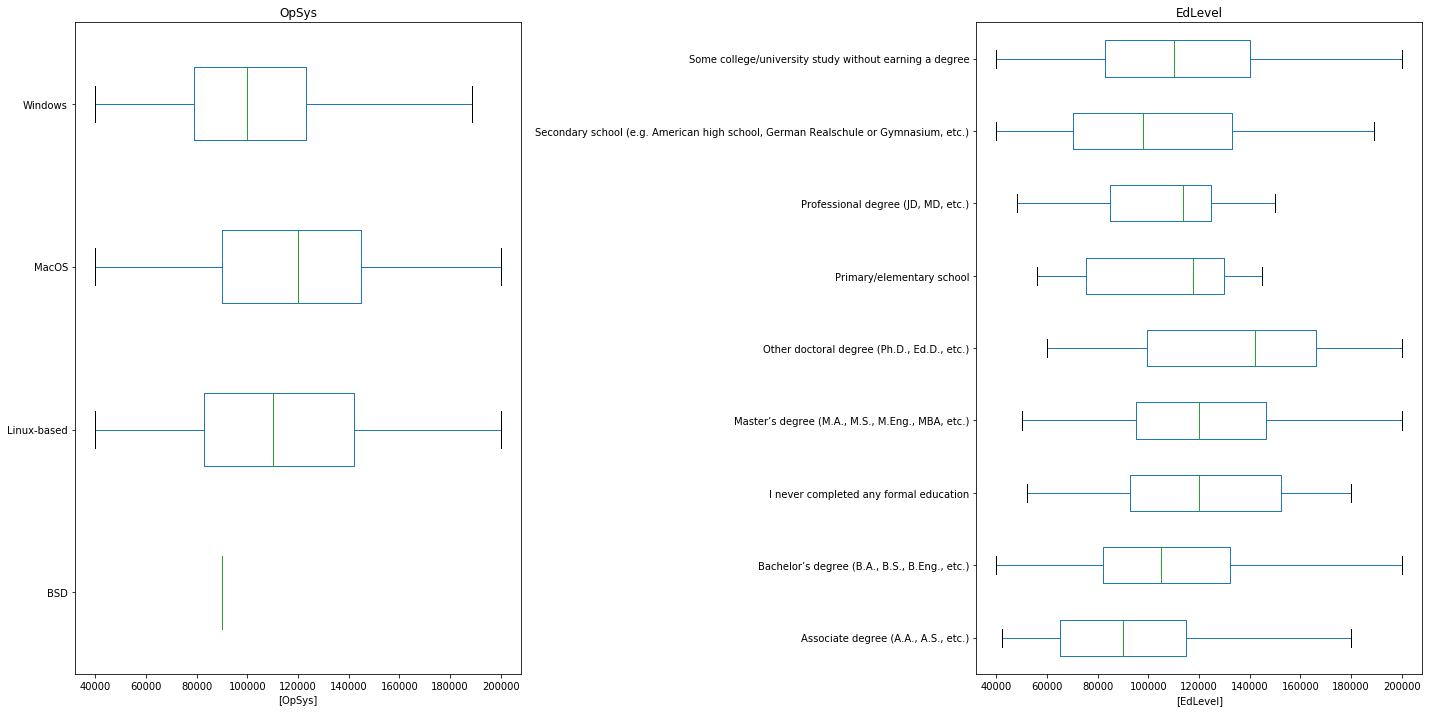

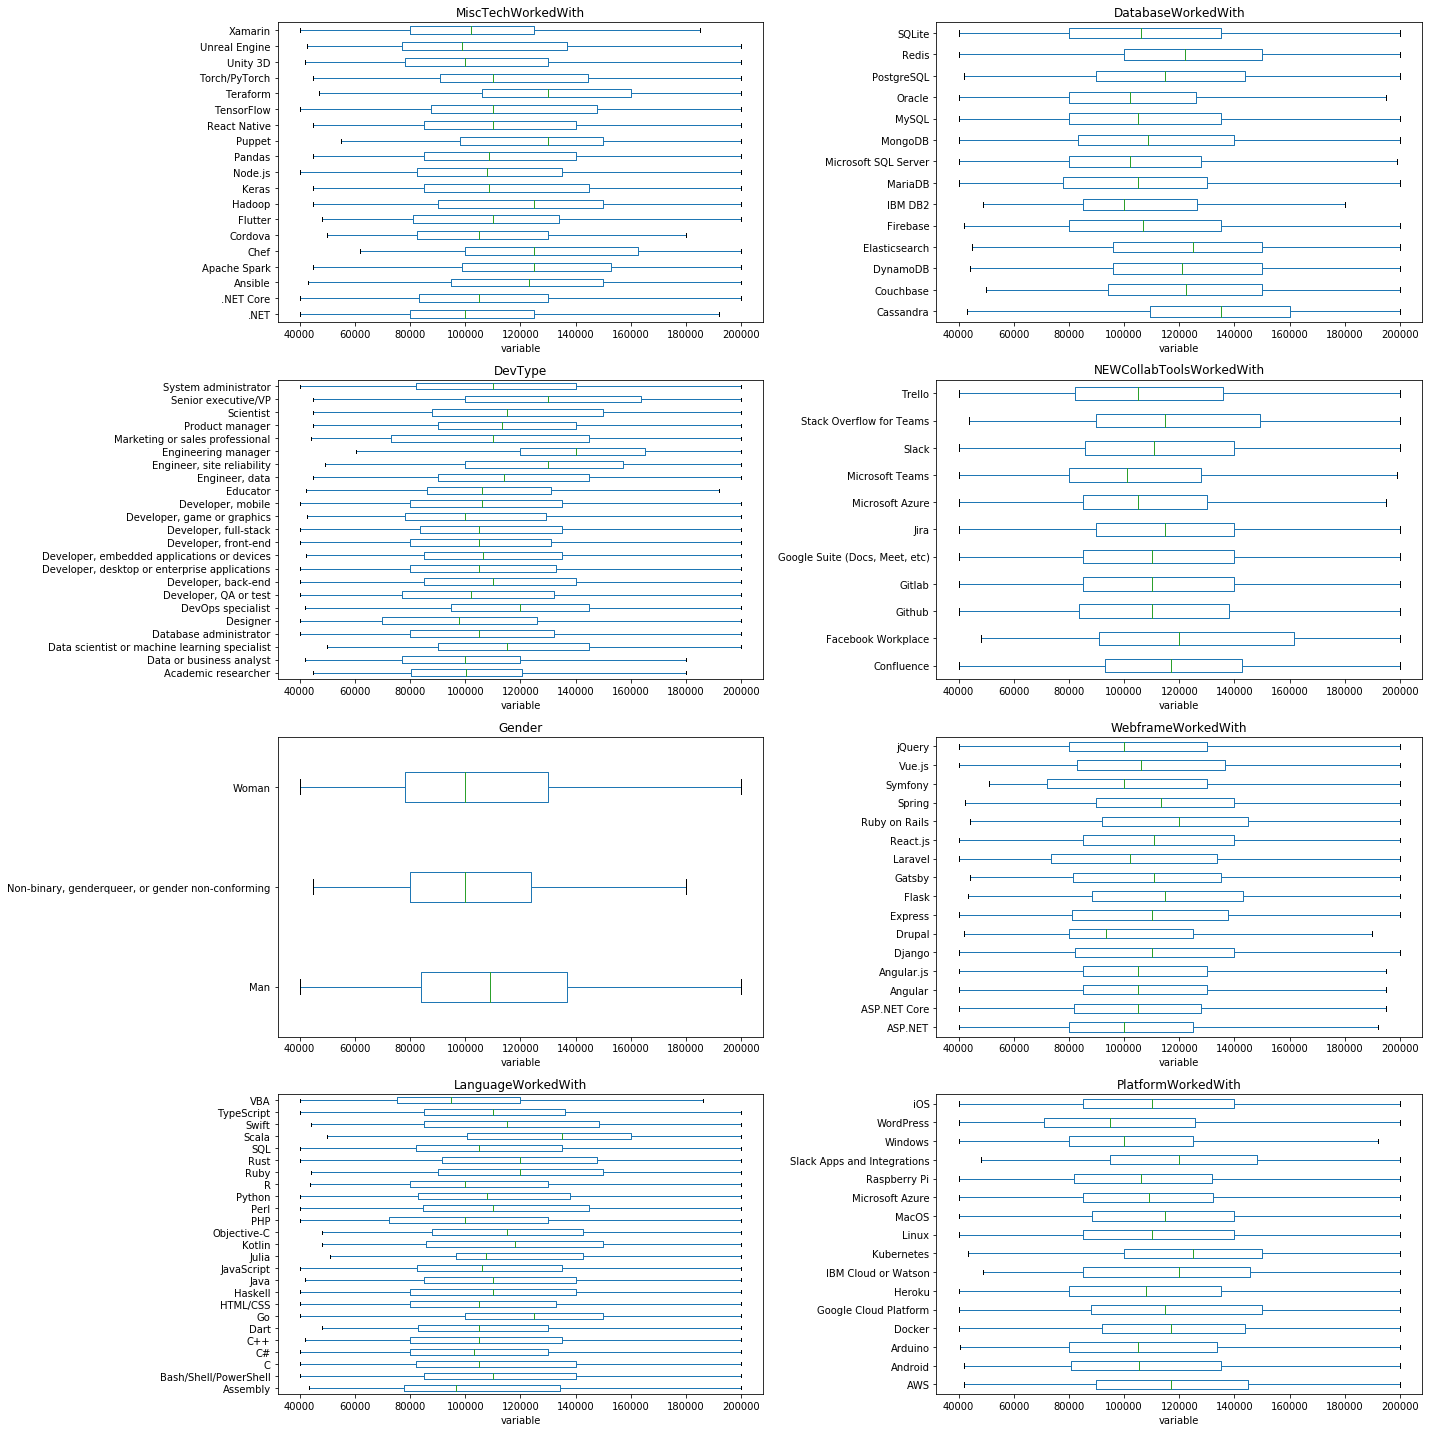

In [38]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro'], 
                     categoricals=['OpSys', 'EdLevel'], 
                     multi_options=all_multi_options)

In [39]:
run_model(us_df_limited)

(3521, 142) before trim
(3398, 141) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.9129153951944465
RFR Test Score: 0.34919530091480167
LR Train Score: 0.4336309440810958
LR Test Score: 0.3208301971787634
[('YearsCodePro', 0.24661986404861916), ('Windows', 0.04503977112270562), ('Confluence', 0.01807153295650981), ('Jira', 0.01704589461674418), ('WordPress', 0.016801082156853508), ('Engineering manager', 0.015975069245679846), ('PHP', 0.015727462064491316), ('jQuery', 0.013004146461383299), ('AWS', 0.012406729397082417), ('Redis', 0.0117813682274727)]


(6456, 69)
(3521, 143)


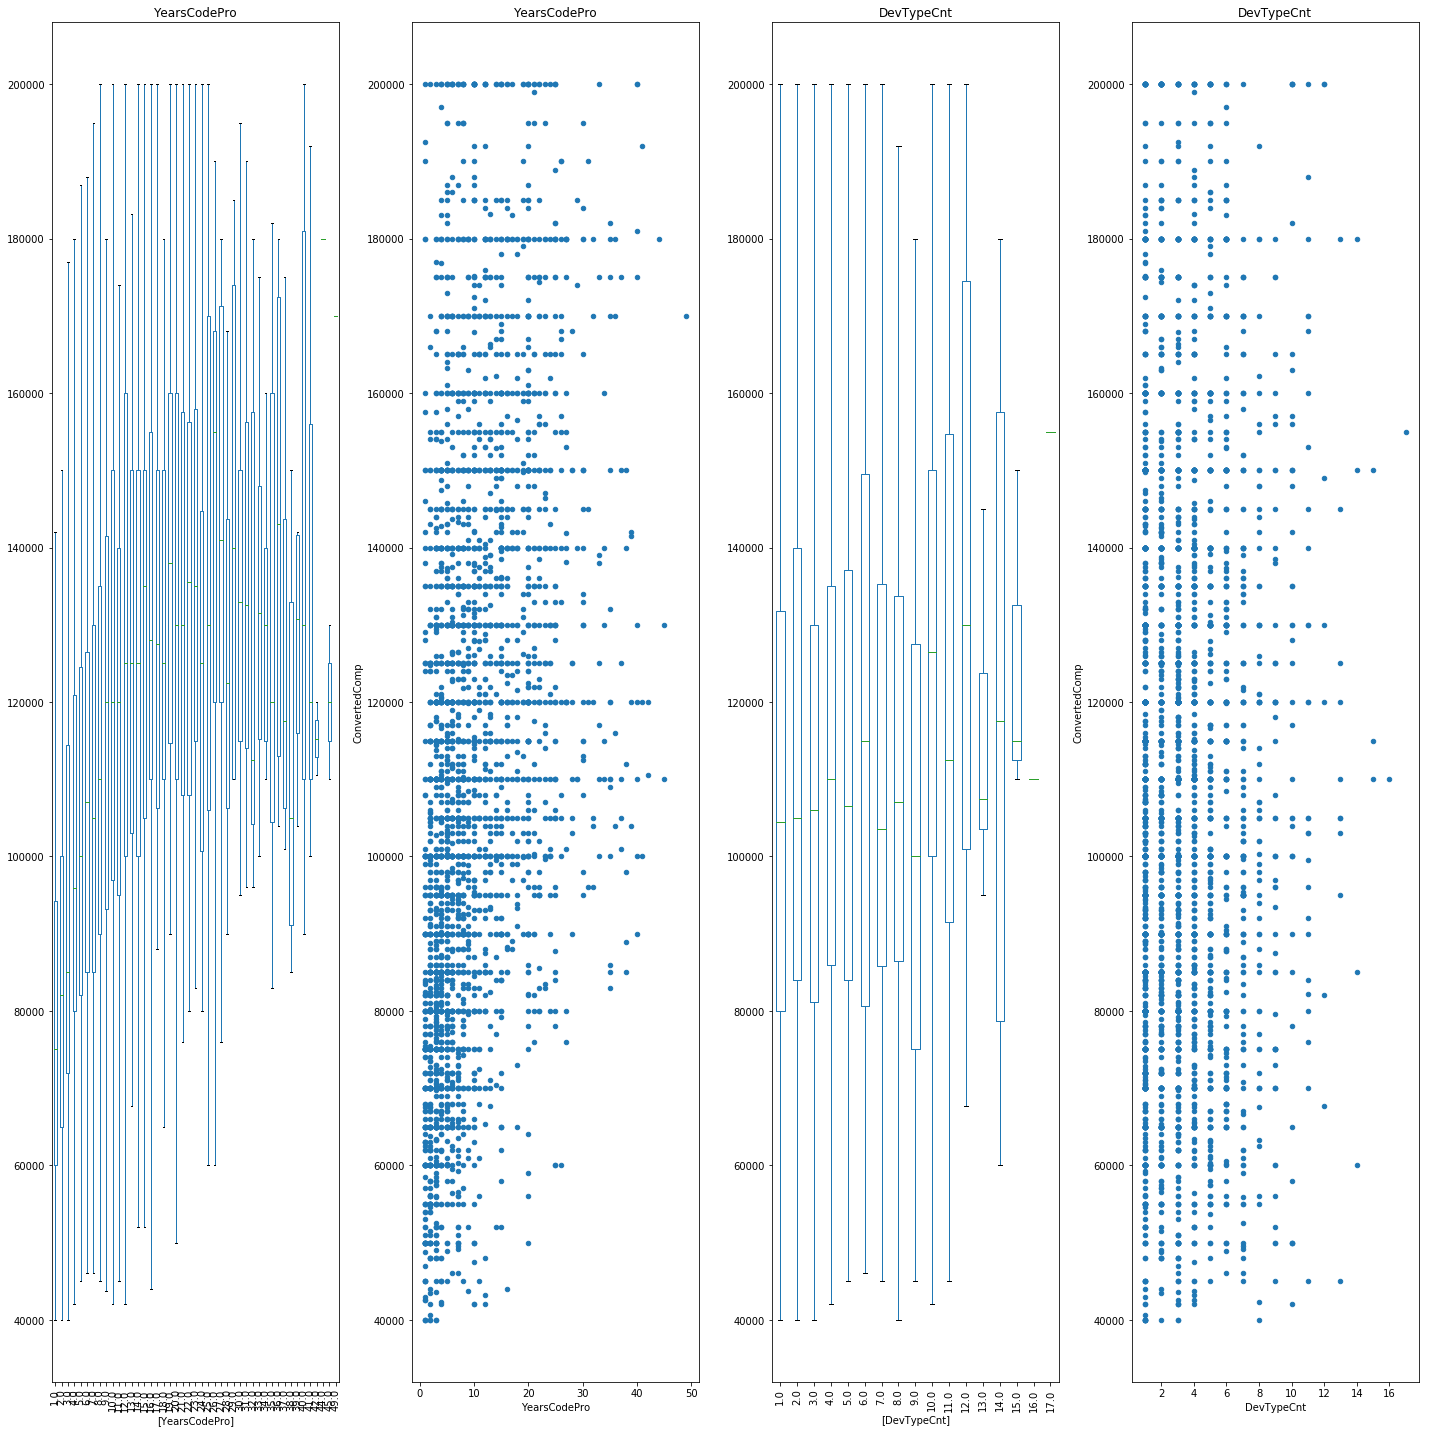

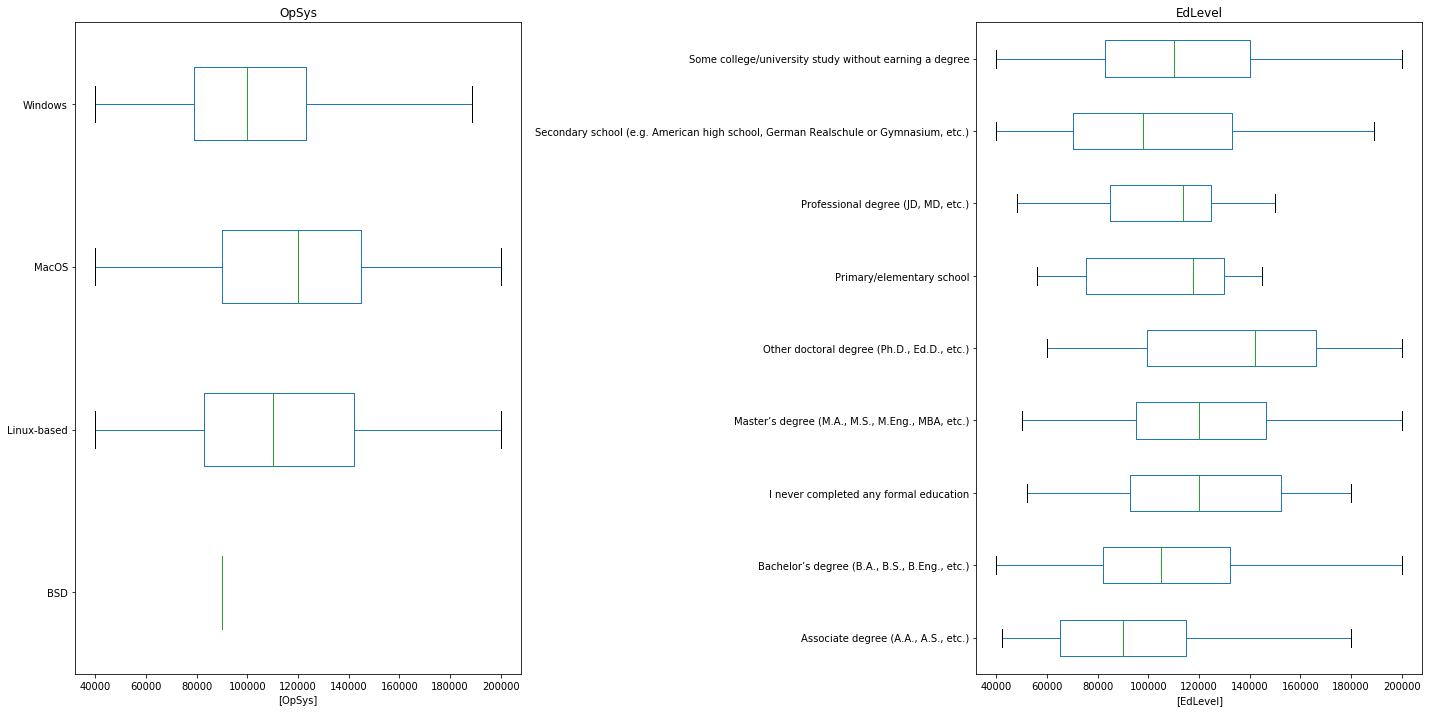

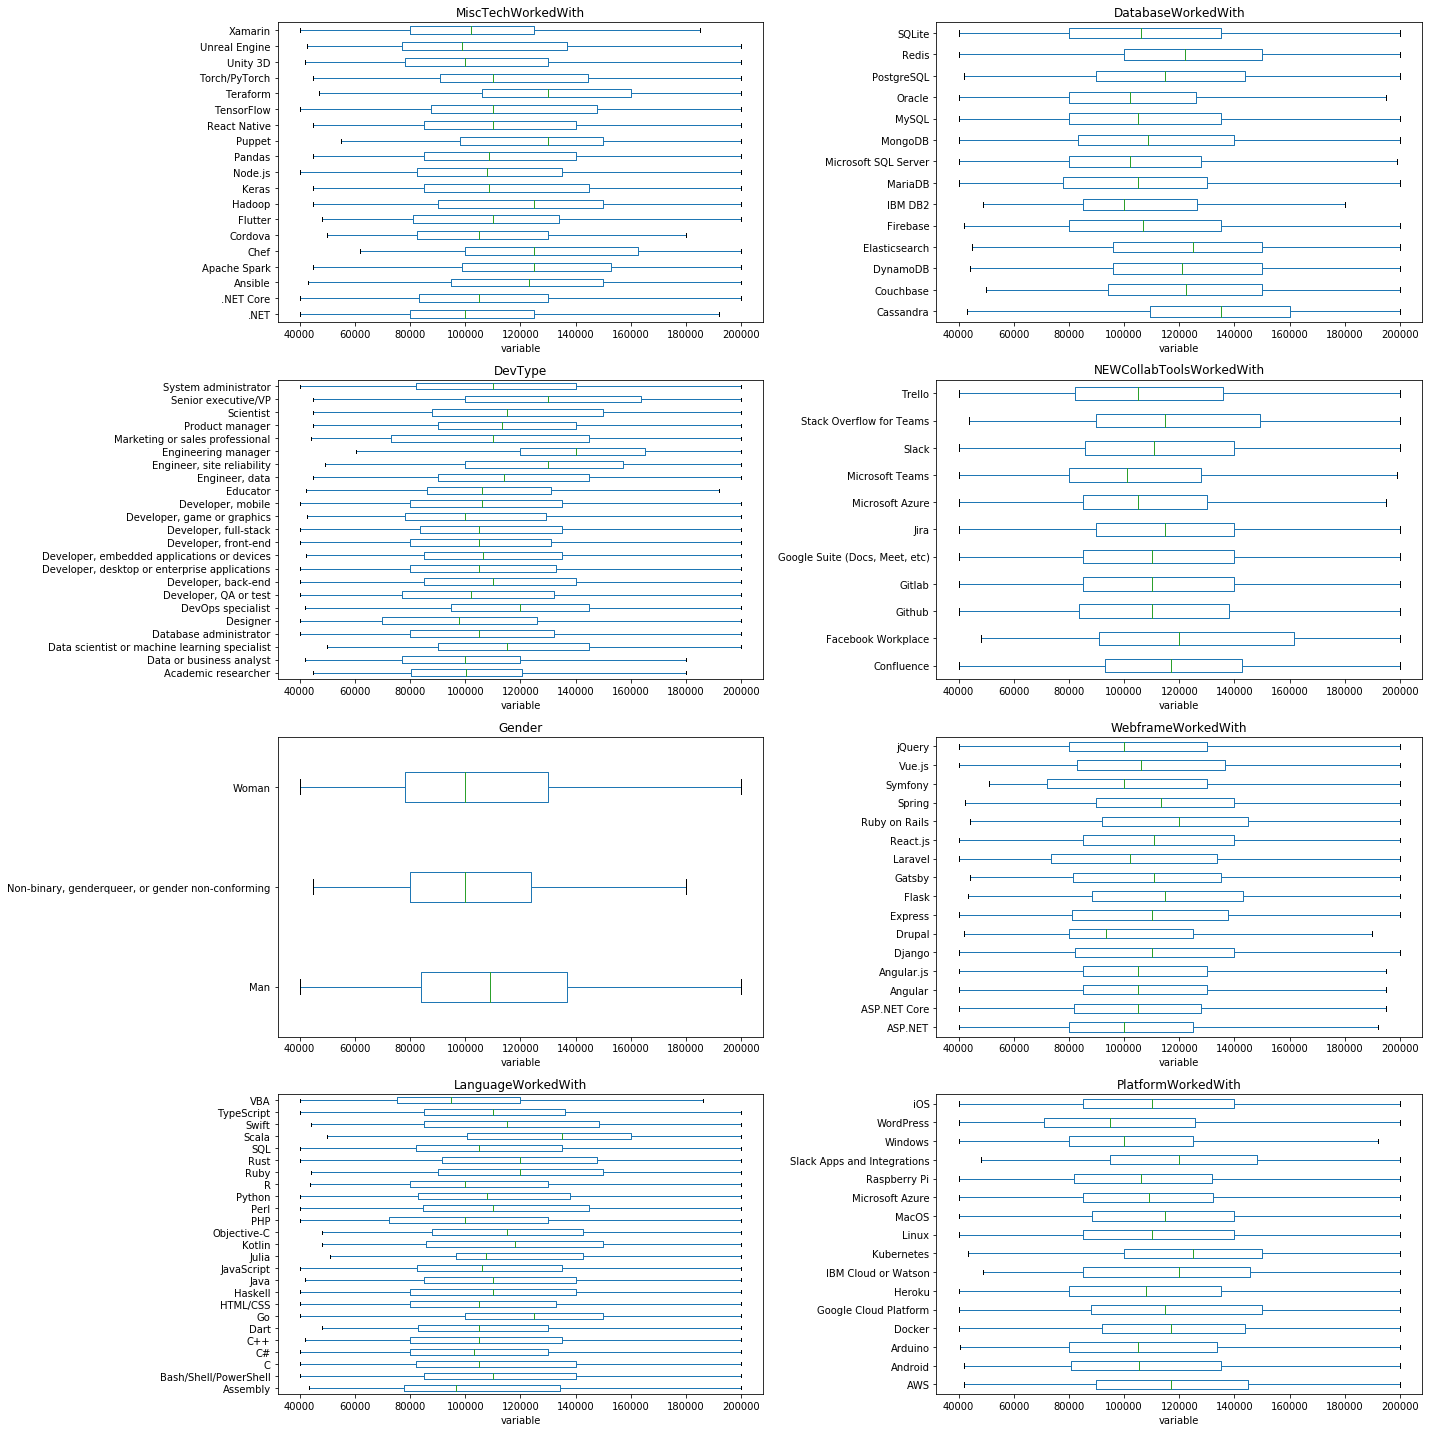

In [57]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro', 
                                 'DevTypeCnt'], 
                     categoricals=['OpSys', 'EdLevel'], multi_options=all_multi_options)

In [58]:
run_model(us_df_limited)

(3521, 143) before trim
(3398, 142) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.9120638647504316
RFR Test Score: 0.3571579465693696
LR Train Score: 0.42112444730585796
LR Test Score: 0.34853830158104904
[('YearsCodePro', 0.2369253242324655), ('Windows', 0.04434947124536988), ('DevTypeCnt', 0.0248755894511313), ('PHP', 0.023767943622876694), ('Engineering manager', 0.022651080745319855), ('Confluence', 0.018956310570813796), ('Jira', 0.016509217988944547), ('Redis', 0.01523462996212769), ('MacOS', 0.014207024048755679), ('jQuery', 0.013250314291108988)]


(6456, 69)
(6102, 39)


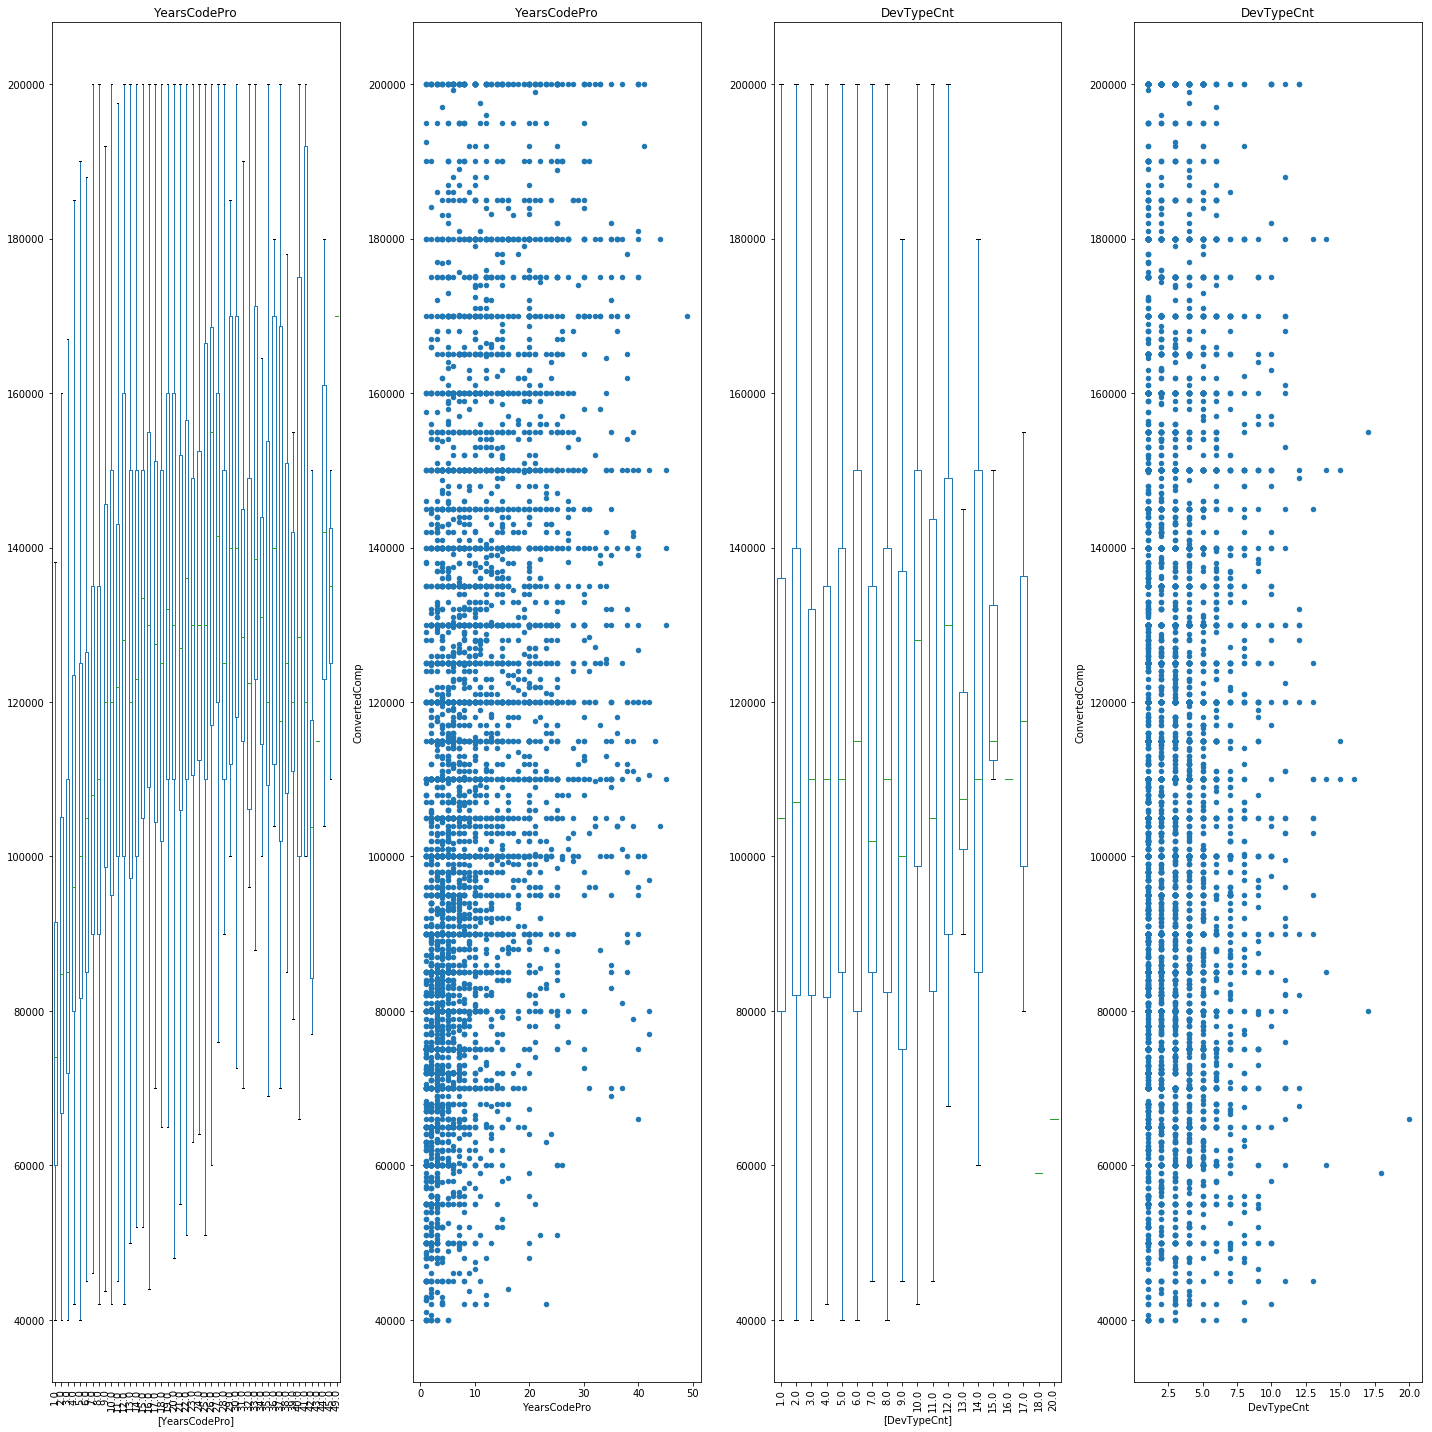

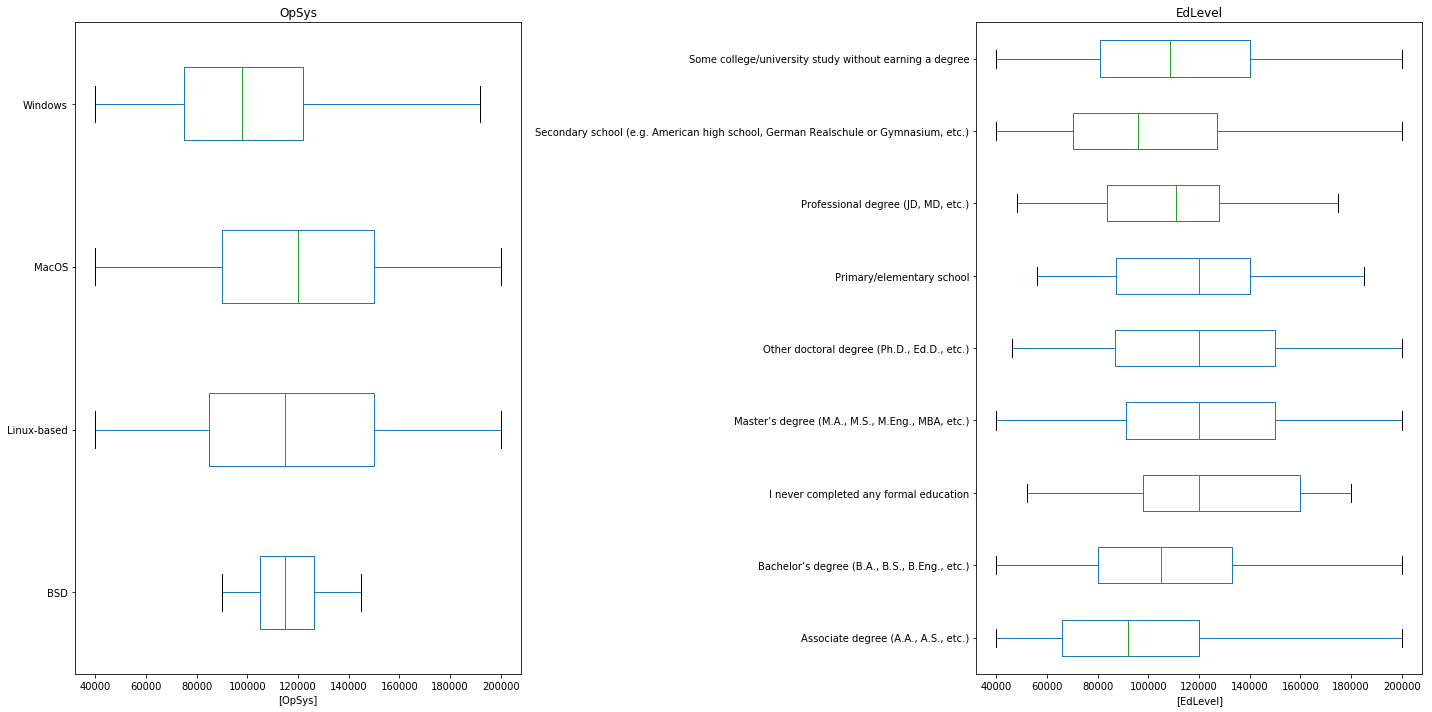

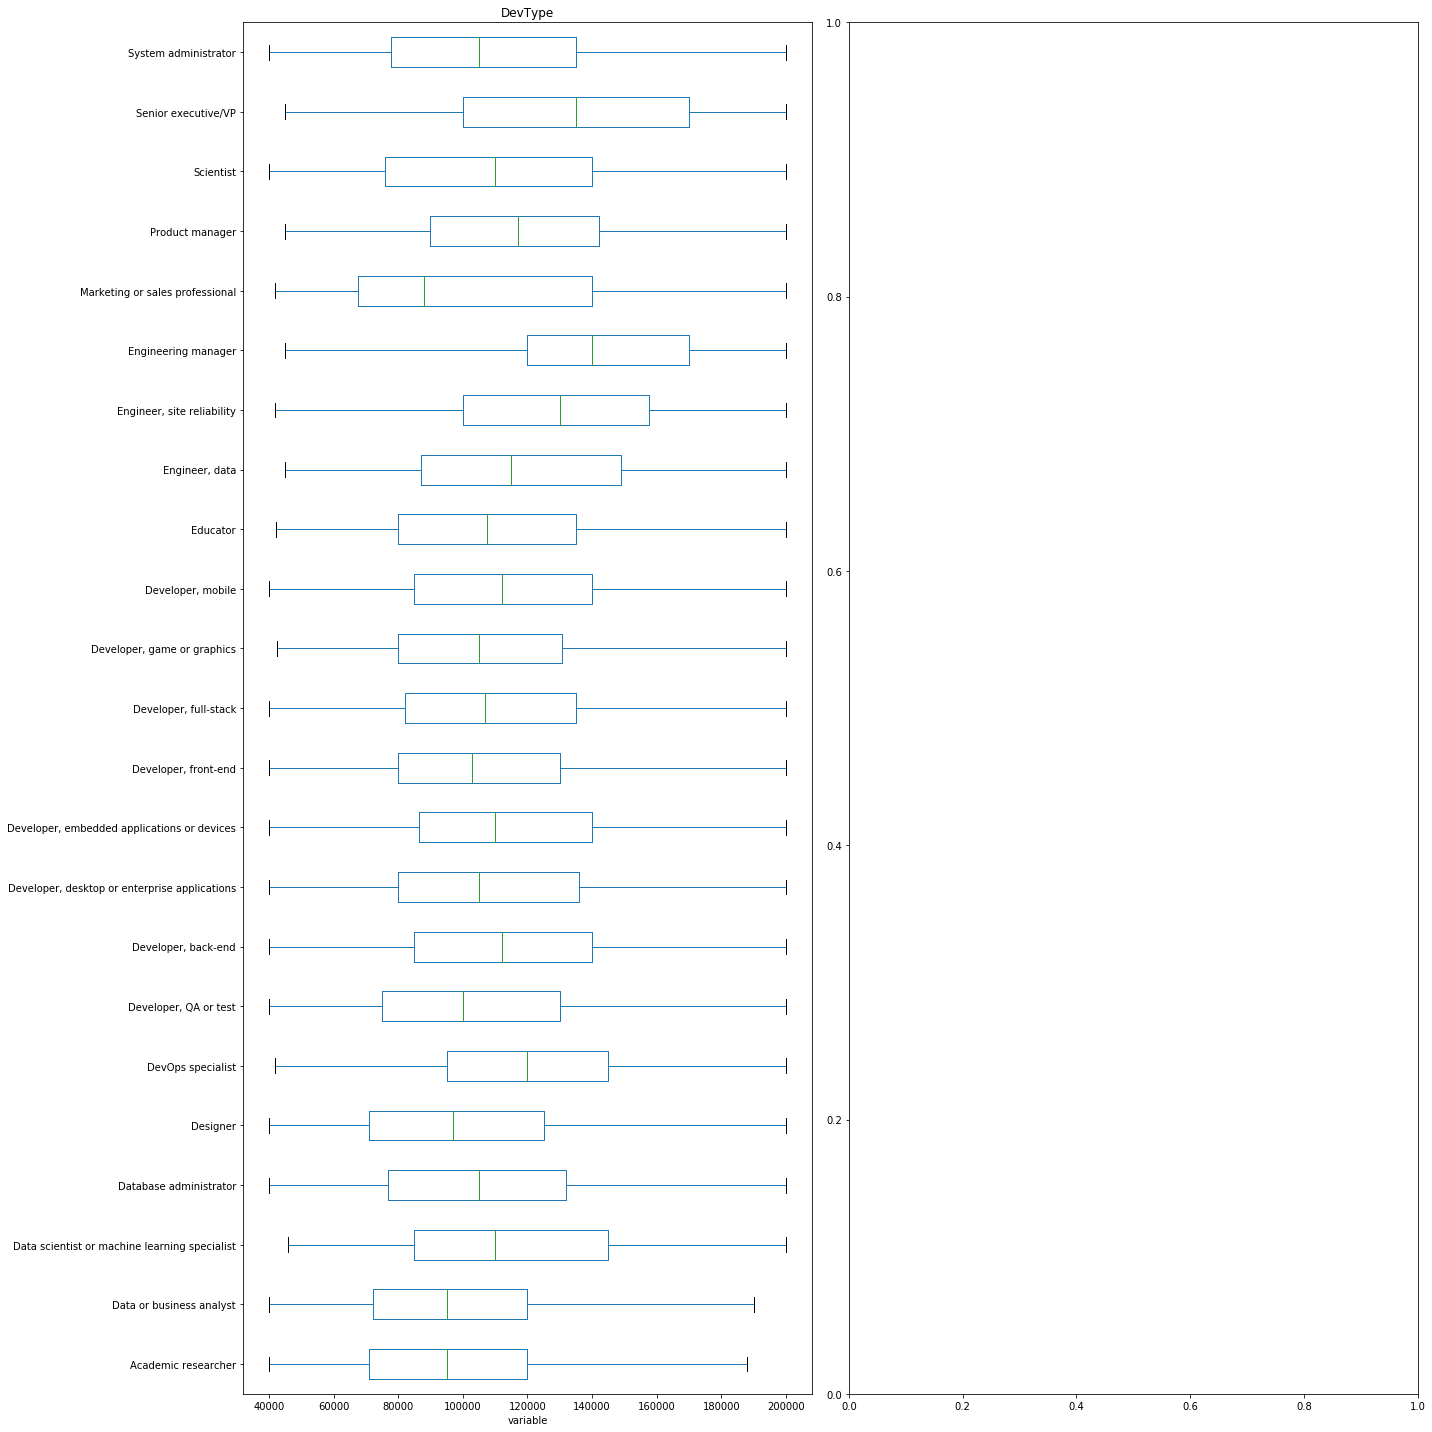

In [42]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro', 
                                 'DevTypeCnt'], 
                     categoricals=['OpSys', 'EdLevel'], 
                     multi_options=['DevType'])

In [43]:
run_model(us_df_limited)

(6102, 39) before trim
(5888, 38) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.7937819144689109
RFR Test Score: 0.20123444235689314
LR Train Score: 0.30518693170600975
LR Test Score: 0.3084143784214104
[('YearsCodePro', 0.33312213175388705), ('DevTypeCnt', 0.08816370596716988), ('Windows', 0.0668602275585202), ('Developer, full-stack', 0.02886516941569236), ('Developer, back-end', 0.028494161524834576), ('Developer, front-end', 0.026319250391490665), ('Engineering manager', 0.025782518696395827), ('Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 0.022985493109090836), ('Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 0.022850946148293746), ('Developer, desktop or enterprise applications', 0.022779240794451337)]


# Option 1
Columns:
* numericals=['YearsCodePro']
* categoricals=['EdLevel', 'OpSys']
* multi_options=['DevType']

**A lot is sacrificed when giving up the rest of the multi_options features. However, given the significant added number of eatures and the additional burden of input transformation. The first pass will not include the Software stack features. 

(6456, 69)
(6102, 38)


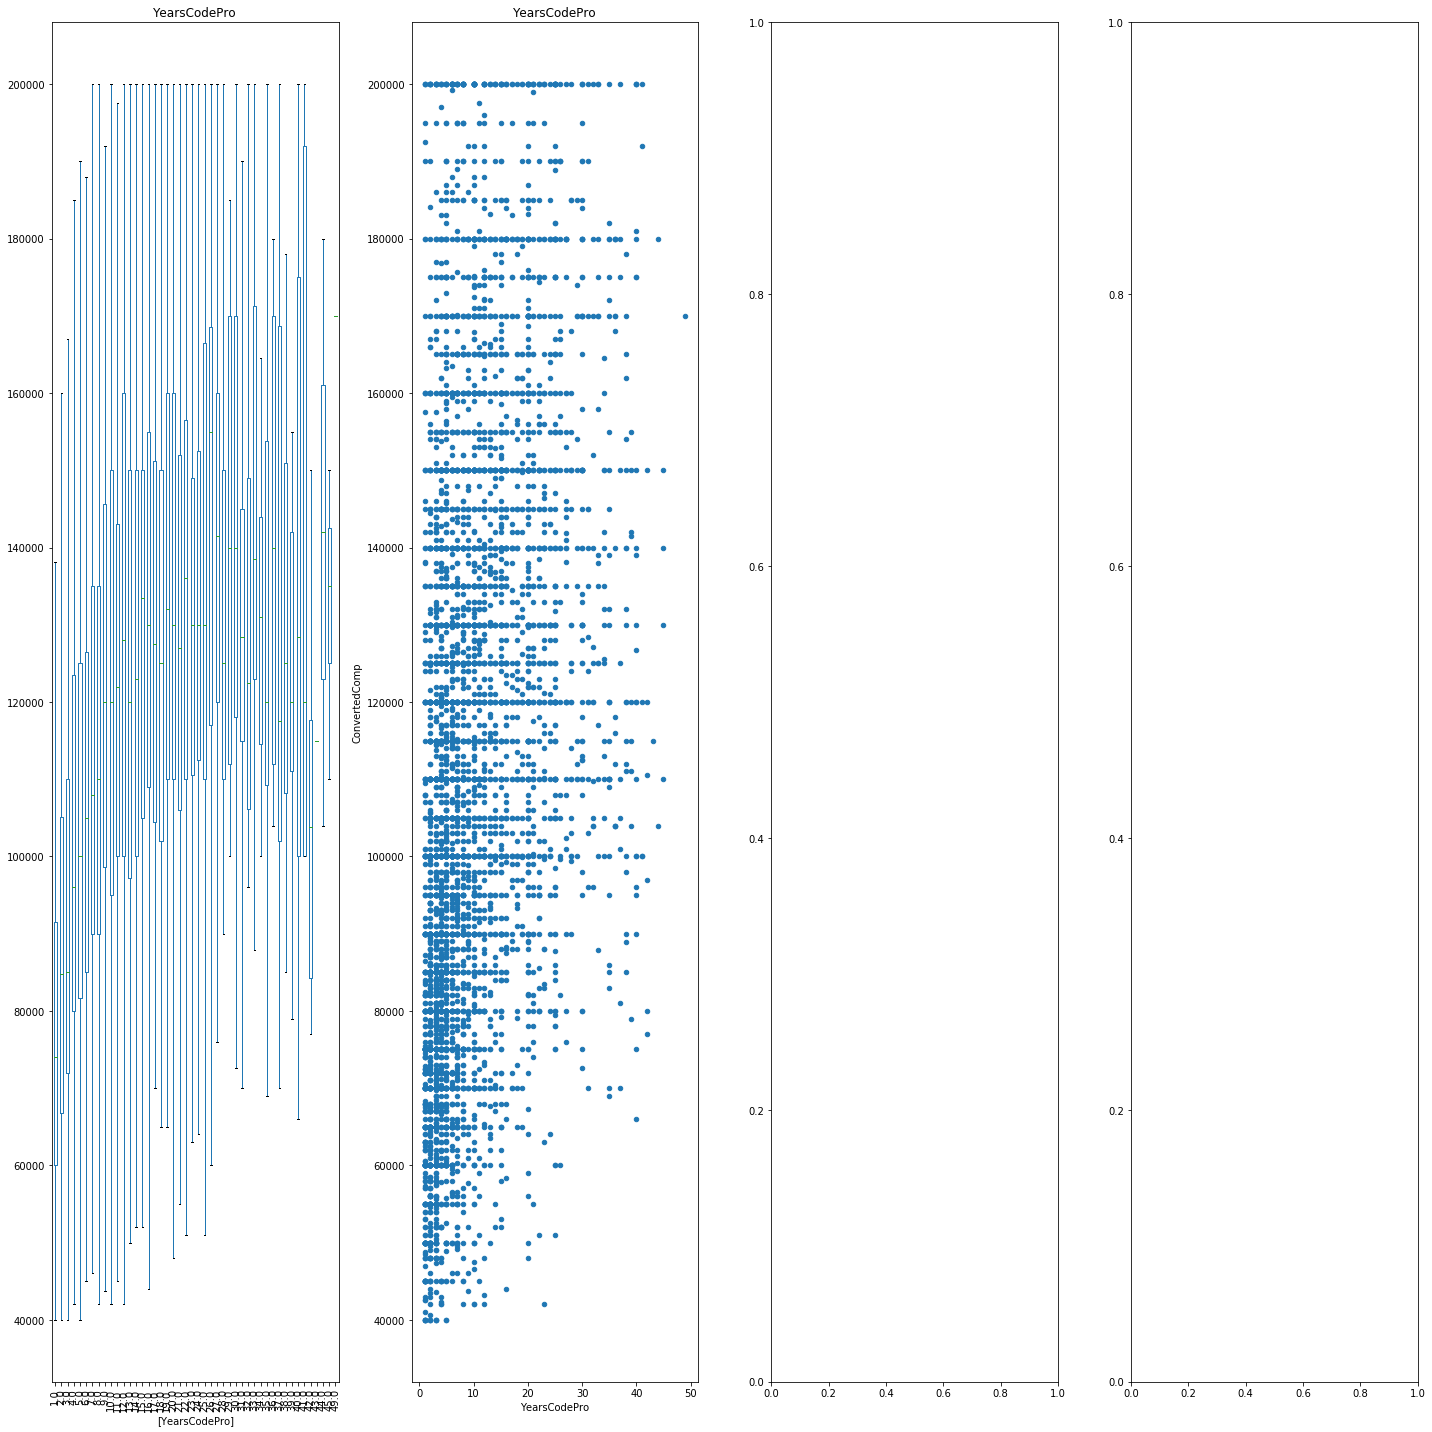

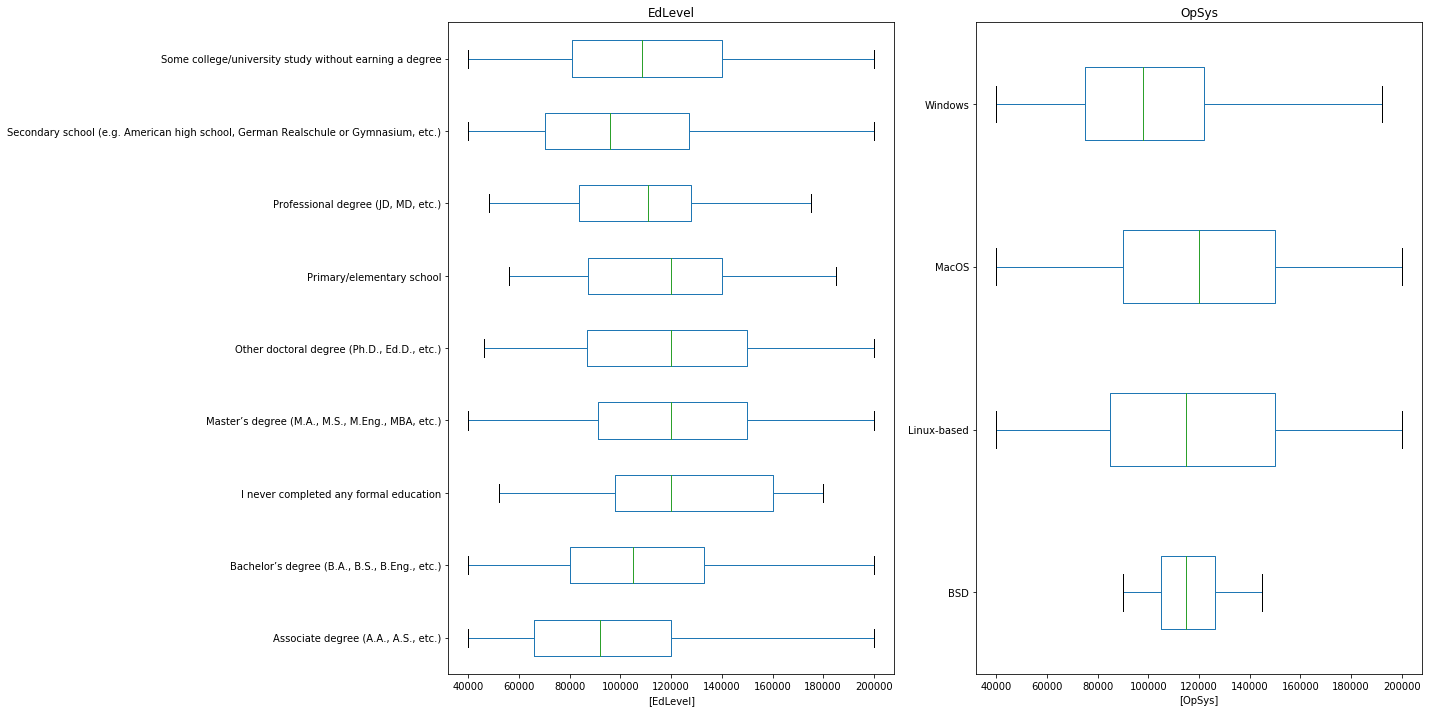

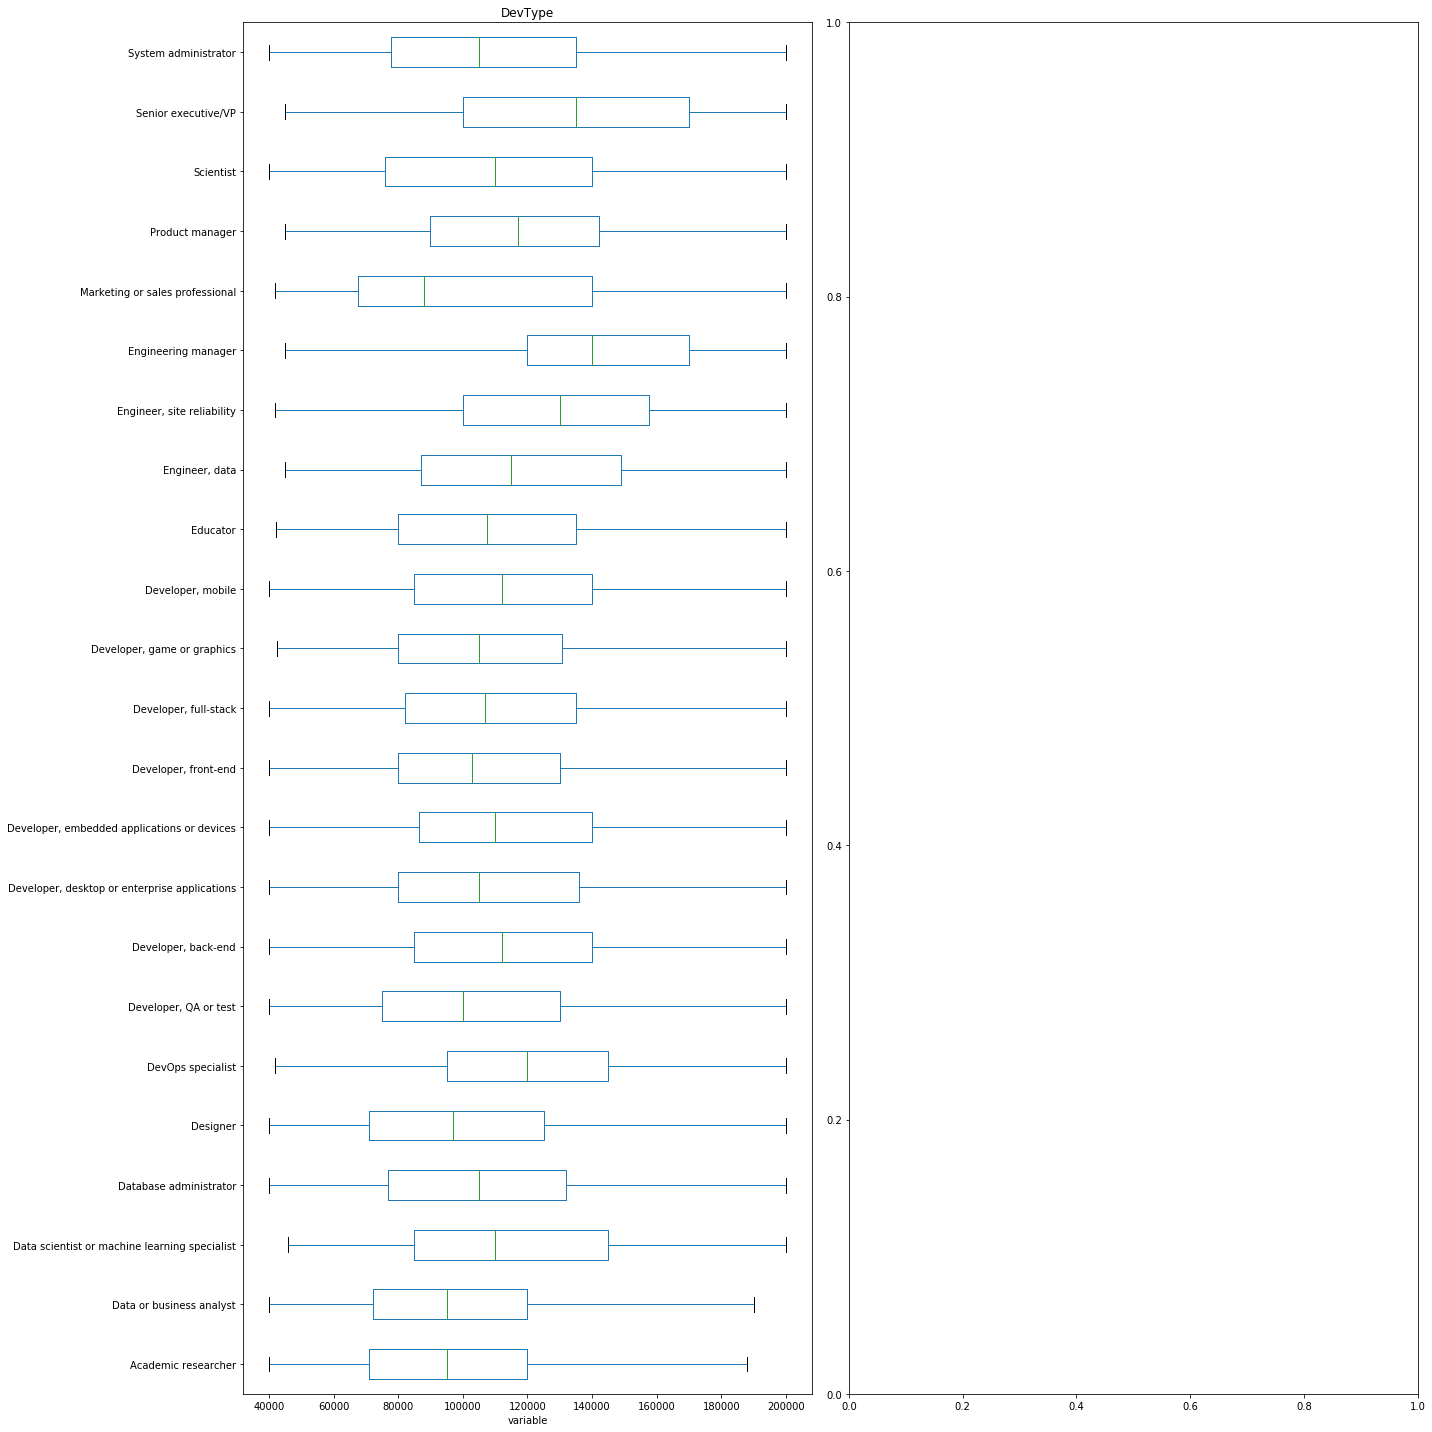

In [44]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro'], 
                     categoricals=['EdLevel', 'OpSys'], 
                     multi_options=['DevType'])

In [45]:
run_model(us_df_limited)

(6102, 38) before trim
(5888, 37) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.7927566574132328
RFR Test Score: 0.18849405802200792
LR Train Score: 0.31616464502809916
LR Test Score: 0.27008384006935093
[('YearsCodePro', 0.33973290074130935), ('Windows', 0.06868605755739529), ('Developer, full-stack', 0.03678459376749986), ('Developer, back-end', 0.03597511777120554), ('Developer, front-end', 0.033053788872618624), ('Developer, desktop or enterprise applications', 0.03302331605473791), ('DevOps specialist', 0.027357577086498237), ('Developer, mobile', 0.0258189897782229), ('Engineering manager', 0.025794880110139022), ('Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 0.022894320194193178)]


(6456, 69)
(6325, 34)


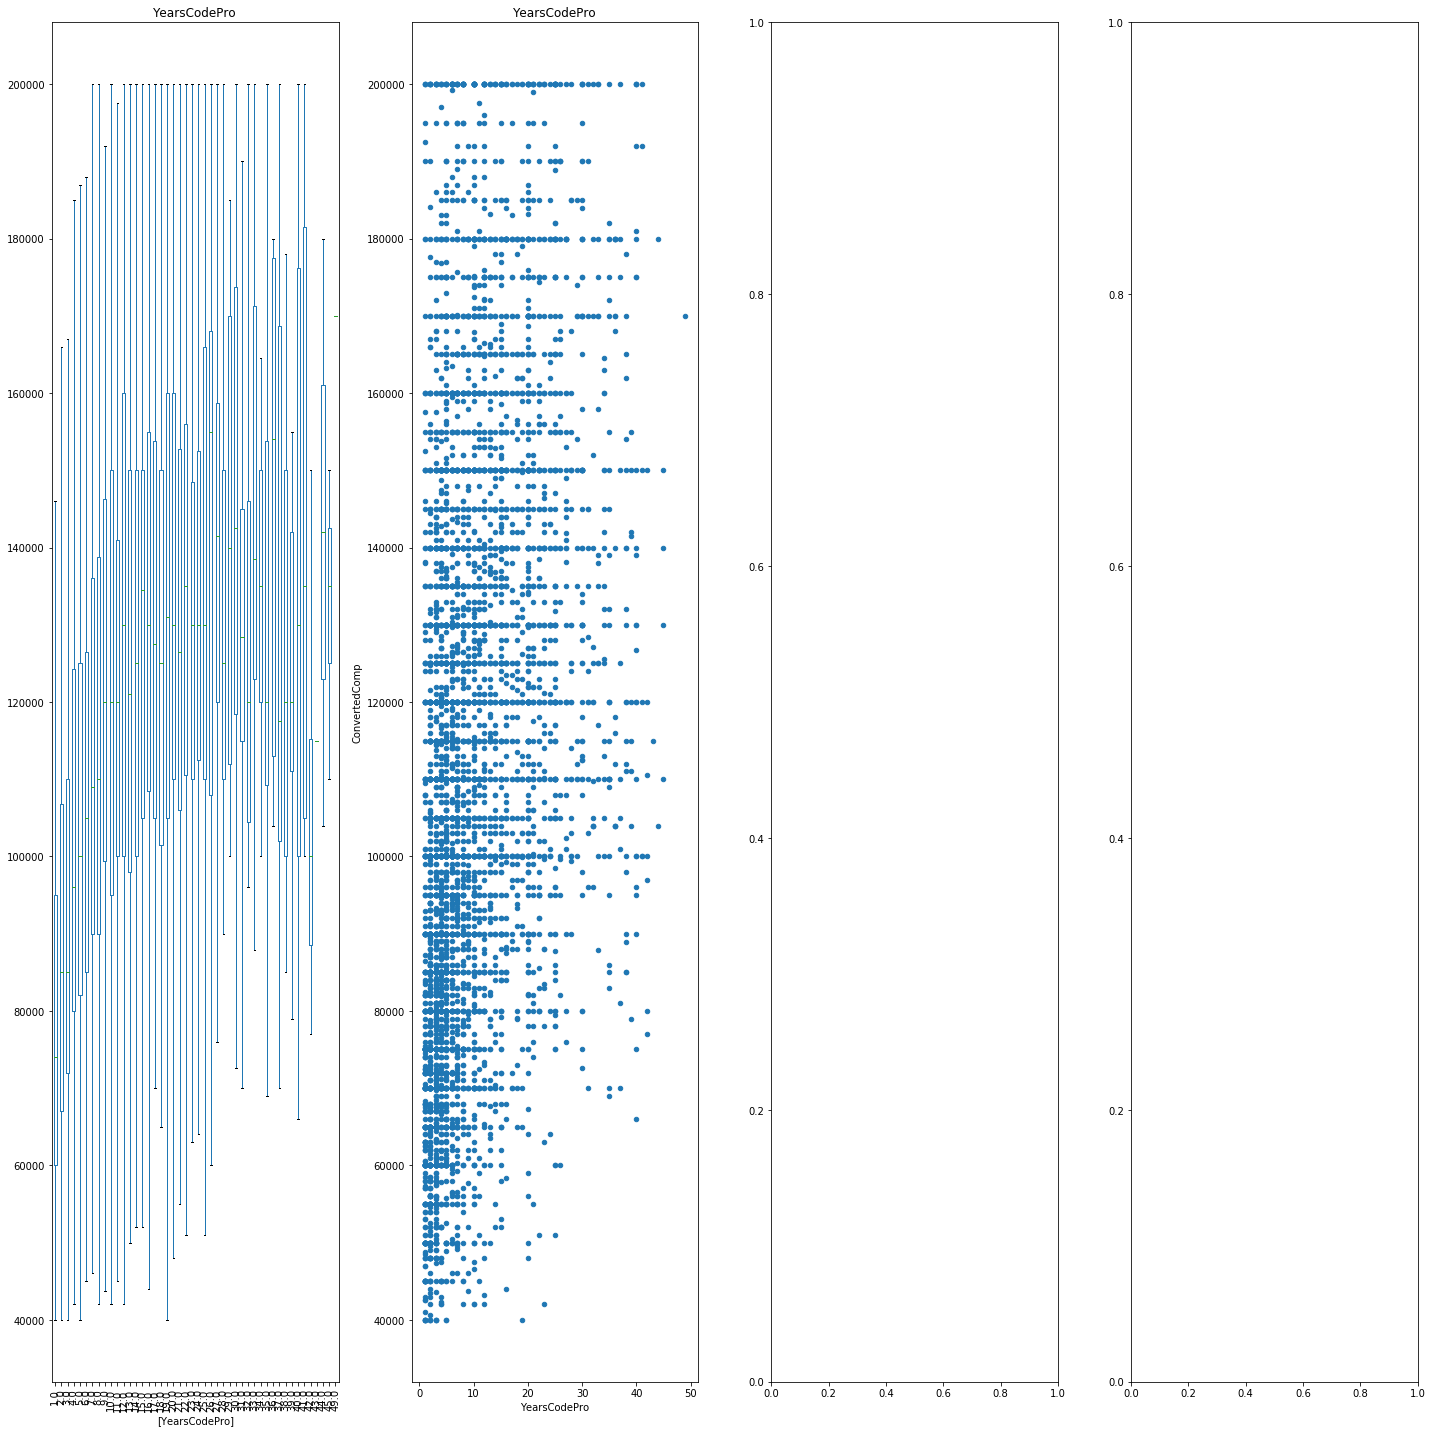

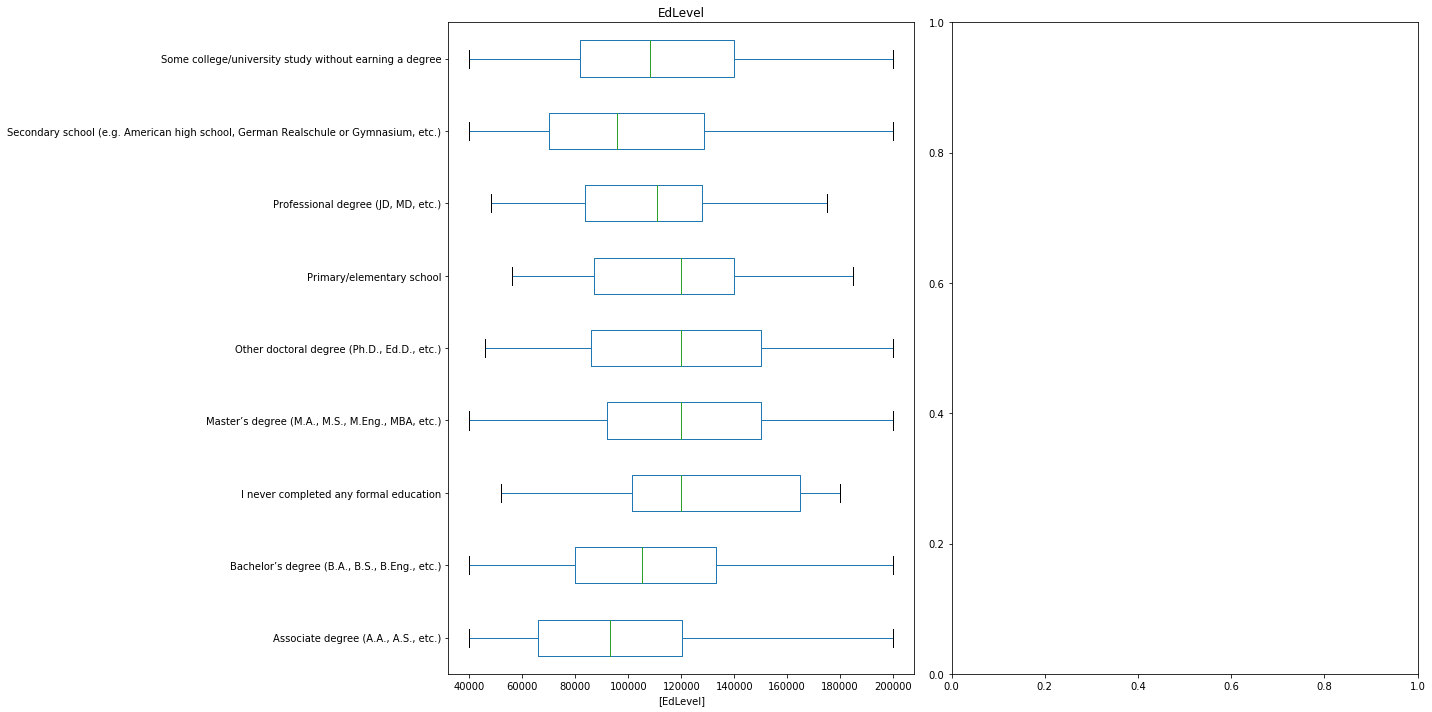

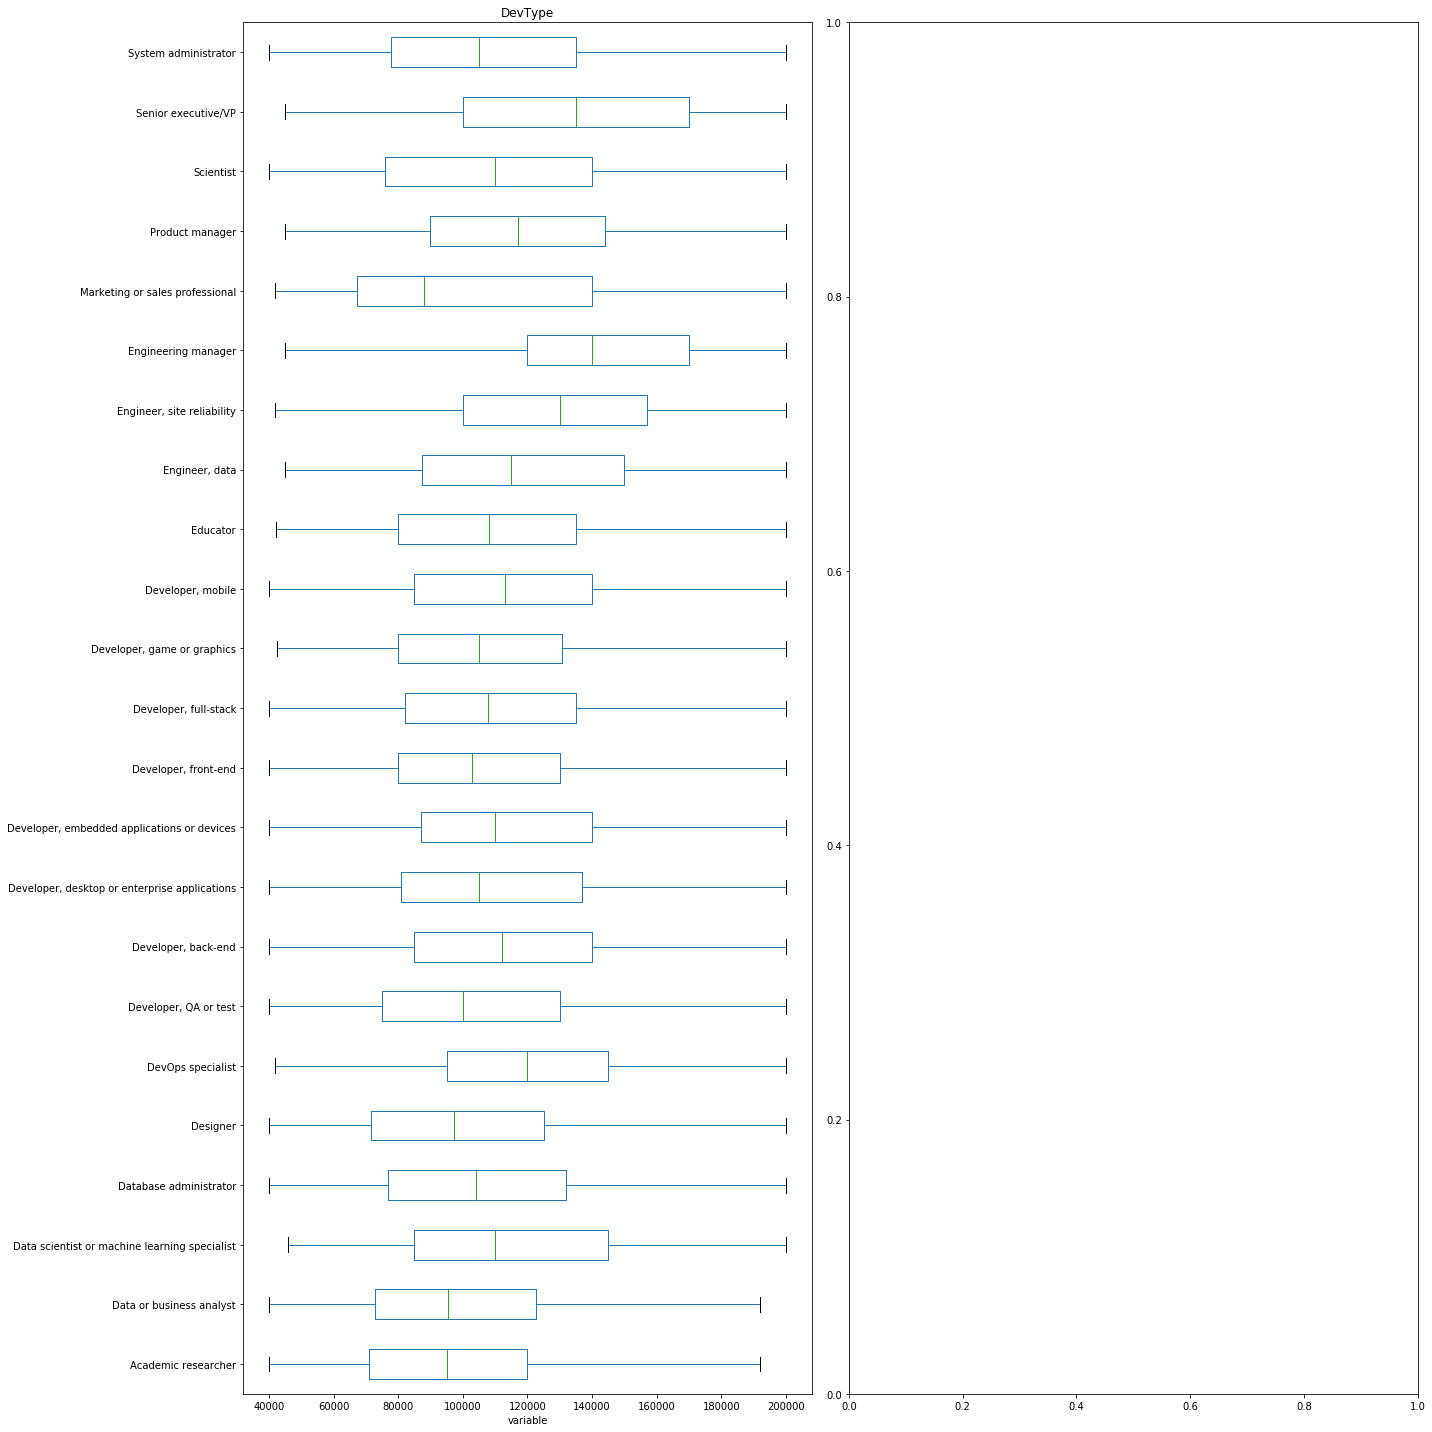

In [46]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro'], 
                     categoricals=['EdLevel'], 
                     multi_options=['DevType'])

In [47]:
run_model(us_df_limited)

(6325, 34) before trim
(6097, 33) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.7233613986188564
RFR Test Score: 0.13251090823990874
LR Train Score: 0.2700910401880179
LR Test Score: 0.20623533980797149
[('YearsCodePro', 0.36762586827644156), ('Developer, full-stack', 0.041244474242883016), ('Developer, back-end', 0.03985119962737279), ('Developer, front-end', 0.03705102938309951), ('Developer, desktop or enterprise applications', 0.036783422965628504), ('DevOps specialist', 0.030565360598566467), ('Developer, mobile', 0.030270390667736756), ('Engineering manager', 0.02833518634348141), ('Designer', 0.026915745447518694), ('Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 0.02428426620982647)]


(6456, 69)
(5773, 30)


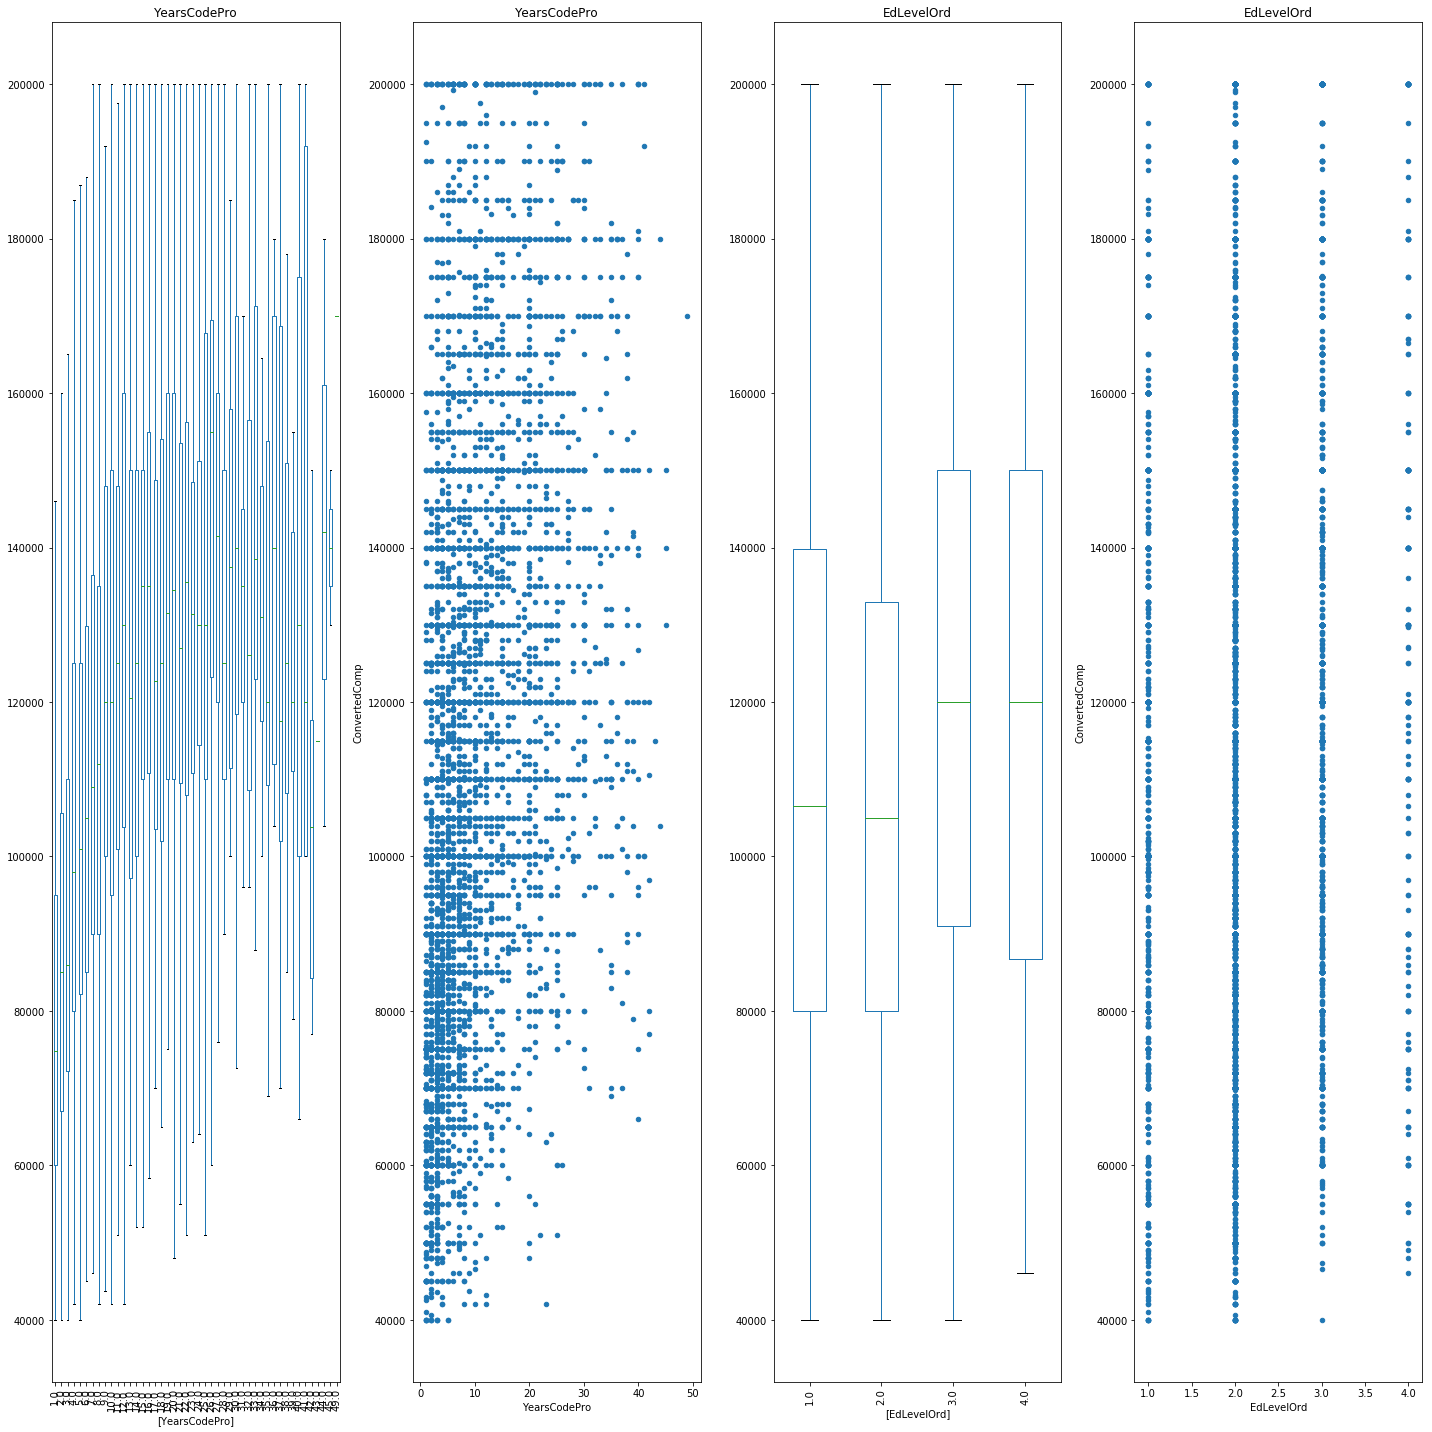

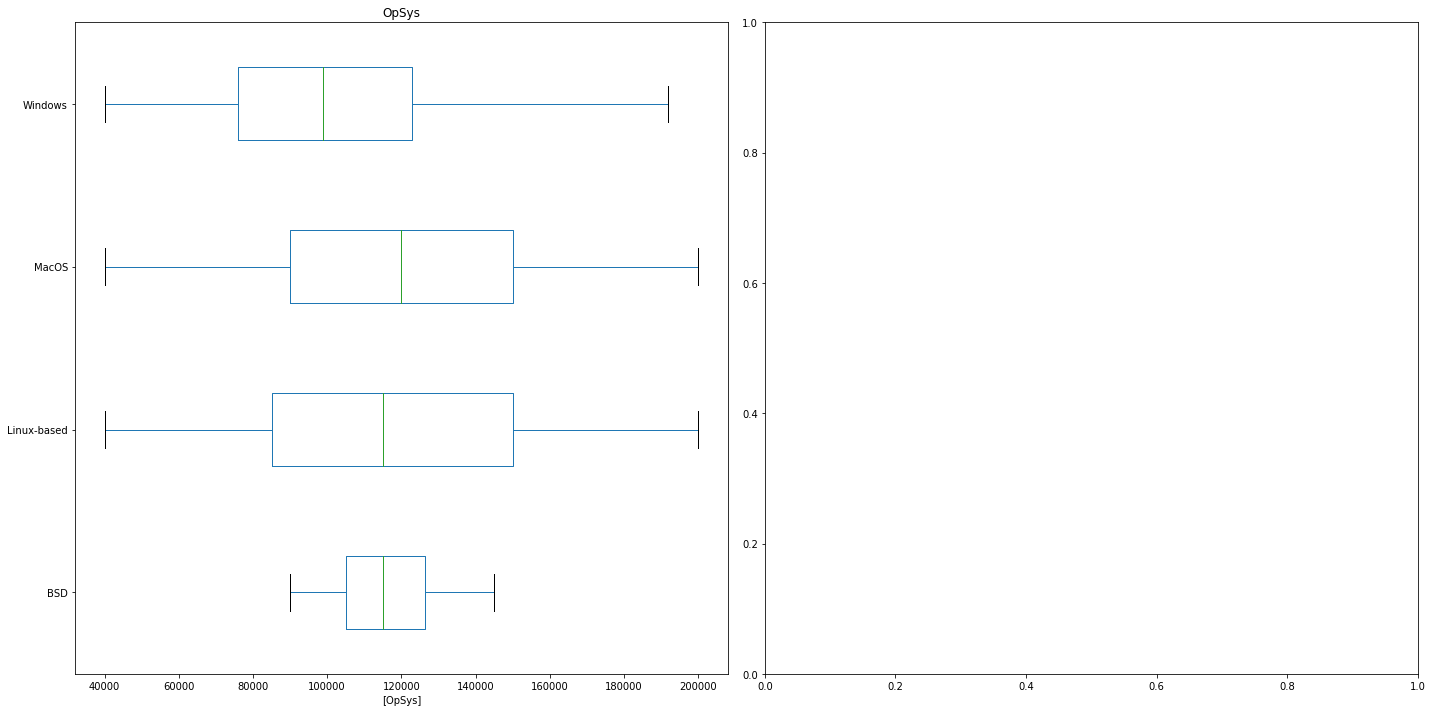

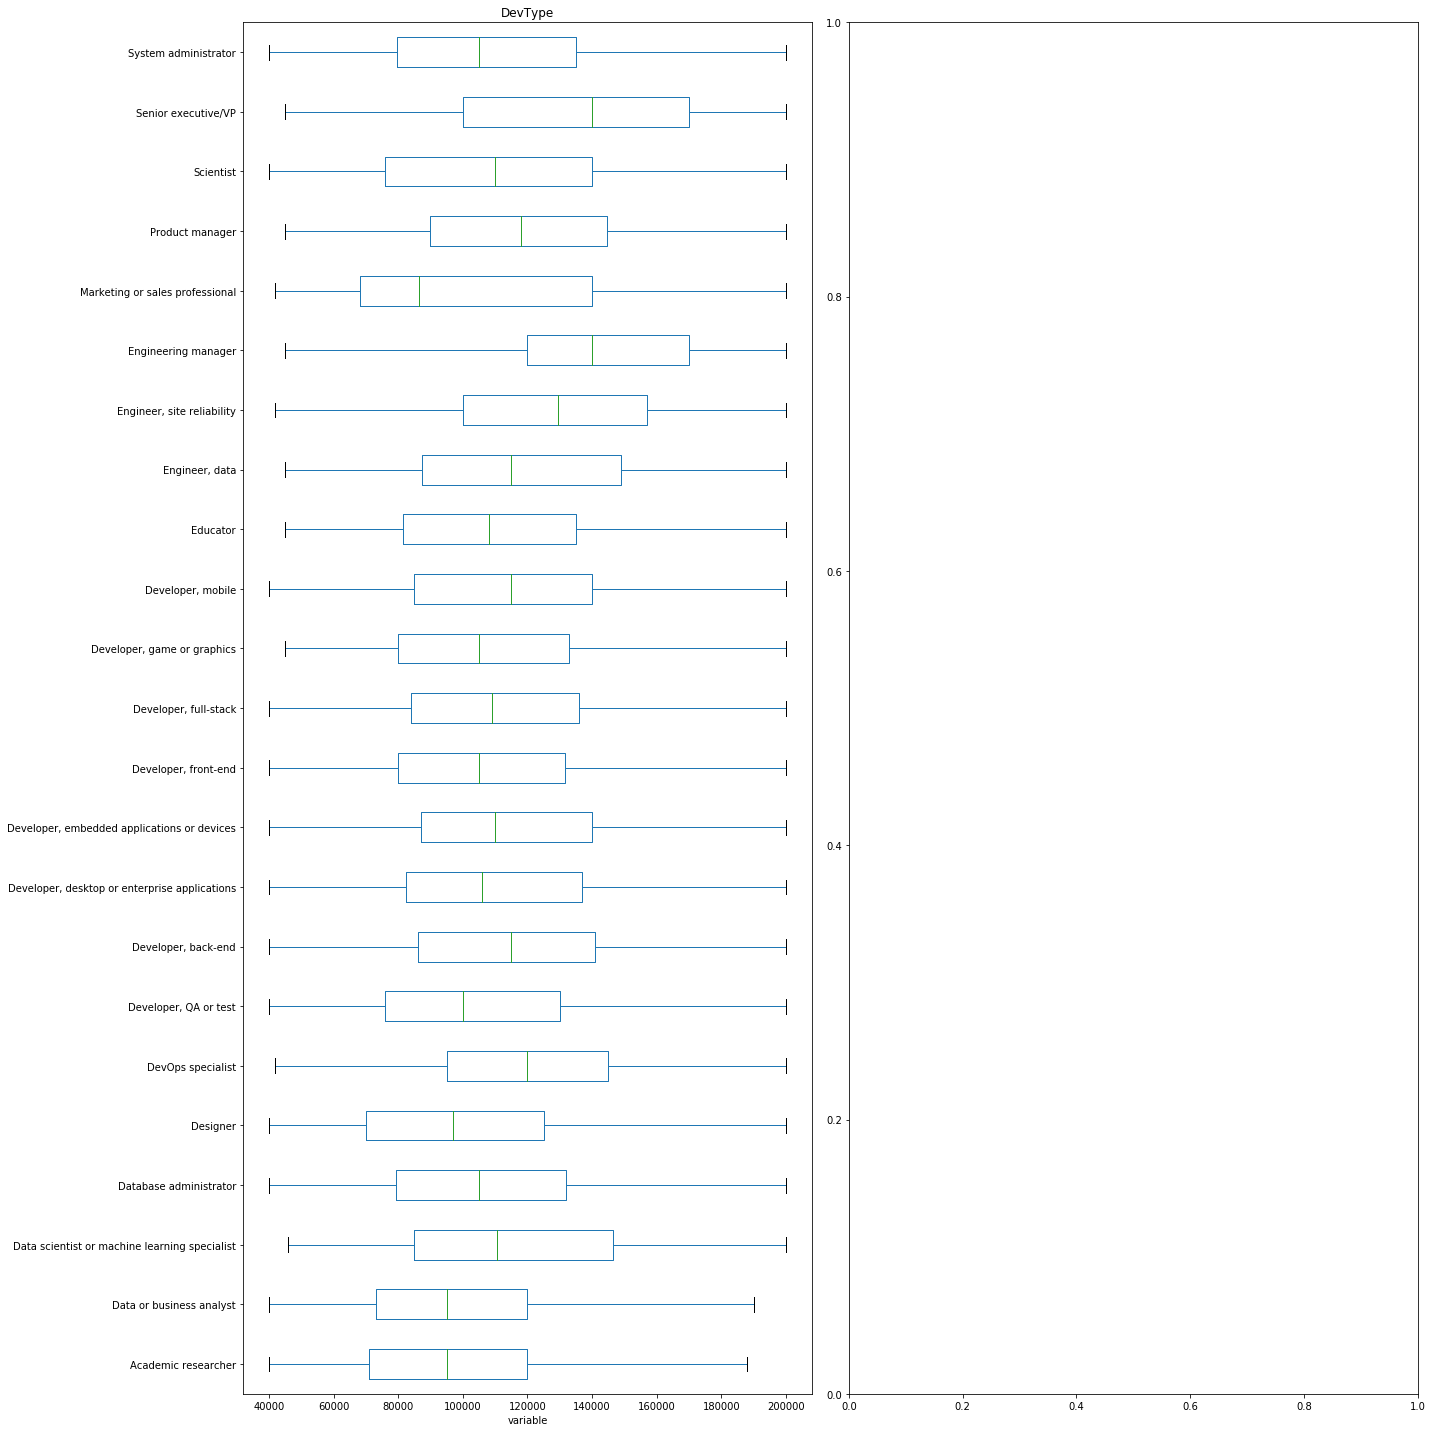

In [48]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['YearsCodePro', 
                                 'EdLevelOrd'], 
                     categoricals=['OpSys'], 
                     multi_options=['DevType'])

In [49]:
run_model(us_df_limited)

(5773, 30) before trim
(5570, 29) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.7846033941595241
RFR Test Score: 0.20363683342343197
LR Train Score: 0.2990315877357599
LR Test Score: 0.30131718399197505
[('YearsCodePro', 0.3422351016623849), ('EdLevelOrd', 0.07192928820259777), ('Windows', 0.07165075947124584), ('Developer, back-end', 0.04112834906467081), ('Developer, full-stack', 0.03953438136685713), ('Developer, front-end', 0.03503282815568588), ('Developer, desktop or enterprise applications', 0.03213266152639206), ('Developer, mobile', 0.02820677671293216), ('DevOps specialist', 0.02787348972210307), ('Designer', 0.02388591790974873)]


(6456, 69)
(3149, 159)


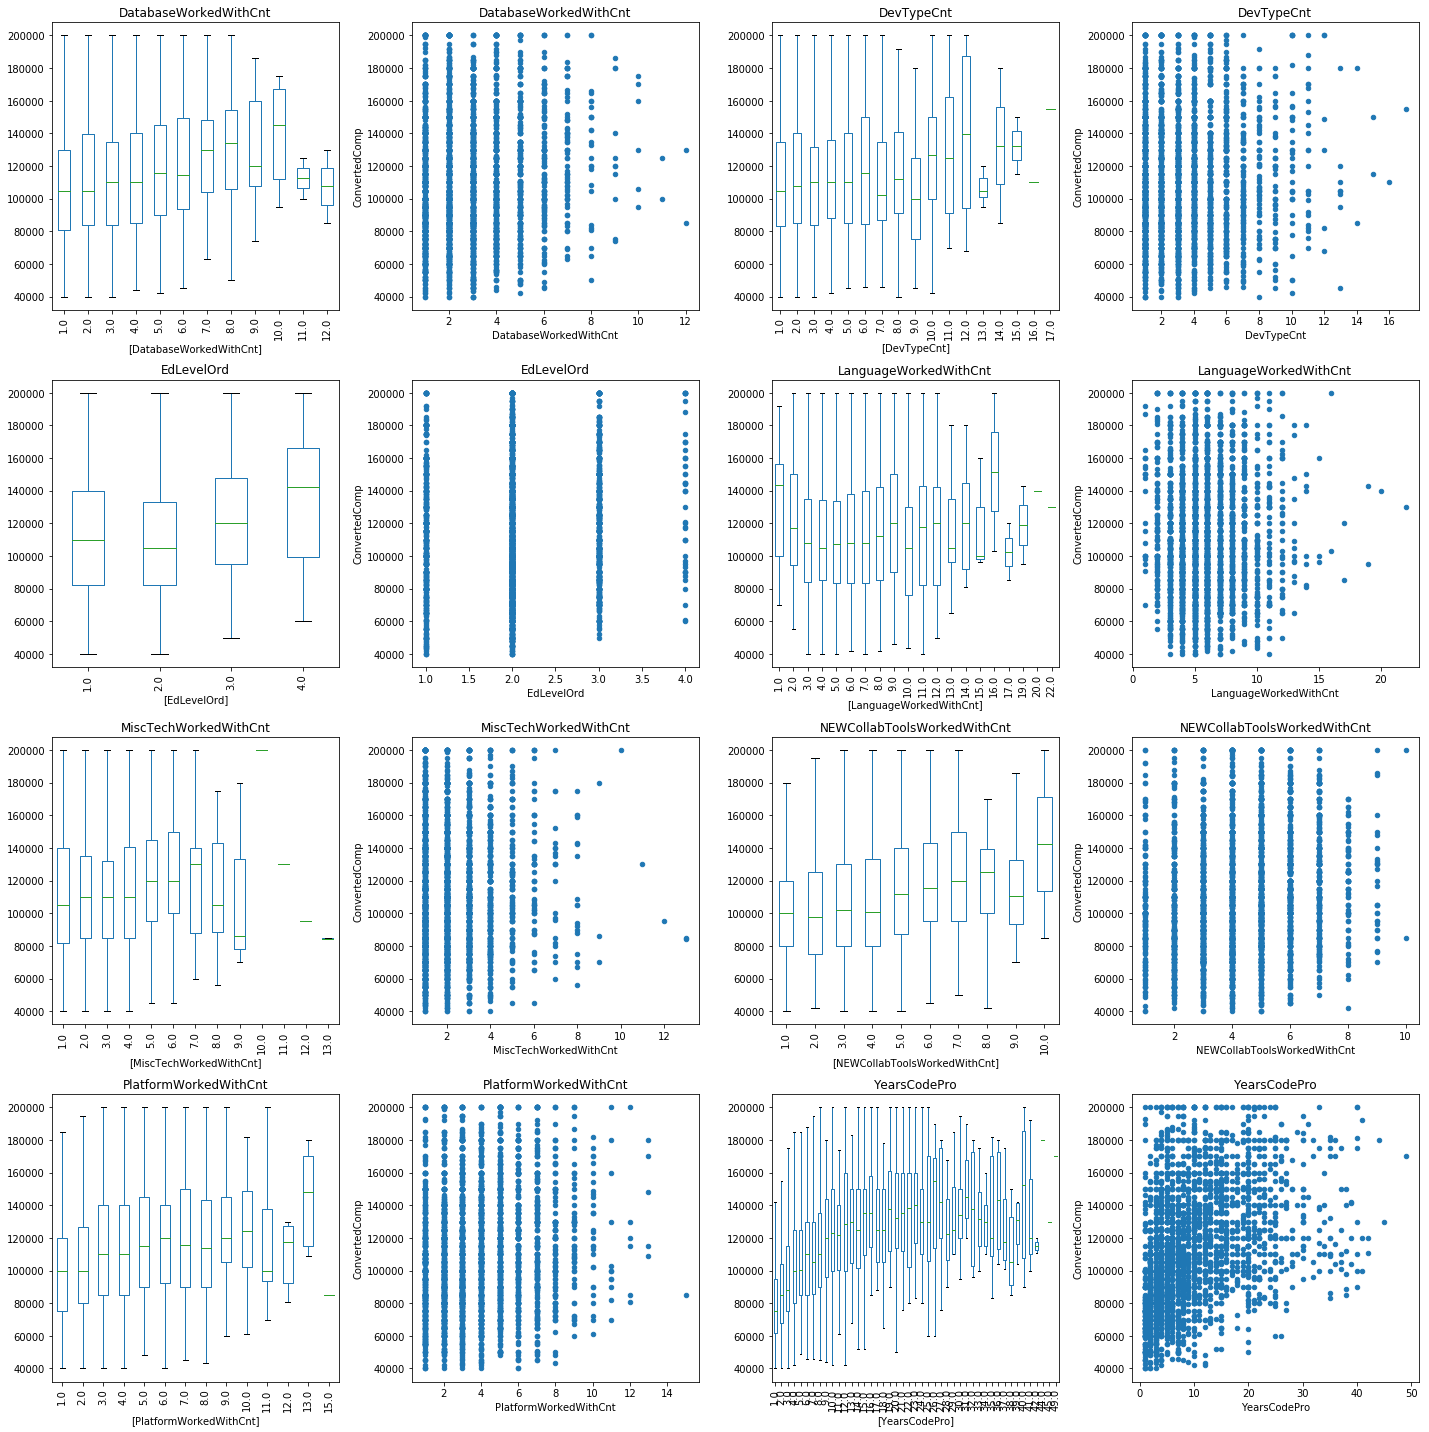

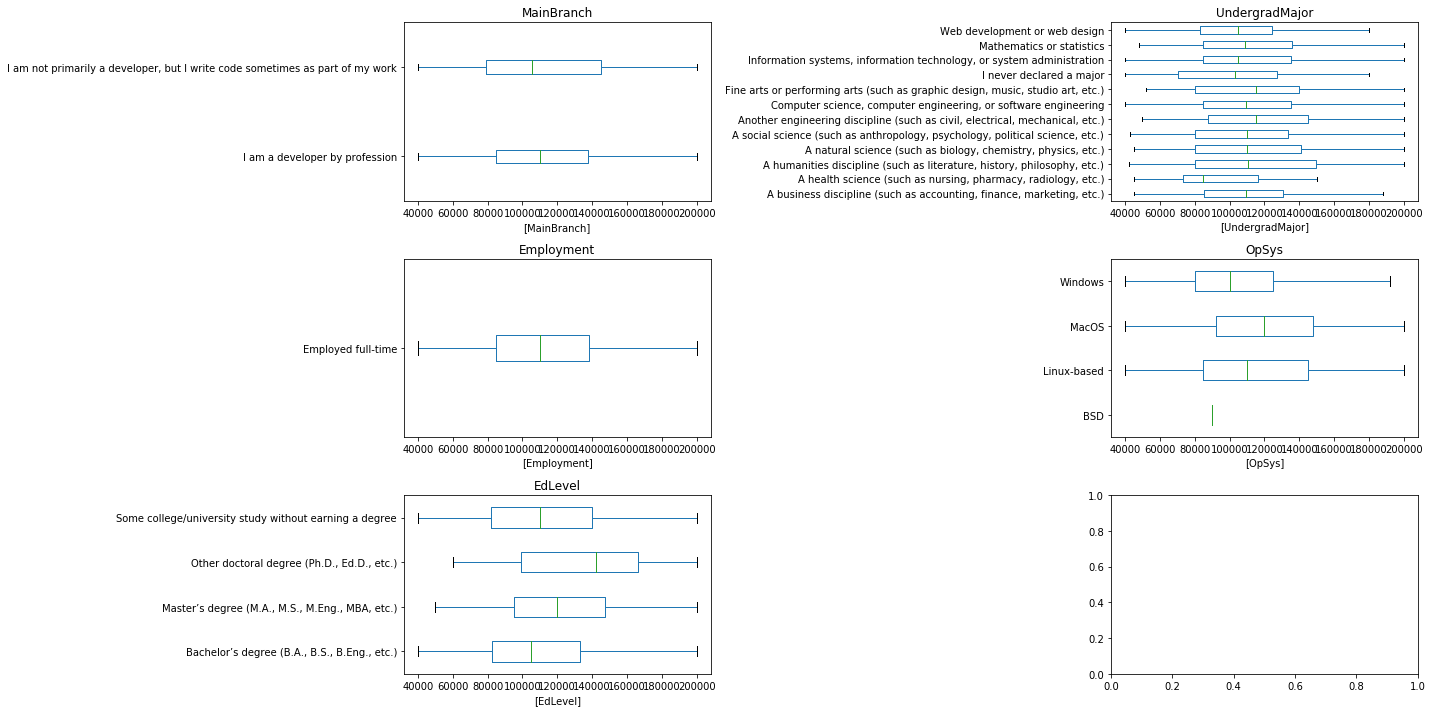

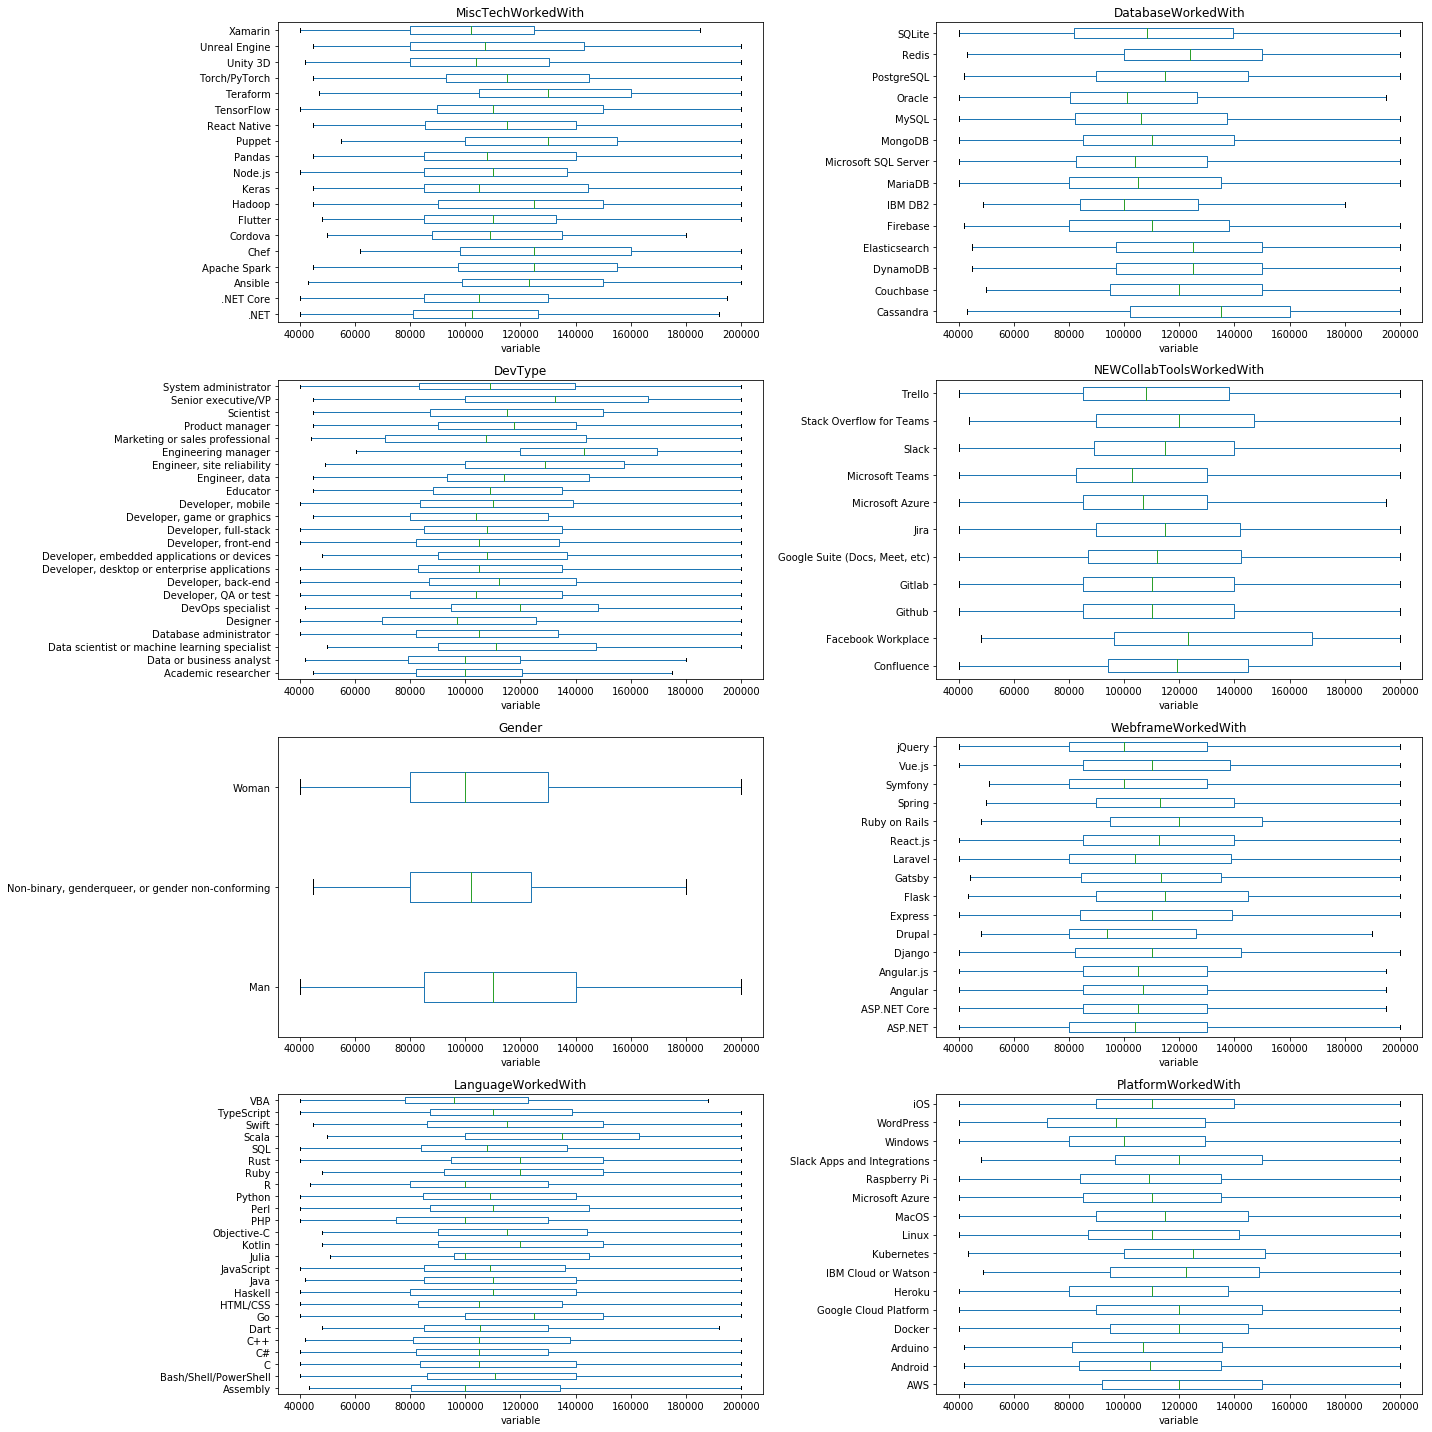

In [51]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df_limited=transform_data(us, 
                     numericals=['DatabaseWorkedWithCnt',
                                 'DevTypeCnt',
                                 'EdLevelOrd',
                                 'LanguageWorkedWithCnt',
                                 'MiscTechWorkedWithCnt',
                                 'NEWCollabToolsWorkedWithCnt',
                                 'PlatformWorkedWithCnt',
                                 'YearsCodePro'], 
                     categoricals=all_categoricals, multi_options=all_multi_options)
clean_us=us_df_limited[(us_df_limited['PlatformWorkedWithCnt']<=10) & 
                  (us_df_limited['YearsCodePro']<=30) & 
                  (us_df_limited['NEWCollabToolsWorkedWithCnt']<10) & 
                  (us_df_limited['MiscTechWorkedWithCnt']<10) & 
                  (us_df_limited['LanguageWorkedWithCnt']<15) & 
                  (us_df_limited['DevTypeCnt']<12) & 
                  (us_df_limited['DatabaseWorkedWithCnt']<11)]

In [52]:
run_model(clean_us)

(2924, 159) before trim
(2924, 158) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.9069053013878243
RFR Test Score: 0.3352810627595828
LR Train Score: 0.43828564221113153
LR Test Score: 0.291518917081271
[('YearsCodePro', 0.23737542084323024), ('Windows', 0.03798492628443659), ('LanguageWorkedWithCnt', 0.02788451836633139), ('NEWCollabToolsWorkedWithCnt', 0.025583721194753665), ('PlatformWorkedWithCnt', 0.021988760802645713), ('DevTypeCnt', 0.018916251255263524), ('PHP', 0.017101663400683753), ('DatabaseWorkedWithCnt', 0.01692147571548659), ('jQuery', 0.015827404220096854), ('MiscTechWorkedWithCnt', 0.014857321957235901)]


(6456, 69)
(3591, 13)


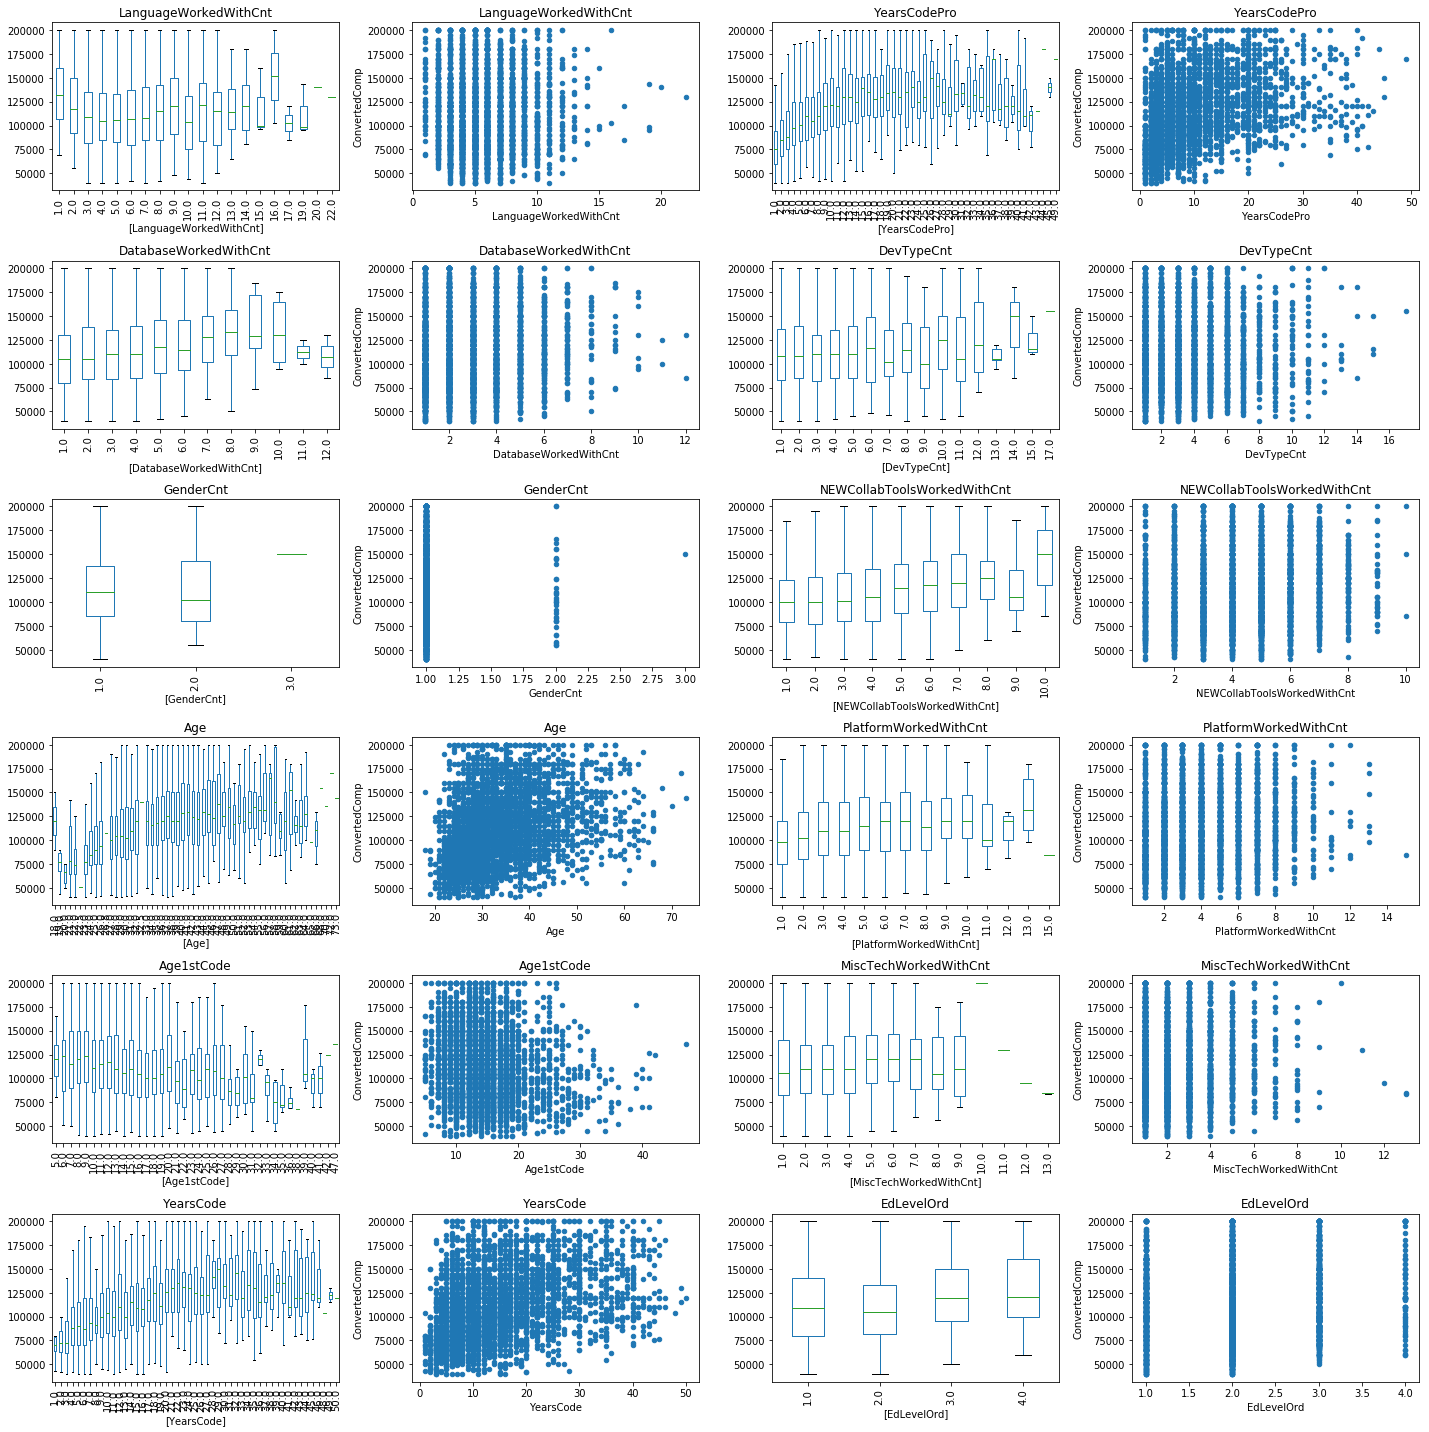

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [53]:
us=df[(df['Country']=='United States') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000) & 
     (df['ConvertedComp']>=40000)]
us_df=transform_data(us, numericals=all_numericals, categoricals=[], multi_options=[])

In [54]:
run_model(us_df)

(3591, 13) before trim
(3442, 12) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.8902930976268822
RFR Test Score: 0.23606109728064217
LR Train Score: 0.1964714647955954
LR Test Score: 0.23805332035369875
[('YearsCodePro', 0.24251445261588883), ('Age', 0.10390234842746868), ('YearsCode', 0.09951344095244367), ('Age1stCode', 0.09553781687581867), ('LanguageWorkedWithCnt', 0.08729695533480337), ('NEWCollabToolsWorkedWithCnt', 0.08088331513490933), ('PlatformWorkedWithCnt', 0.07526266628670052), ('DevTypeCnt', 0.07015779943827091), ('DatabaseWorkedWithCnt', 0.056560247187018915), ('MiscTechWorkedWithCnt', 0.048454421595919984)]


(2448, 69)
(1096, 142)


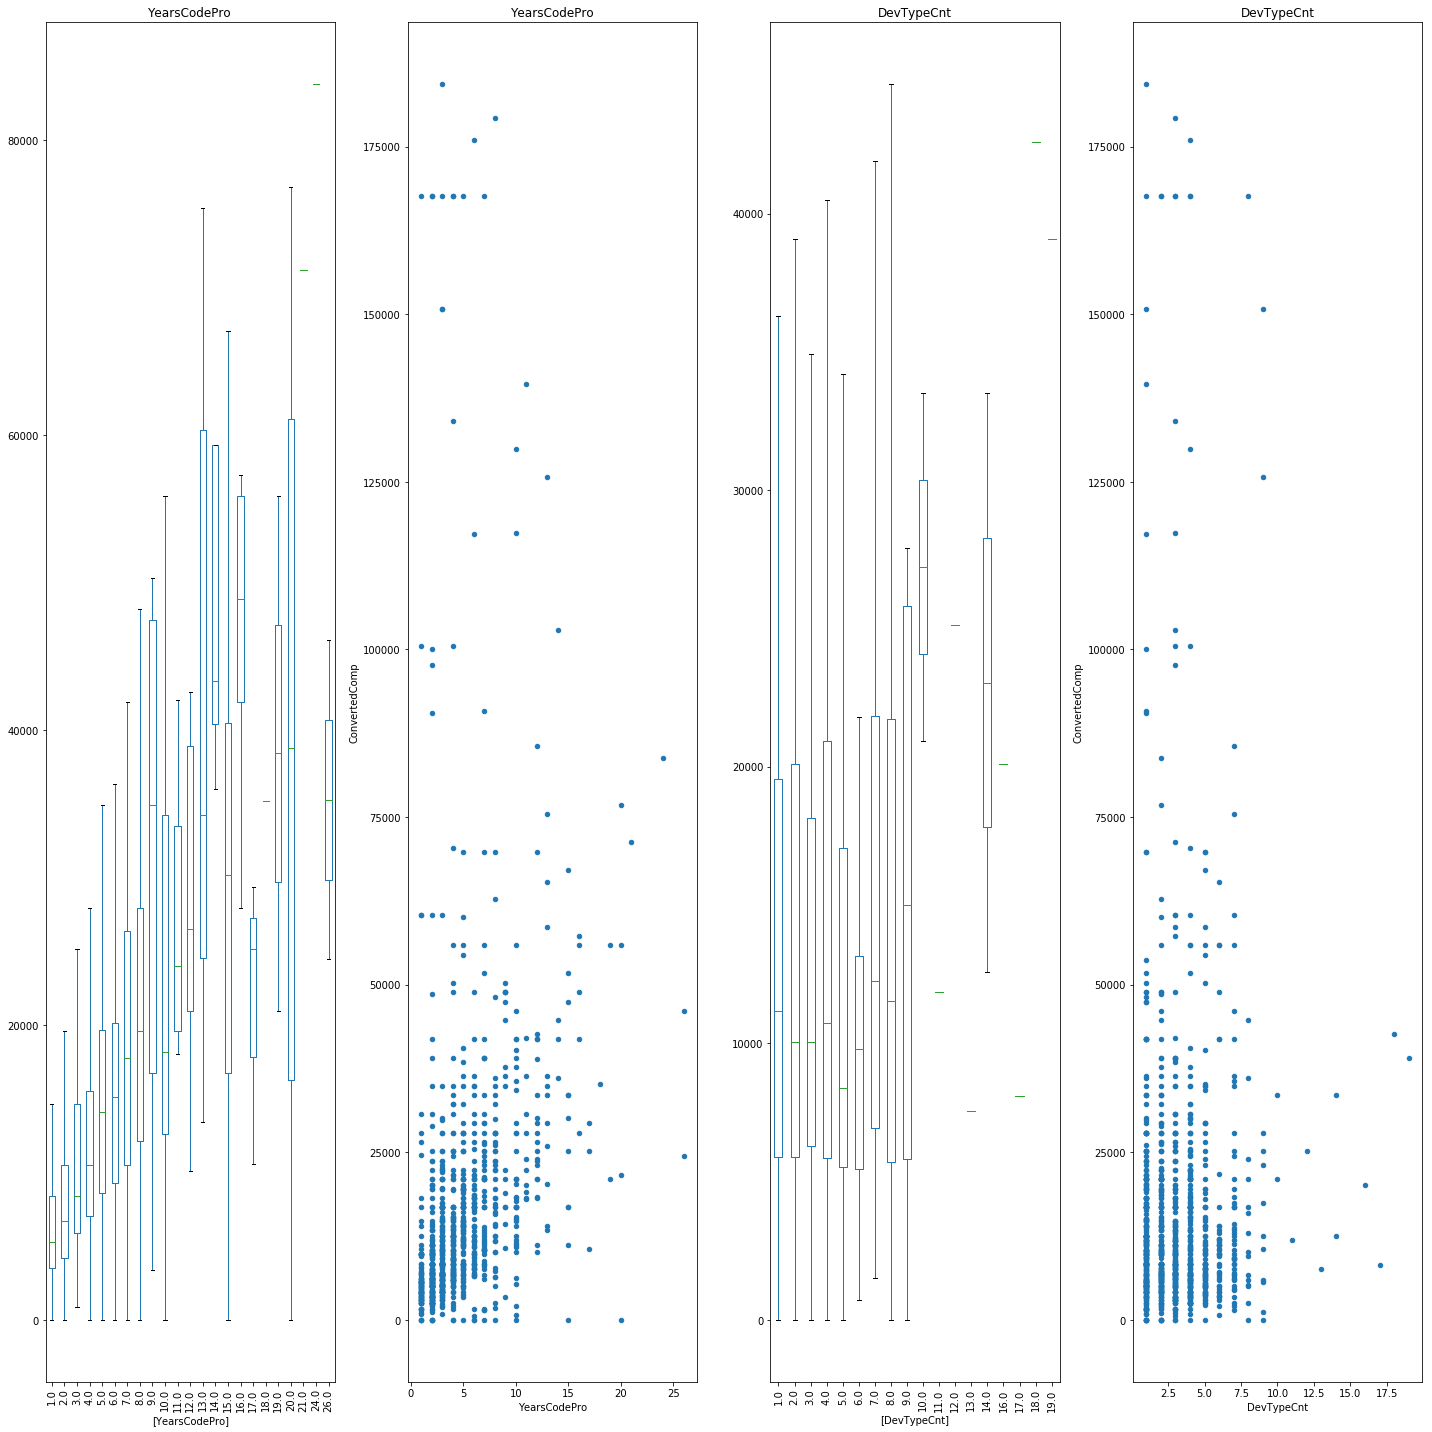

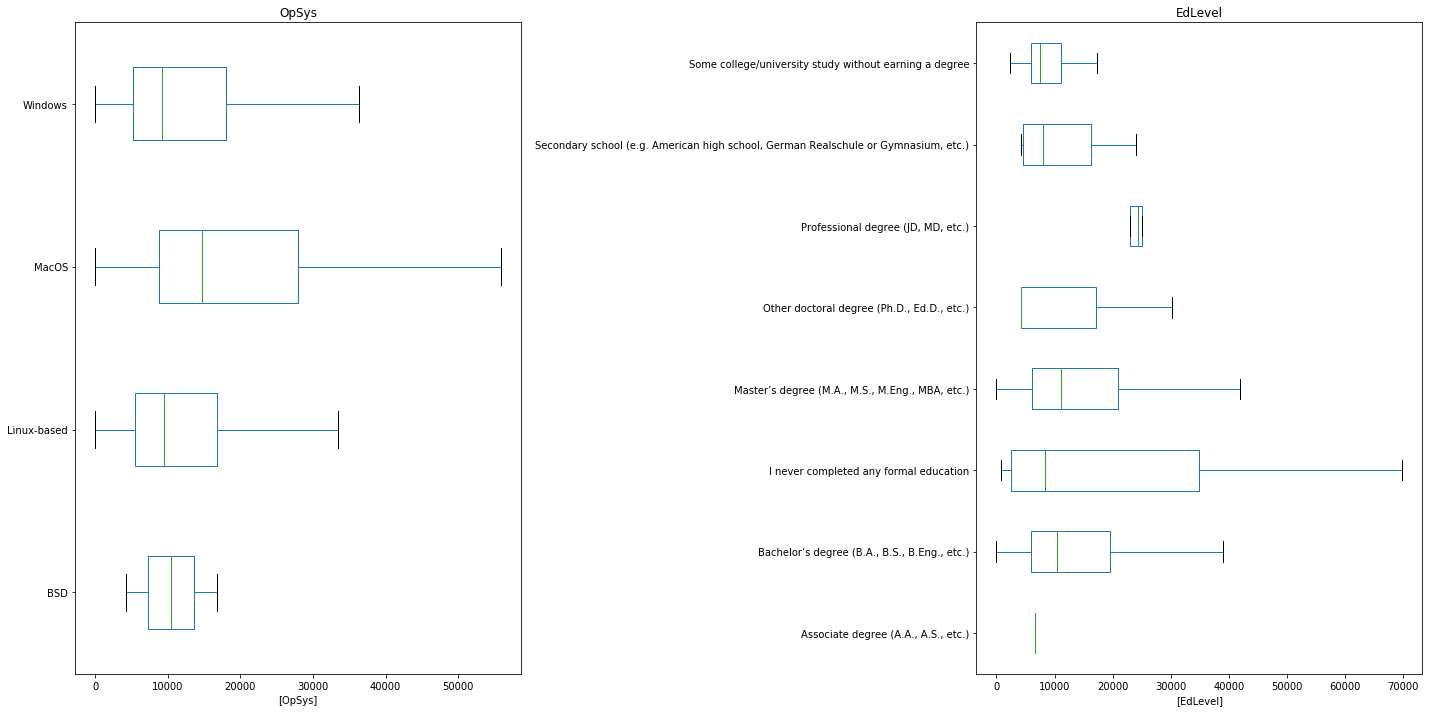

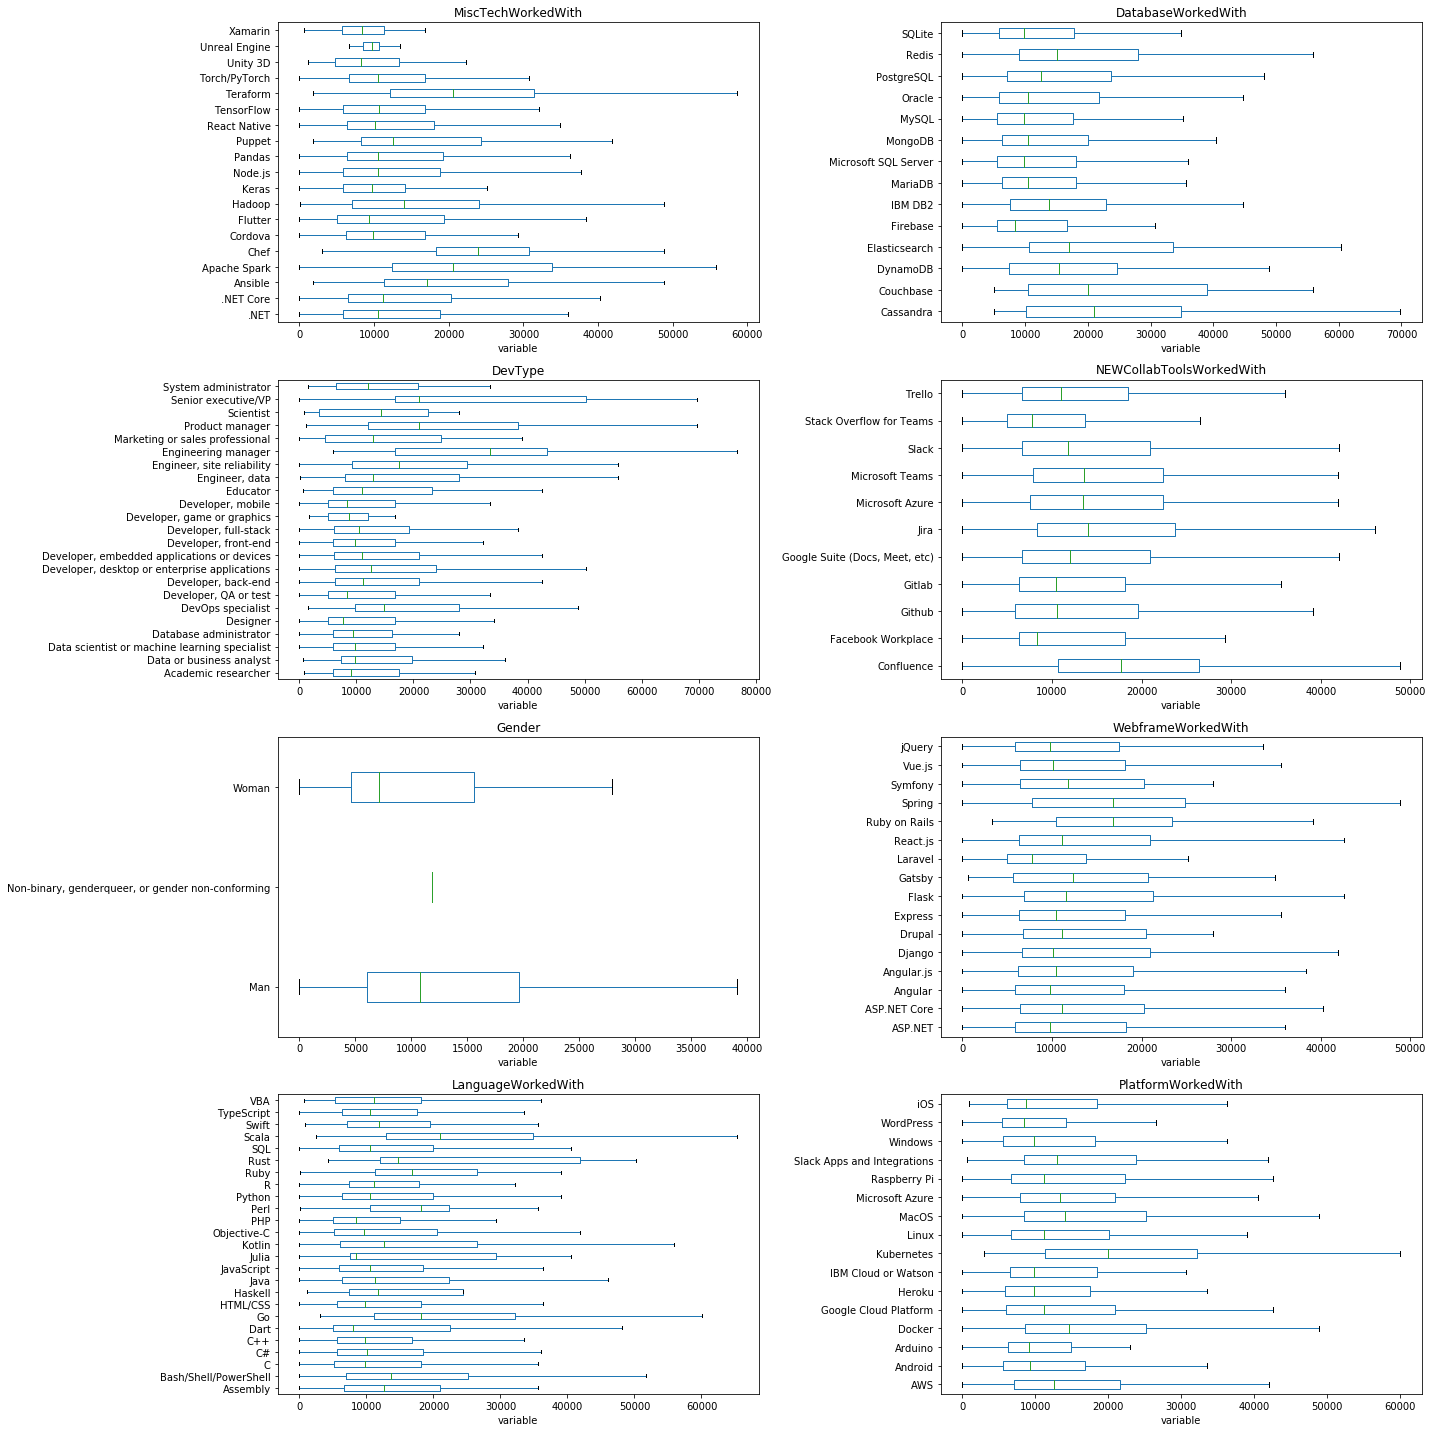

In [55]:
india=df[(df['Country']=='India') & 
     (df['Employment']=='Employed full-time') &
     (df['ConvertedComp']<=200000)]
india_df_limited=transform_data(india, 
                                numericals=['YearsCodePro', 
                                            'DevTypeCnt'], 
                                categoricals=['OpSys', 'EdLevel'], 
                                multi_options=all_multi_options)

In [56]:
run_model(india_df_limited)

(1096, 142) before trim
(1024, 141) after trim


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RFR Train Score: 0.8617979003448797
RFR Test Score: -0.095521000353197
LR Train Score: 0.33212167344565835
LR Test Score: -0.17523043906231917
[('YearsCodePro', 0.1294201282406234), ('Dart', 0.041305666704058774), ('DevTypeCnt', 0.03967263505465688), ('Developer, desktop or enterprise applications', 0.02508297504388329), ('Cassandra', 0.022620544390379506), ('Vue.js', 0.019556959865912507), ('Slack Apps and Integrations', 0.018582920059560665), ('Flutter', 0.01849074353329264), ('Couchbase', 0.016942511061167734), ('JavaScript', 0.01655920587186608)]


# Model Building and Serialization

In [7]:
# Columns: 'YearsCodePro', 'EdLevel', 'OpSys', 'DevType'
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

filter_df=(df['Country']=='United States') & \
          (df['ConvertedComp'] >= 40000) & \
          (df['ConvertedComp'] <= 200000) & \
          (df['Employment']=='Employed full-time')
us_df=df[filter_df].loc[:, ['YearsCodePro', 'EdLevel', 'OpSys', 'DevType', 'ConvertedComp']].dropna()

X=us_df[['ConvertedComp']]
# concat dummies for DevType
X=pd.concat([X, pd.to_numeric(us_df['YearsCodePro'], errors='coerce')], axis=1)
dummies=us_df['DevType'].str.get_dummies(sep=';')
X=pd.concat([X, dummies], axis=1)
dummies=us_df['EdLevel'].str.get_dummies()
X=pd.concat([X, dummies], axis=1)
dummies=us_df['OpSys'].str.get_dummies()
X=pd.concat([X, dummies], axis=1)
X=X.dropna()
input_ary=X.drop(columns=['ConvertedComp'], axis=1)
y=X['ConvertedComp']

X_train, X_test, y_train, y_test=train_test_split(input_ary, y)

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

rfr=RandomForestRegressor()
rfr.fit(X_train_scaled, y_train)
print(rfr.score(X_train_scaled, y_train))
print(rfr.score(X_test_scaled, y_test))

input_ary

0.7907268080129262
0.2062323686466625


YearsCodePro  Academic researcher  Data or business analyst  \
7              13.0                    0                         0   
13              1.0                    0                         0   
16              3.0                    0                         0   
18              3.0                    0                         0   
40             20.0                    0                         0   
...             ...                  ...                       ...   
63499           6.0                    0                         0   
63508          20.0                    0                         0   
63998           5.0                    0                         1   
64013          30.0                    0                         1   
64122           4.0                    0                         0   

       Data scientist or machine learning specialist  Database administrator  \
7                                                  0                       0   
13                                                 0                       0   
16                                                 0                       0   
18                                                 0                       0   
40                                                 0                       0   
...                                              ...                     ...   
63499                                              0                       0   
63508                                              0                       0   
63998                                              1                       1   
64013                                              1                       0   
64122                                              0                       0   

       Designer  DevOps specialist  Developer, QA or test  \
7             0                  0                      0   
13            0                  0                      0   
16            0                  0                      0   
18            0                  0                      0   
40            0                  0                      0   
...         ...                ...                    ...   
63499         0                  0                      0   
63508         0                  0                      0   
63998         1                  0                      0   
64013         0                  0                      0   
64122         0                  0                      0   

       Developer, back-end  Developer, desktop or enterprise applications  \
7                        1                                              1   
13                       0                                              1   
16                       0                                              0   
18                       0                                              0   
40                       1                                              0   
...                    ...                                            ...   
63499                    0                                              1   
63508                    1                                              1   
63998                    1                                              1   
64013                    0                                              0   
64122                    0                                              0   

       ...  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  \
7      ...                                                0   
13     ...                                                0   
16     ...                                                0   
18     ...                                                0   
40     ...                                                1   
...    ...                                              ...   
63499  ...                                                0   
63508  ...                                 

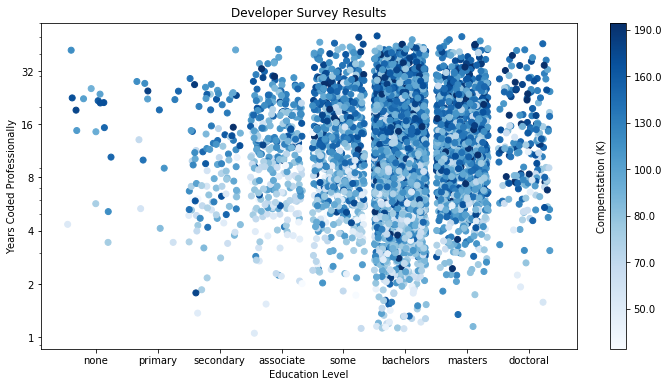

In [305]:
def rand_jitter(arr):
    stdev = .12 * (max(arr) - min(arr))
#     return arr + np.random.randn(len(arr)) * stdev
    return arr + np.random.rand(len(arr)) * stdev
degree_mapping={'I never completed any formal education': 1, 
                'Primary/elementary school': 2, 
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 3, 
                'Some college/university study without earning a degree': 5, #3
                'Associate degree (A.A., A.S., etc.)': 4, #4
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 6, 
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 7, 
                'Other doctoral degree (Ph.D., Ed.D., etc.)': 8}
degree_labels={'I never completed any formal education': 'none', 
                'Primary/elementary school': 'primary', 
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'secondary', 
                'Associate degree (A.A., A.S., etc.)': 'associate', #4
                'Some college/university study without earning a degree': 'some', #3
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'bachelors', 
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'masters', 
                'Other doctoral degree (Ph.D., Ed.D., etc.)': 'doctoral'}
plt.figure(figsize=(12, 6))
plt.xticks(ticks=np.arange(1, 9)+0.5, labels=degree_labels.values())
plt.scatter(y=rand_jitter(pd.to_numeric(us_df['YearsCodePro'], errors='coerce')), x=rand_jitter(us_df['EdLevel'].map(degree_mapping)), c=us_df['ConvertedComp']**.25, cmap='Blues')
cbar=plt.colorbar()
cbar.ax.set_yticklabels(np.round(cbar.get_ticks()**4, -4)/1000)
cbar.ax.get_yaxis().labelpad = -65
cbar.ax.set_ylabel('Compenstation (K)', rotation=90)
plt.title('Developer Survey Results')
plt.yscale('log')
plt.yticks(ticks=(1, 2, 4, 8, 16, 32), labels=(1, 2, 4, 8, 16, 32))
plt.xlabel('Education Level')
plt.ylabel('Years Coded Professionally')
plt.ylim(0, 60)
plt.show()

In [5]:
import pickle
file_name='final_model.sav'
input_format_file='input_columns.sav'
input_scaler_file='input_scaler.sav'
pickle.dump(rfr, open(file_name, 'wb'))
pickle.dump(input_ary.columns, open(input_format_file, 'wb'))
pickle.dump(scaler, open(input_scaler_file, 'wb'))

# All Features

In [7]:
type(rfr)

sklearn.ensemble._forest.RandomForestRegressor

['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']

['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']

['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

In [108]:
# print(numericals)
numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
# numericals=['YearsCodePro']
# print(categoricals)
categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
# categoricals=['EdLevel']
# print(multi_options)
multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
# multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

# Feature Engineering

In [53]:
for each_col in categoricals: 
    if categoricals[each_col]<100: 
        print(f'{each_col} options: {df[each_col].unique()}')
        print('='*20)

MainBranch options: ['I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a student who is learning to code' nan]
Hobbyist options: ['Yes' 'No' nan]
Age1stCode options: ['13' '19' '15' '18' '16' '14' '12' '20' '42' '8' '25' '22' '30' '17' '21'
 '10' '46' '9' '7' '11' '6' nan '31' '29' '5' 'Younger than 5 years' '28'
 '38' '23' '27' '41' '24' '53' '26' '35' '32' '40' '33' '36' '54' '48'
 '56' '45' '44' '34' 'Older than 85' '39' '51' '68' '50' '37' '47' '43'
 '52' '85' '64' '55' '58' '49' '76' '72' '73' '83' '63']
CompFreq options: ['Monthly' nan 'Yearly' 'Weekly']
EdLevel options: ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' nan
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, etc.)'
 'Some college/university st

In [44]:
comp_cols=['CompFreq','CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc','CurrencySymbol']
comp_df=df[comp_cols].dropna()
comp_df[comp_df['CompFreq']=='Weekly']

CompFreq     CompTotal  ConvertedComp         Country  \
85      Weekly  2.000000e+03       108100.0          France   
121     Weekly  1.200000e+05      2000000.0   United States   
132     Weekly  3.250000e+03       210050.0  United Kingdom   
173     Weekly  7.600000e+02        41100.0     Netherlands   
191     Weekly  1.200000e+05      2000000.0   United States   
...        ...           ...            ...             ...   
63762   Weekly  1.600000e+03        80000.0   United States   
63925   Weekly  8.740000e+09      1000000.0     Afghanistan   
63993   Weekly  5.521171e+09      1000000.0     Afghanistan   
64035   Weekly  6.600000e+04      2000000.0   United States   
64129   Weekly  3.000000e+03       150000.0   United States   

               CurrencyDesc CurrencySymbol  
85            European Euro            EUR  
121    United States dollar            USD  
132          Pound sterling            GBP  
173           European Euro            EUR  
191    United States dollar            USD  
...                     ...            ...  
63762  United States dollar            USD  
63925        Afghan afghani            AFN  
63993        Afghan afghani            AFN  
64035  United States dollar            USD  
64129  United States dollar            USD  

[969 rows x 6 columns]

In [35]:
currency_api_url='https://api.exchangeratesapi.io/latest?base=USD'
response=requests.get(currency_api_url)
currency_conv=response.json()['rates']
currency_conv

{'CAD': 1.2857142857,
 'HKD': 7.7506373879,
 'ISK': 125.0925240563,
 'PHP': 48.0549387285,
 'DKK': 6.1213093182,
 'HUF': 294.9008964553,
 'CZK': 21.8093593223,
 'GBP': 0.7425117197,
 'RON': 4.0073196809,
 'SEK': 8.4363845711,
 'IDR': 14164.2980508265,
 'INR': 73.7523645037,
 'BRL': 5.1615264413,
 'RUB': 74.0750884119,
 'HRK': 6.2024015133,
 'JPY': 103.9888148696,
 'THB': 30.1603750308,
 'CHF': 0.8900402994,
 'EUR': 0.8224360556,
 'MYR': 4.0600378321,
 'BGN': 1.6085204375,
 'TRY': 7.7832058557,
 'CNY': 6.5318693972,
 'NOK': 8.7670038654,
 'NZD': 1.4190311703,
 'ZAR': 15.1882556131,
 'USD': 1.0,
 'MXN': 19.828193108,
 'SGD': 1.3328398717,
 'AUD': 1.3477259643,
 'ILS': 3.2667160128,
 'KRW': 1086.109055021,
 'PLN': 3.6819639773}